# **Proyek Analisis Kesejahteraan Pekerja Indonesia**
- **Nama:** Harry Mardika
- **Email:** harrymardika48@gmail.com
- **ID Dicoding:** hkacode

# **1. Perkenalan Dataset**


**A. Pendahuluan**  
Kesejahteraan pekerja merupakan salah satu indikator penting dalam menilai tingkat ekonomi suatu daerah. Dataset ini menyediakan berbagai informasi terkait kesejahteraan pekerja di Indonesia, termasuk rata-rata upah, upah minimum, garis kemiskinan, dan pengeluaran per kapita. Dengan analisis data ini, kita dapat mengidentifikasi pola kesejahteraan pekerja berdasarkan provinsi dan tahun serta memberikan wawasan mengenai kondisi sosial-ekonomi di Indonesia.  

Dataset ini tersedia di Kaggle:  
🔗 **[Dataset Kesejahteraan Pekerja Indonesia](https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia)**  


**B. Deskripsi Dataset**  
Dataset terdiri dari empat file utama yang mencakup berbagai aspek kesejahteraan pekerja:  

1.) rataRataUpah.csv
Dataset ini berisi rata-rata upah pekerja per jam berdasarkan provinsi dan tahun.  
- Kolom:
  - `provinsi` → Nama provinsi di Indonesia.  
  - `tahun` → Tahun data diambil.  
  - `upah` → Rata-rata upah pekerja per jam dalam satuan rupiah (IDR).  

2.) minUpah.csv
Dataset ini mencatat upah minimum provinsi (UMP) berdasarkan provinsi dan tahun.  
- Kolom: 
  - `provinsi` → Nama provinsi di Indonesia.  
  - `tahun` → Tahun data diambil.  
  - `ump` → Upah minimum provinsi dalam satuan rupiah (IDR).  

3.) garisKemiskinan.csv
Dataset ini menyajikan data garis kemiskinan per kapita berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.  
- Kolom:  
  - `provinsi` → Nama provinsi di Indonesia.  
  - `jenis` → Jenis pengeluaran (contoh: makanan, non-makanan).  
  - `daerah` → Kategori daerah tempat tinggal (urban/rural).  
  - `tahun` → Tahun data diambil.  
  - `periode` → Periode survei (semester 1 atau 2).  
  - `gk` → Garis kemiskinan dalam satuan rupiah (IDR).  

4.) pengeluaran.csv
Dataset ini mencatat rata-rata pengeluaran per kapita berdasarkan provinsi, tahun, jenis pengeluaran, dan daerah tempat tinggal.  
- Kolom:
  - `provinsi` → Nama provinsi di Indonesia.  
  - `jenis` → Jenis pengeluaran (contoh: makanan, non-makanan).  
  - `daerah` → Kategori daerah tempat tinggal (urban/rural).  
  - `tahun` → Tahun data diambil.  
  - `peng` → Rata-rata pengeluaran per kapita dalam satuan rupiah (IDR).  

---

**C. Potensi Analisis**  
Dataset ini dapat digunakan untuk berbagai analisis, seperti:  
✅ **Clustering** untuk mengelompokkan provinsi berdasarkan kesejahteraan pekerja.  
✅ **Klasifikasi** untuk memprediksi tingkat kesejahteraan berdasarkan variabel ekonomi.  
✅ **Analisis tren** untuk melihat perubahan kesejahteraan pekerja dari waktu ke waktu.  
✅ **Insight kebijakan** untuk memahami dampak kebijakan ekonomi terhadap pekerja.  

# **2. Import Library**

## **Tahap Import Library dalam Analisis Data & Machine Learning**  

Pada tahap awal proyek analisis data dan machine learning, kita perlu mengimpor berbagai pustaka (library) Python yang akan digunakan. Library ini membantu dalam membaca dataset, eksplorasi data, preprocessing, visualisasi, hingga pembuatan model.  

Berikut adalah kategori dan fungsi dari pustaka yang akan digunakan:  

 **Penjelasan Library yang Digunakan:**
- **Numpy (`numpy`)**: Operasi matematika seperti vektor dan matriks.
- **Pandas (`pandas`)**: Membaca, menyimpan, dan mengolah dataset dalam format tabel.
- **Matplotlib (`matplotlib.pyplot`)**: Membuat grafik seperti histogram, scatter plot, dan bar chart.
- **Seaborn (`seaborn`)**: Visualisasi statistik yang lebih menarik dan mudah digunakan.
- **Scipy (`scipy`)**: Menyediakan fungsi ilmiah dan statistik.
- **StandardScaler, MinMaxScaler, RobustScaler**: Normalisasi fitur numerik agar memiliki skala yang sama.
- **KNNImputer**: Mengisi nilai yang hilang dalam dataset berdasarkan metode K-Nearest Neighbors.
- **KMeans, AgglomerativeClustering, DBSCAN**: Algoritma clustering untuk mengelompokkan data.
- **silhouette_score**: Mengevaluasi kualitas hasil clustering (rentang -1 hingga 1, dengan ≥ 0.70 sebagai indikasi baik).
- **euclidean_distances**: Menghitung jarak Euclidean antar titik data.
- **PCA (Principal Component Analysis)**: Reduksi dimensi data untuk meningkatkan efisiensi model.
- **Yellowbrick (`yellowbrick.cluster`)**: Visualisasi evaluasi model clustering seperti Elbow Method dan Silhouette Score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

# Set style seaborn
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# **3. Memuat Dataset**

Langkah selanjutnya adalah memuat dataset yang akan digunakan. 
Dataset ini akan dibaca menggunakan `pandas` dan disimpan dalam variabel yang sesuai.

**Dataset yang Digunakan:**
- `rata_rata_upah.csv` : Berisi data rata-rata upah.
- `min_upah.csv` : Berisi data upah minimum.
- `garis_kemiskinan.csv` : Berisi data garis kemiskinan.
- `pengeluaran.csv` : Berisi data pengeluaran masyarakat.

In [2]:
rata_rata_upah = pd.read_csv("data/rataRataUpah.csv")
min_upah = pd.read_csv("data/minUpah.csv")
garis_kemiskinan = pd.read_csv("data/garisKemiskinan.csv")
pengeluaran = pd.read_csv("data/pengeluaran.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Melihat ukuran dataset

In [3]:
print("Ukuran dataset:")
print(f"Rata-rata upah: {rata_rata_upah.shape}")
print(f"Upah minimum: {min_upah.shape}")
print(f"Garis kemiskinan: {garis_kemiskinan.shape}")
print(f"Pengeluaran: {pengeluaran.shape}")

Ukuran dataset:
Rata-rata upah: (280, 3)
Upah minimum: (735, 3)
Garis kemiskinan: (5460, 6)
Pengeluaran: (4620, 5)


## Melihat sampel data dari masing-masing dataset

In [4]:
print("\nSampel data rata-rata upah:")
print(rata_rata_upah.head())

print("\nSampel data upah minimum:")
print(min_upah.head())

print("\nSampel data garis kemiskinan:")
print(garis_kemiskinan.head())

print("\nSampel data pengeluaran:")
print(pengeluaran.head())


Sampel data rata-rata upah:
  provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065

Sampel data upah minimum:
  provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0
3     ACEH   2005  620000.0
4     ACEH   2006  820000.0

Sampel data garis kemiskinan:
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0

Sampel data pengeluaran:
  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  

## Melihat struktur data dan statistik deskriptif

In [5]:
print("\nInformasi rata-rata upah:")
print(rata_rata_upah.info())
print(rata_rata_upah.describe())

print("\nInformasi upah minimum:")
print(min_upah.info())
print(min_upah.describe())

print("\nInformasi garis kemiskinan:")
print(garis_kemiskinan.info())
print(garis_kemiskinan.describe())

print("\nInformasi pengeluaran:")
print(pengeluaran.info())
print(pengeluaran.describe())


Informasi rata-rata upah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB
None
            tahun          upah
count   280.00000    280.000000
mean   2018.50000  16621.010714
std       2.29539   4371.803056
min    2015.00000   8525.000000
25%    2016.75000  13468.750000
50%    2018.50000  15845.000000
75%    2020.25000  18634.750000
max    2022.00000  32685.000000

Informasi upah minimum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: floa

## Memeriksa missing values

In [6]:
print("\nMissing values dalam rata-rata upah:")
print(rata_rata_upah.isnull().sum())

print("\nMissing values dalam upah minimum:")
print(min_upah.isnull().sum())

print("\nMissing values dalam garis kemiskinan:")
print(garis_kemiskinan.isnull().sum())

print("\nMissing values dalam pengeluaran:")
print(pengeluaran.isnull().sum())


Missing values dalam rata-rata upah:
provinsi    0
tahun       0
upah        0
dtype: int64

Missing values dalam upah minimum:
provinsi     0
tahun        0
ump         24
dtype: int64

Missing values dalam garis kemiskinan:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing values dalam pengeluaran:
provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64


## Melakukan penggabungan dan pengintegrasian data

### Penggabungan kolom UMP dari dataset minUpah

In [7]:
# 1. Merge kolom UMP dari dataset min_upah ke garis_kemiskinan
# Membuat salinan dari dataset asli
df_merged = garis_kemiskinan.copy()

# Merge kolom UMP dari min_upah ke garis_kemiskinan
df_merged = pd.merge(
    df_merged,
    min_upah[['provinsi', 'tahun', 'ump']],
    on=['provinsi', 'tahun'],
    how='left'
)

### Penggabungan kolom pengeluaran dari dataset pengeluaran

In [8]:
# 2. Merge kolom peng dari dataset pengeluaran ke garis_kemiskinan
# Pastikan format kolom 'jenis' dan 'daerah' sama antara kedua dataset
df_merged = pd.merge(
    df_merged,
    pengeluaran[['provinsi', 'daerah', 'jenis', 'tahun', 'peng']],
    on=['provinsi', 'daerah', 'jenis', 'tahun'],
    how='left'
)

### Penggabungan kolom upah dari dataset rataRataUpah

In [9]:
# 3. Merge kolom upah dari dataset rata_rata_upah ke garis_kemiskinan
df_merged = pd.merge(
    df_merged,
    rata_rata_upah[['provinsi', 'tahun', 'upah']],
    on=['provinsi', 'tahun'],
    how='left'
)

### Pengecekan dataset yang sudah digabungkan

In [10]:
# Melihat hasil merge
print("Ukuran dataset garis kemiskinan setelah merge:", df_merged.shape)

Ukuran dataset garis kemiskinan setelah merge: (5460, 9)


In [11]:
print("\nSampel data setelah merge:")
df_merged.head()


Sampel data setelah merge:


provinsi    jenis     daerah  tahun    periode        gk        ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0  1900000.0   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0  1900000.0   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0  2118500.0   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0  2118500.0   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0  1900000.0   

       peng     upah  
0  466355.0  11226.0  
1  466355.0  11226.0  
2  548853.0  13627.0  
3  548853.0  13627.0  
4  395136.0  11226.0

In [12]:
# Cek missing values setelah merge
print("\nMissing values setelah merge:")
print(df_merged.isnull().sum())


Missing values setelah merge:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
ump          12
peng         64
upah        420
dtype: int64


In [13]:
df_merged.describe()

tahun             gk           ump          peng          upah
count  5460.000000    5261.000000  5.448000e+03  5.396000e+03   5040.000000
mean   2018.115385  303904.185516  2.243474e+06  7.612777e+05  16621.010714
std       2.577159  158176.024903  6.326841e+05  3.480306e+05   4364.422282
min    2013.000000   48561.000000  8.300000e+05  1.760280e+05   8525.000000
25%    2016.000000  144674.000000  1.800725e+06  5.072180e+05  13468.750000
50%    2018.000000  313294.000000  2.218610e+06  6.663885e+05  15845.000000
75%    2020.000000  410188.000000  2.667000e+06  9.409600e+05  18634.750000
max    2022.000000  872843.000000  4.641854e+06  2.525347e+06  32685.000000

## Analisis perubahan nilai dari waktu ke waktu (trend analysis)

In [14]:
# Analisis trend upah minimum per provinsi dari tahun ke tahun
def plot_trend_by_province(data, y_column, title, top_n=5):
    """Plot trend untuk top N provinsi berdasarkan nilai rata-rata."""
    # Menghitung rata-rata nilai untuk setiap provinsi
    province_avg = data.groupby('provinsi')[y_column].mean().sort_values(ascending=False)
    top_provinces = province_avg.head(top_n).index.tolist()
    
    # Filter data hanya untuk top provinsi
    filtered_data = data[data['provinsi'].isin(top_provinces)]
    
    # Plot trend
    plt.figure(figsize=(16, 10))
    sns.lineplot(x='tahun', y=y_column, hue='provinsi', data=filtered_data, marker='o', linewidth=2.5)
    plt.title(f'{title} - Top {top_n} Provinsi', fontsize=16)
    plt.ylabel(y_column, fontsize=14)
    plt.xlabel('Tahun', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Provinsi', fontsize=12)
    plt.xticks(filtered_data['tahun'].unique())
    plt.tight_layout()
    plt.show()

### Plot trend UMP

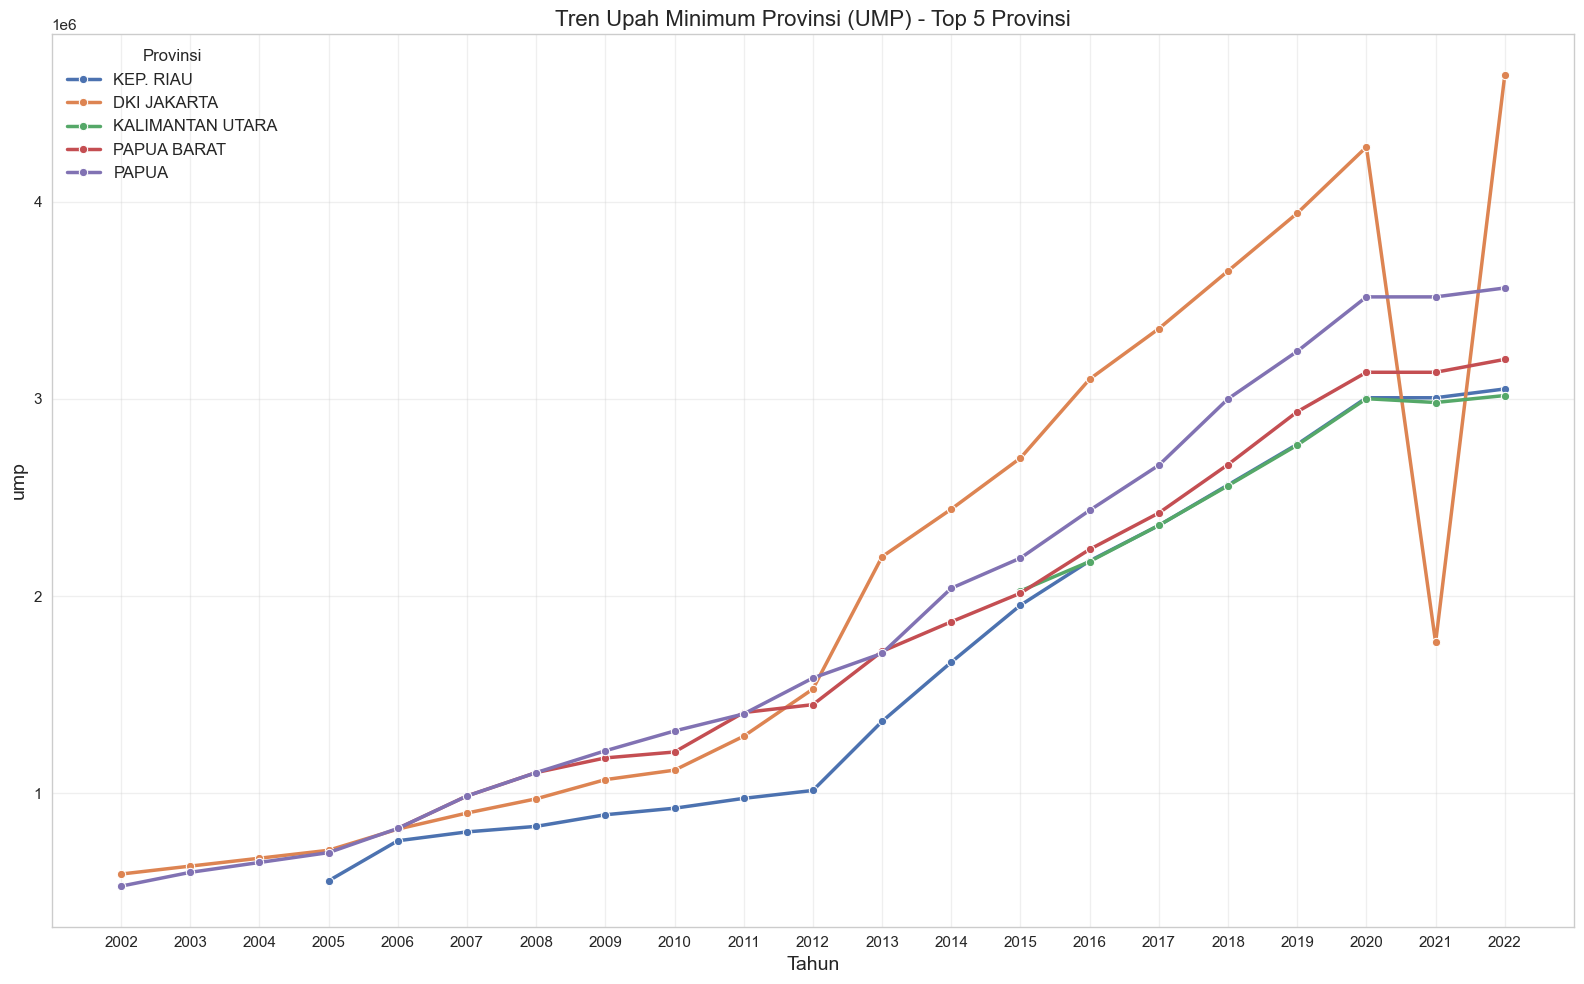

In [15]:
plot_trend_by_province(min_upah, 'ump', 'Tren Upah Minimum Provinsi (UMP)')

### Plot trend garis kemiskinan

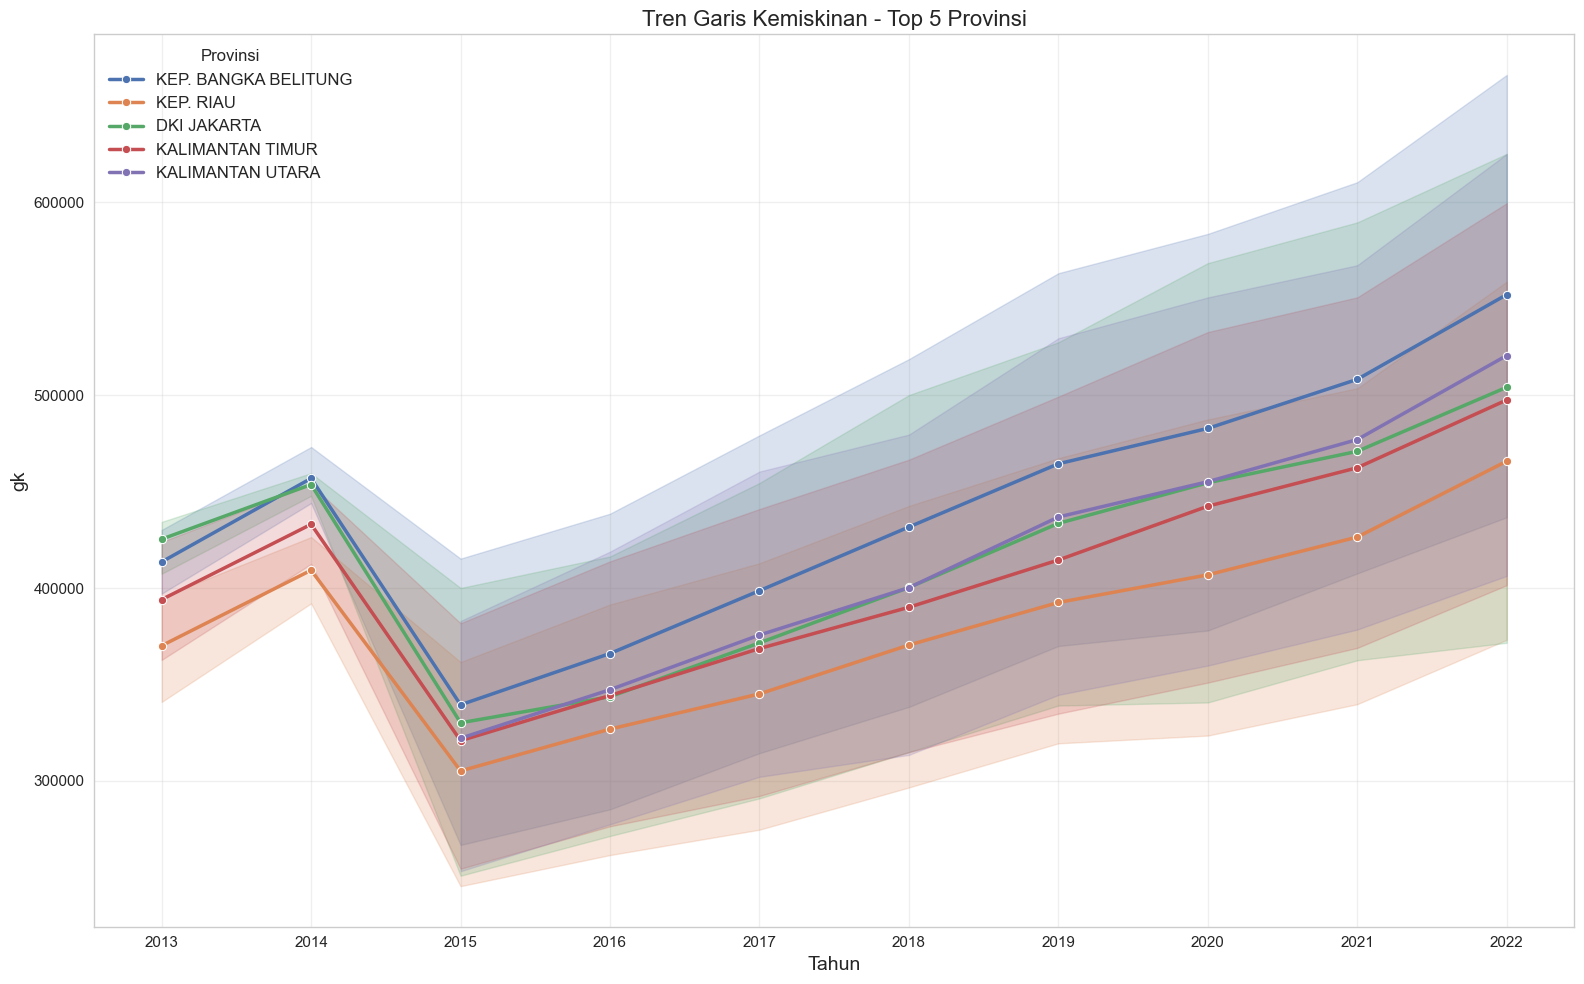

In [16]:
plot_trend_by_province(garis_kemiskinan, 'gk', 'Tren Garis Kemiskinan')

### Plot trend upah rata-rata

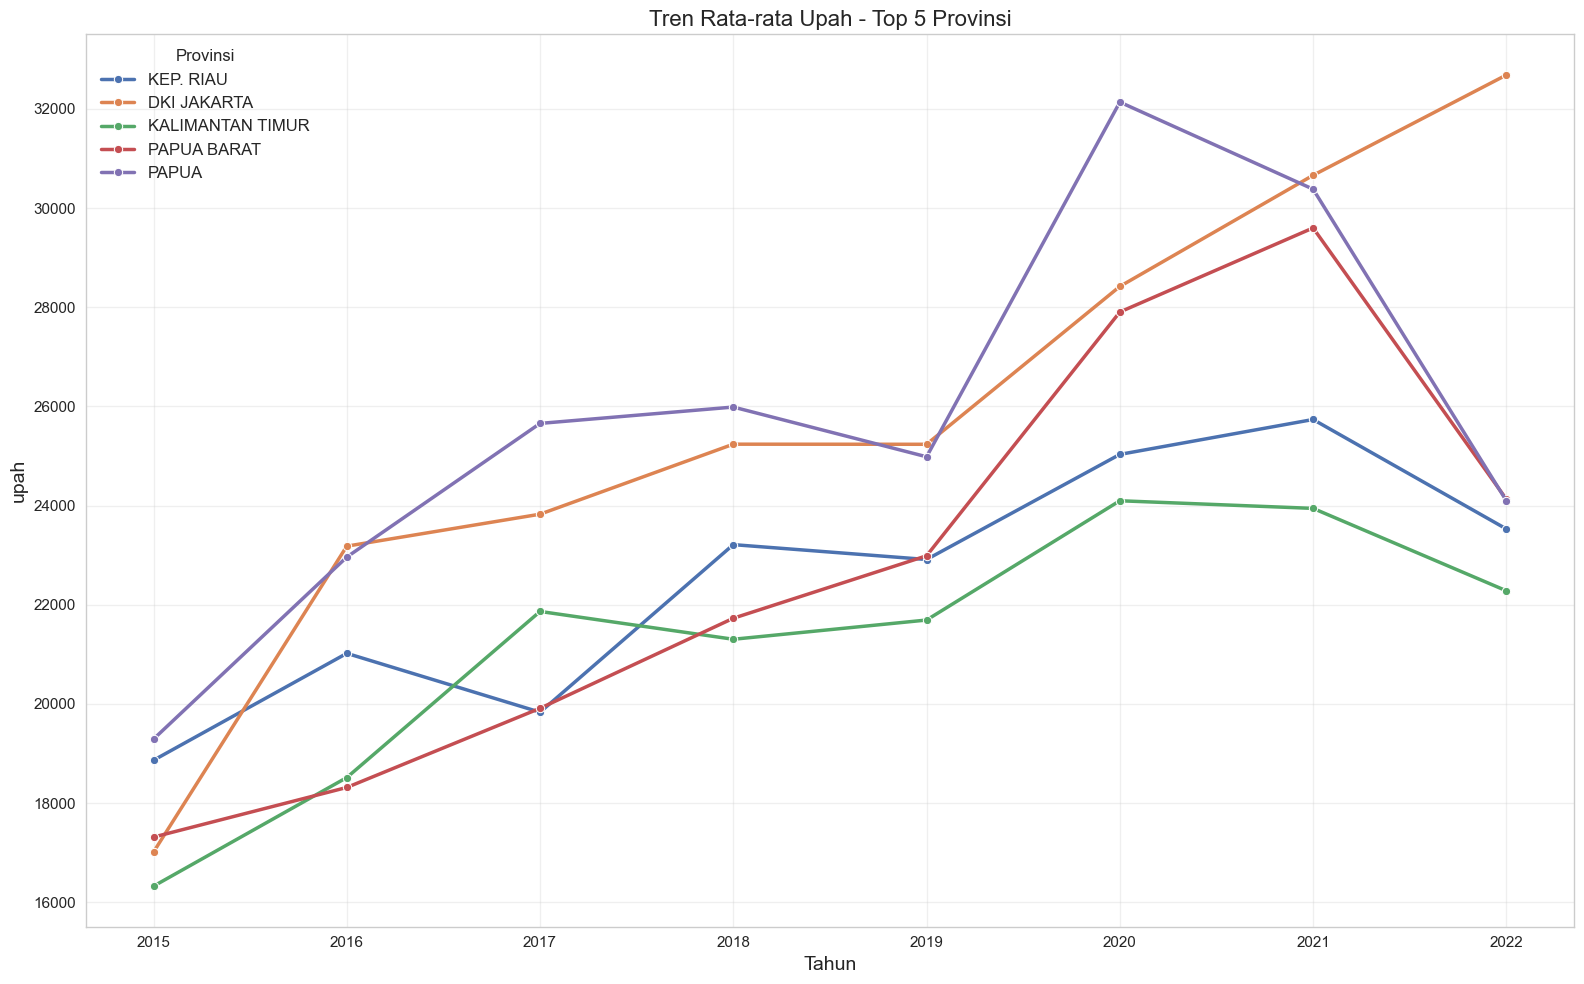

In [17]:
plot_trend_by_province(rata_rata_upah, 'upah', 'Tren Rata-rata Upah')

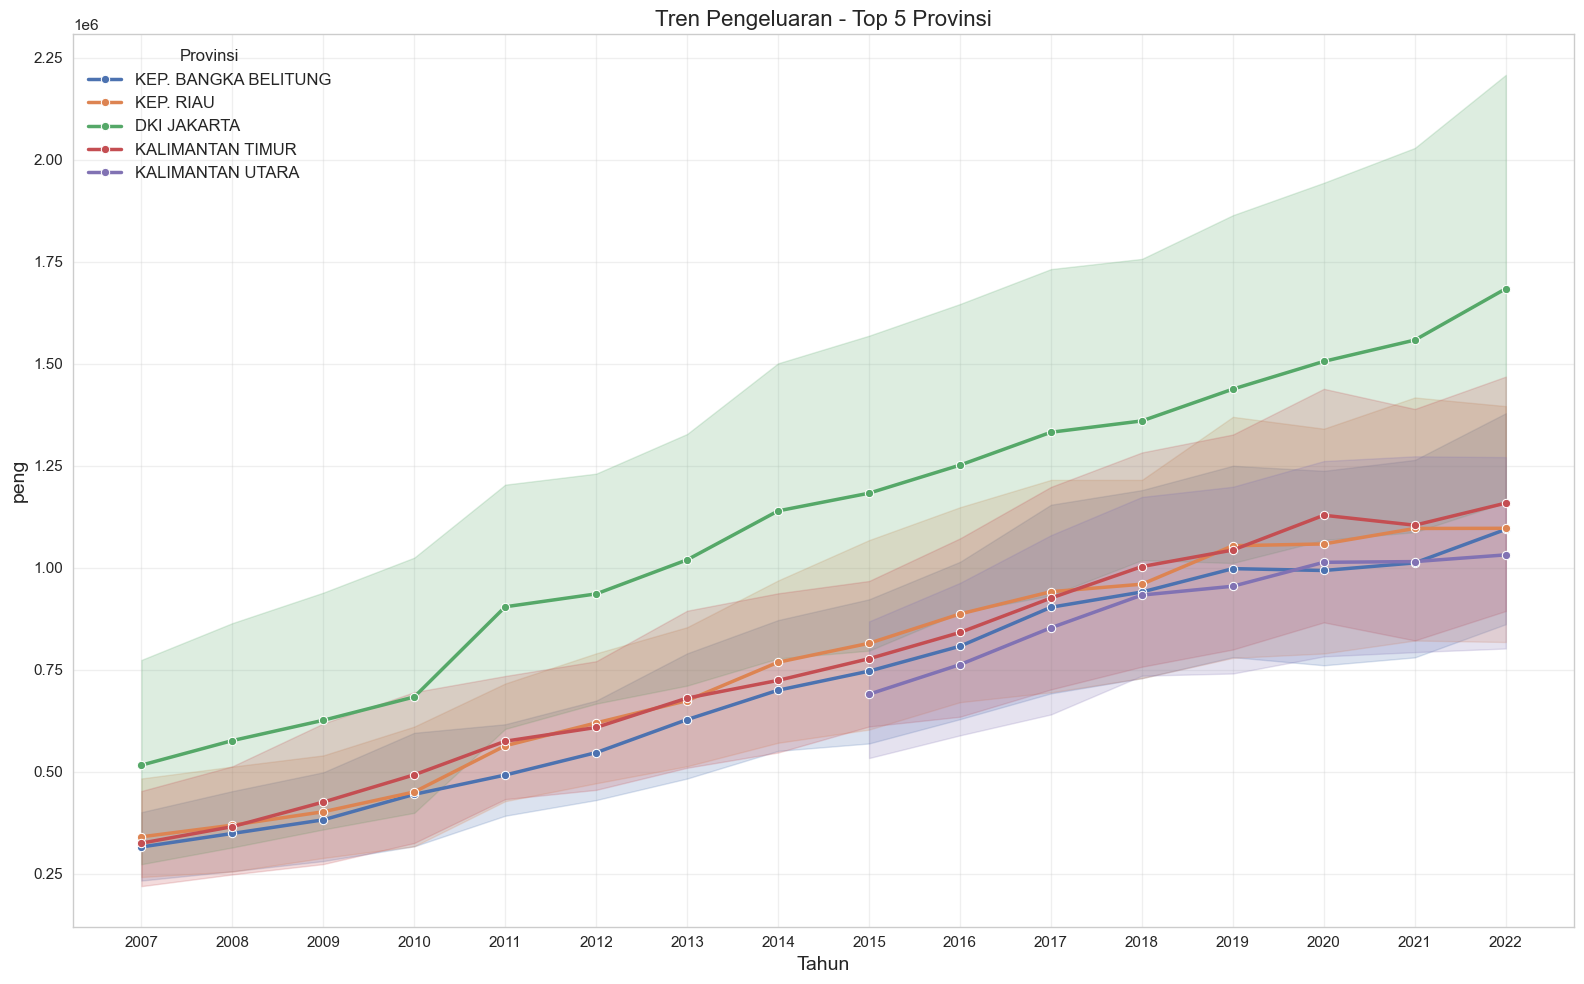

In [18]:
# Plot trend pengeluaran
plot_trend_by_province(pengeluaran, 'peng', 'Tren Pengeluaran')

## Analisis Komparatif antar provinsi

In [19]:
def plot_province_comparison(data, y_column, title, year=None, sort_by='value'):
    """Plot perbandingan nilai antar provinsi untuk tahun tertentu atau rata-rata."""
    if year:
        # Filter untuk tahun tertentu
        filtered_data = data[data['tahun'] == year]
        subtitle = f'Tahun {year}'
    else:
        # Gunakan rata-rata dari semua tahun
        filtered_data = data.groupby('provinsi')[y_column].mean().reset_index()
        subtitle = 'Rata-rata Semua Tahun'
    
    # Urutkan provinsi berdasarkan nilai
    if sort_by == 'value' and 'provinsi' in filtered_data.columns:
        filtered_data = filtered_data.sort_values(by=y_column)
    
    plt.figure(figsize=(16, 10))
    if 'provinsi' in filtered_data.columns:
        # Untuk dataframe
        sns.barplot(x='provinsi', y=y_column, data=filtered_data)
        plt.xticks(rotation=90)
    else:
        # Untuk series
        filtered_data.plot(kind='bar')
    
    plt.title(f'{title} - {subtitle}', fontsize=16)
    plt.ylabel(y_column, fontsize=14)
    plt.xlabel('Provinsi', fontsize=14)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


### Plot perbandingan UMP antar provinsi untuk tahun terbaru

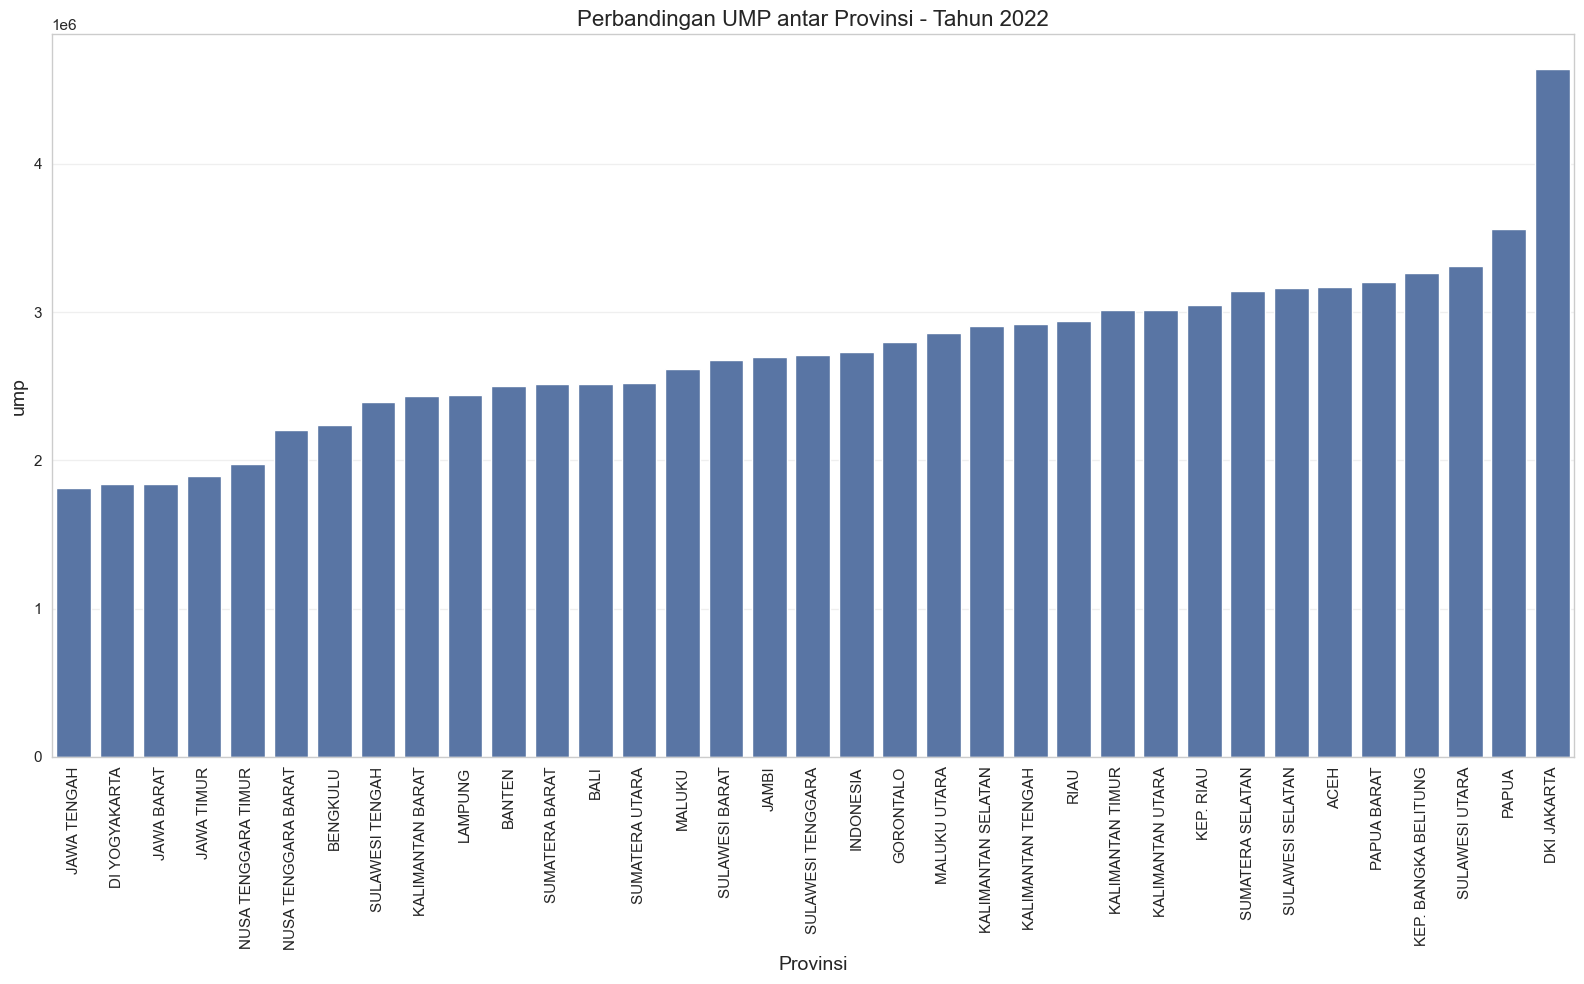

In [20]:
latest_year = min_upah['tahun'].max()
plot_province_comparison(min_upah, 'ump', 'Perbandingan UMP antar Provinsi', year=latest_year)

### Plot perbandingan rata-rata upah antar provinsi

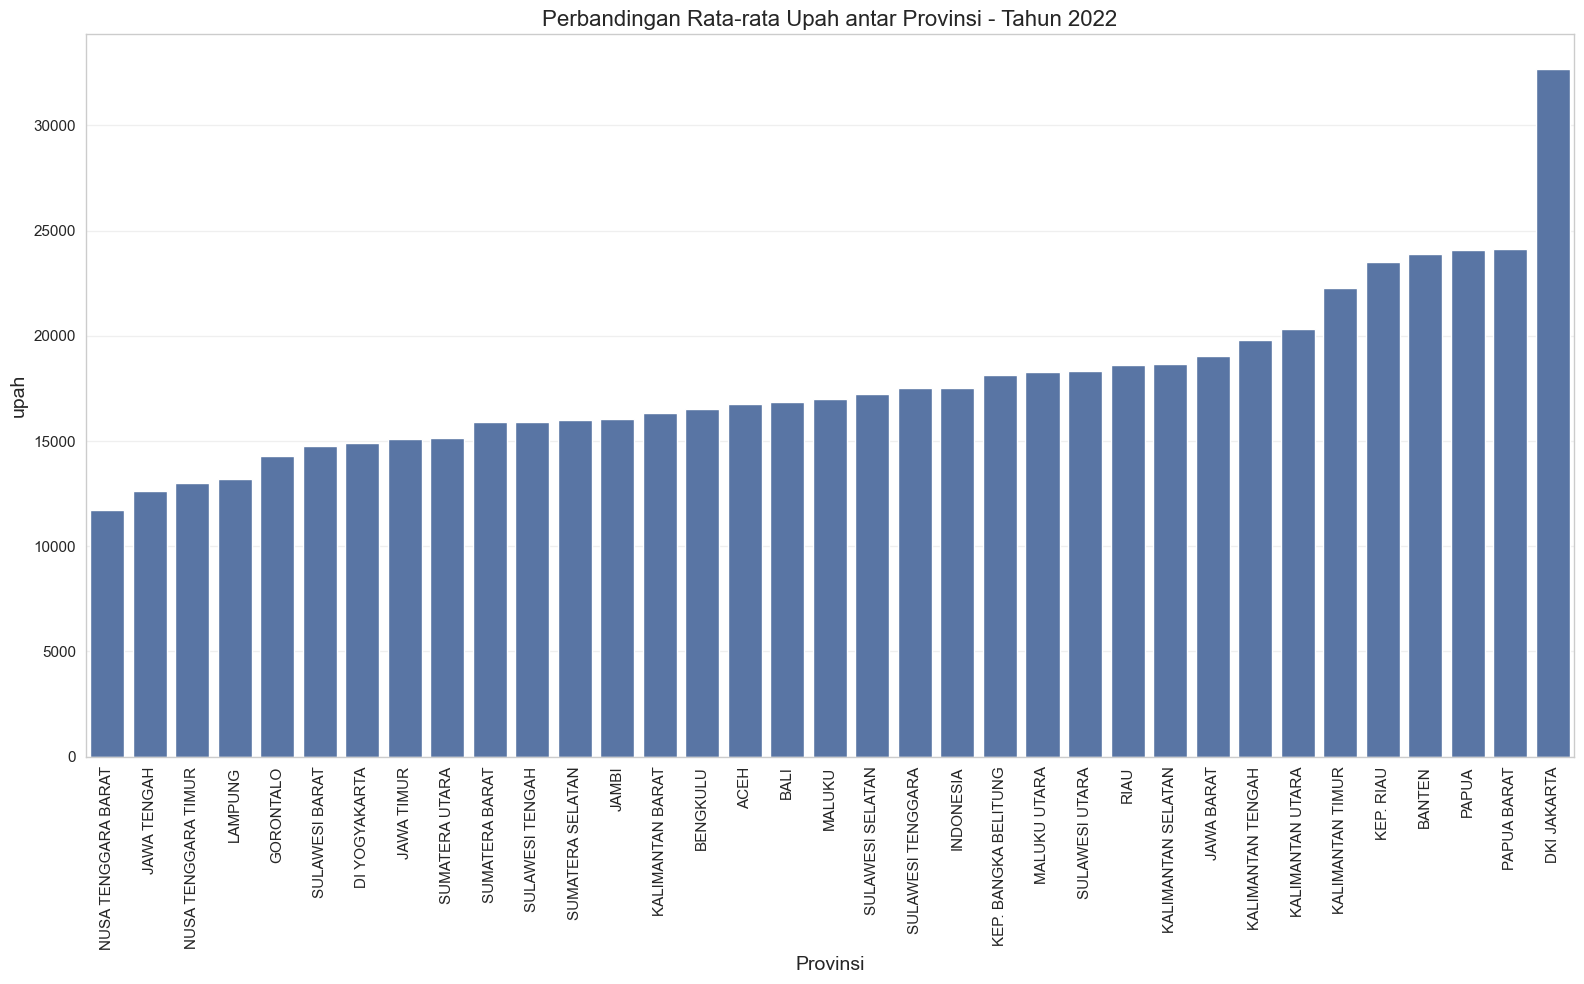

In [21]:
plot_province_comparison(rata_rata_upah, 'upah', 'Perbandingan Rata-rata Upah antar Provinsi', year=latest_year)

## Analisis Korelasi dan Hubungan antar Variabel

In [22]:
# Membuat dataset gabungan untuk analisis korelasi
def prepare_correlation_dataset(df_merged):
    """Menyiapkan dataset untuk analisis korelasi dengan melakukan agregasi."""
    # Agregasi data pada level provinsi dan tahun
    corr_data = df_merged.groupby(['provinsi', 'tahun']).agg({
        'gk': 'mean',
        'ump': 'first',  # UMP sama untuk semua daerah dalam provinsi yang sama
        'peng': 'mean',  # Rata-rata pengeluaran
        'upah': 'first'  # Upah rata-rata sama untuk semua daerah dalam provinsi yang sama
    }).reset_index()
    
    return corr_data.dropna()

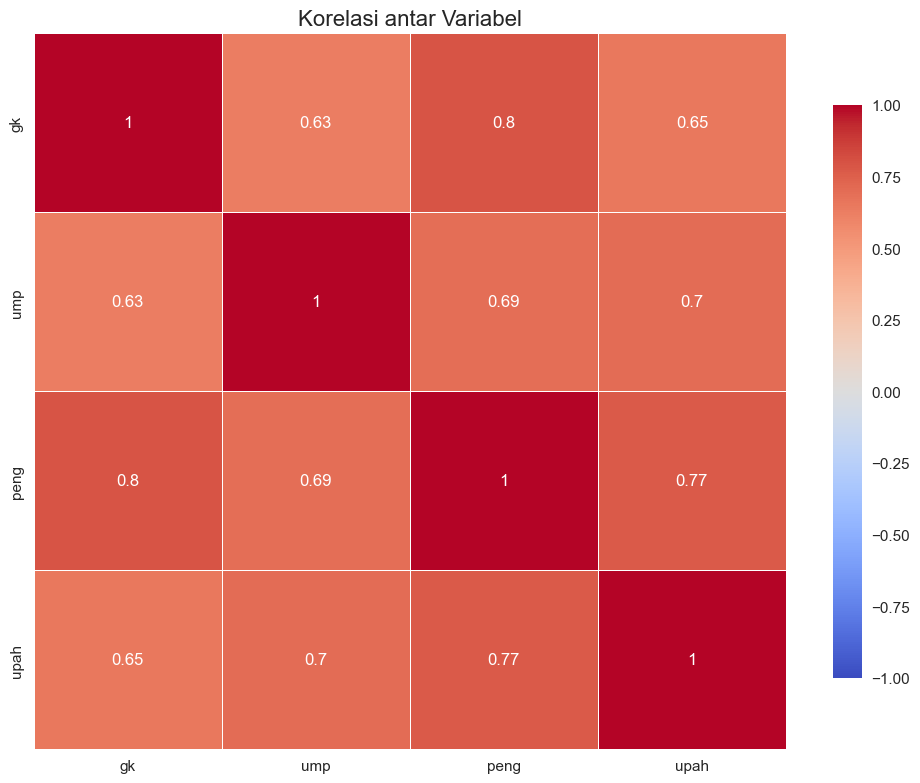

In [23]:
# Hitung korelasi
corr_data = prepare_correlation_dataset(df_merged)
correlation_matrix = corr_data[['gk', 'ump', 'peng', 'upah']].corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Korelasi antar Variabel', fontsize=16)
plt.tight_layout()
plt.show()

## Analisis distribusi dan statistik untuk setiap variabel

In [24]:
def plot_distribution(data, column, title):
    """Plot distribusi dan statistik deskriptif untuk suatu variabel."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram dengan KDE
    sns.histplot(data[column], kde=True, ax=ax1)
    ax1.set_title(f'Distribusi {title}', fontsize=14)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frekuensi')
    
    # Box plot
    sns.boxplot(y=data[column], ax=ax2)
    ax2.set_title(f'Box Plot {title}', fontsize=14)
    ax2.set_ylabel(column)
    
    # Tambahkan statistik deskriptif
    stats_text = (
        f"Mean: {data[column].mean():.2f}\n"
        f"Median: {data[column].median():.2f}\n"
        f"Std Dev: {data[column].std():.2f}\n"
        f"Min: {data[column].min():.2f}\n"
        f"Max: {data[column].max():.2f}\n"
        f"Skewness: {data[column].skew():.2f}\n"
        f"Kurtosis: {data[column].kurtosis():.2f}"
    )
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax2.text(1.05, 0.5, stats_text, transform=ax2.transAxes, fontsize=12,
             verticalalignment='center', bbox=props)
    
    plt.tight_layout()
    plt.show()

### UMP

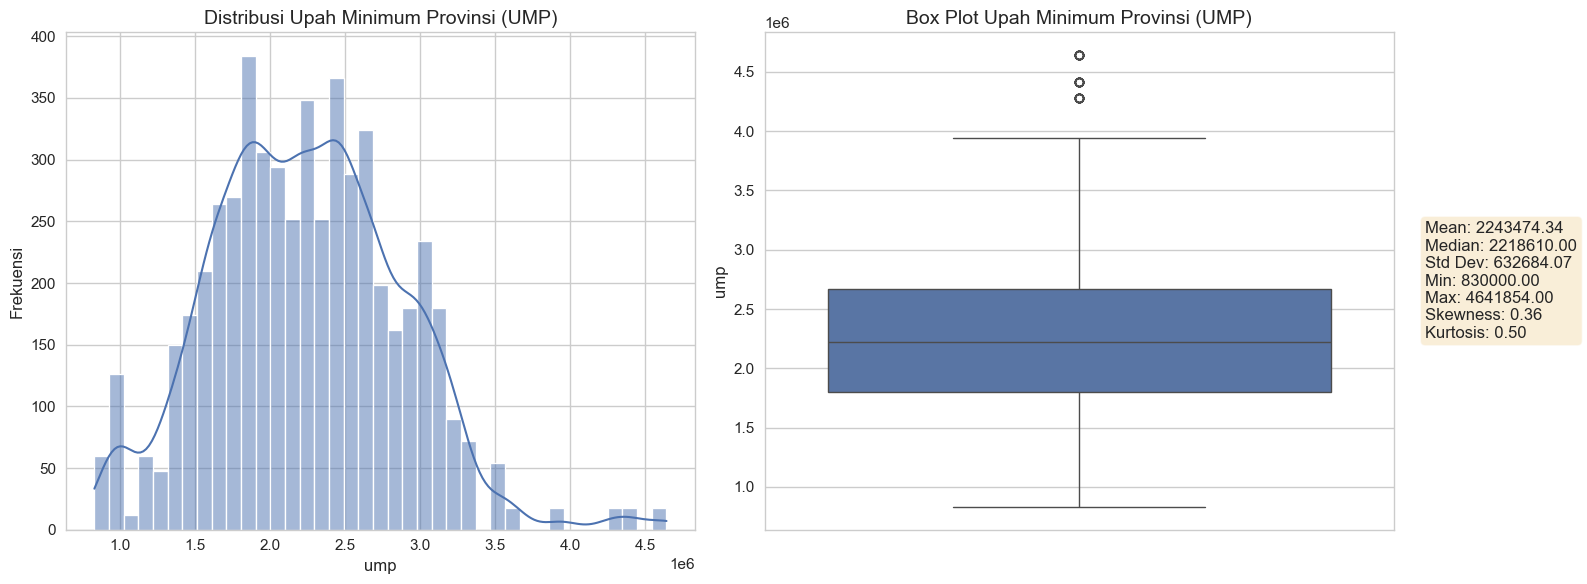

In [25]:
plot_distribution(df_merged.dropna(subset=['ump']), 'ump', 'Upah Minimum Provinsi (UMP)')

### Garis Kemiskinan

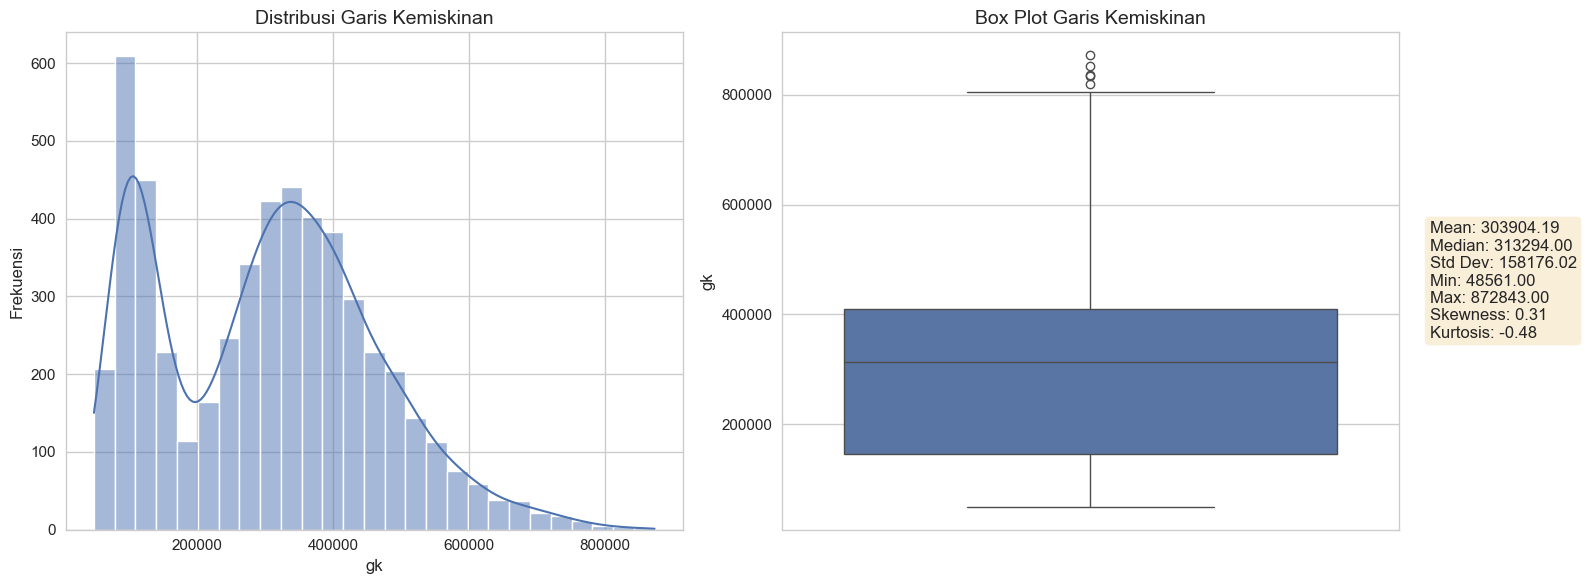

In [26]:
plot_distribution(df_merged.dropna(subset=['gk']), 'gk', 'Garis Kemiskinan')

### Penghasilan

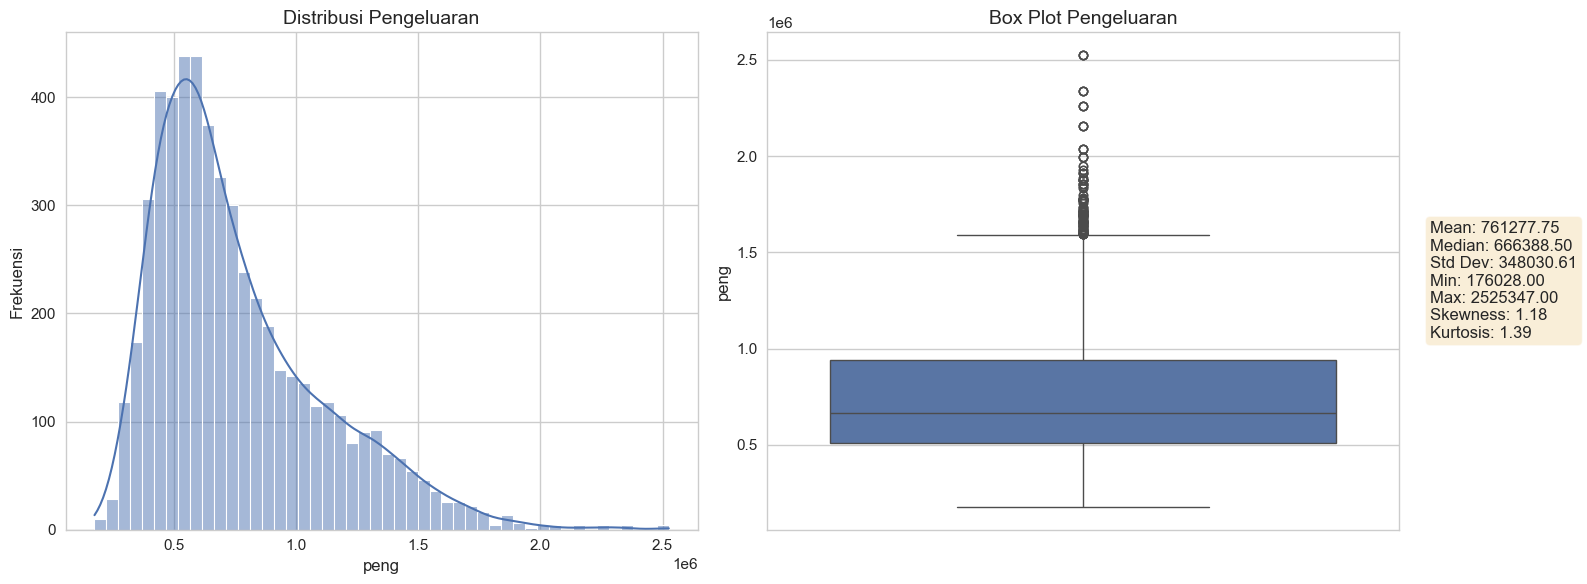

In [27]:
plot_distribution(df_merged.dropna(subset=['peng']), 'peng', 'Pengeluaran')

### Upah

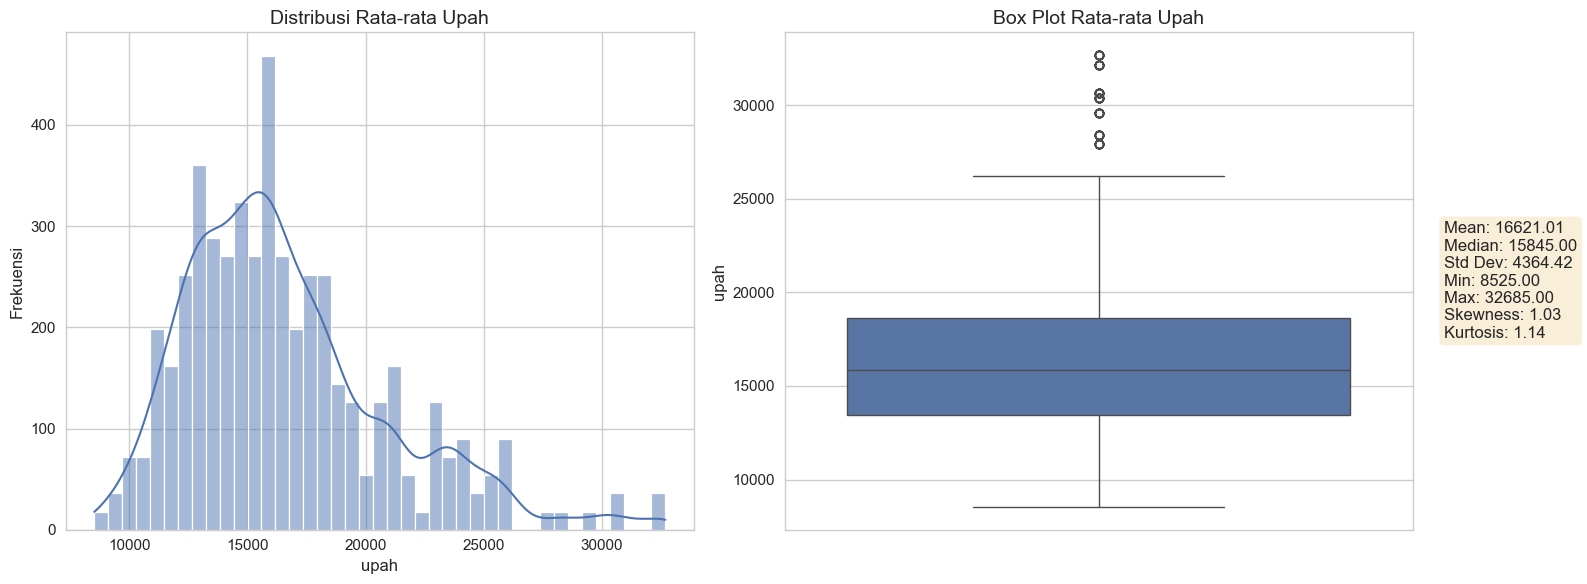

In [28]:
plot_distribution(df_merged.dropna(subset=['upah']), 'upah', 'Rata-rata Upah')

## Analisis Bivariat (hubungan antar dua variabel)

In [29]:
def plot_scatter_with_regression(data, x_col, y_col, title, hue=None):
    """Plot scatter dengan garis regresi."""
    plt.figure(figsize=(12, 8))
    
    # Scatter plot dengan regression line
    if hue:
        sns.scatterplot(x=x_col, y=y_col, hue=hue, data=data, alpha=0.7, s=100)
    else:
        sns.scatterplot(x=x_col, y=y_col, data=data, alpha=0.7, s=100)
    
    # Tambahkan regression line
    sns.regplot(x=x_col, y=y_col, data=data, scatter=False, 
                line_kws={"color": "red", "alpha": 0.7, "lw": 2})
    
    # Hitung korelasi dan annotasi
    corr = data[[x_col, y_col]].corr().iloc[0, 1]
    plt.annotate(f'Correlation: {corr:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1))
    
    plt.title(title, fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Upah Minimum vs Garis Kemiskinan

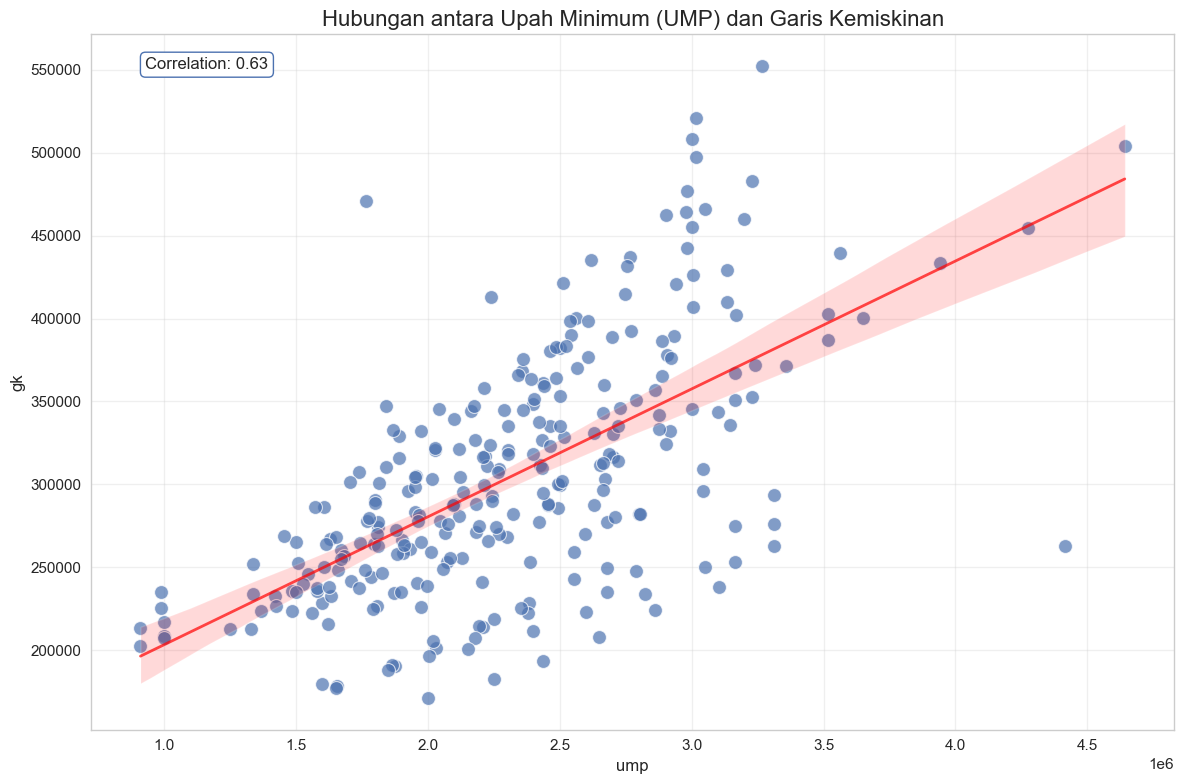

In [30]:
# Plot hubungan bivariat
scatter_data = corr_data.dropna()

# Upah Minimum vs Garis Kemiskinan
plot_scatter_with_regression(scatter_data, 'ump', 'gk', 
                             'Hubungan antara Upah Minimum (UMP) dan Garis Kemiskinan')

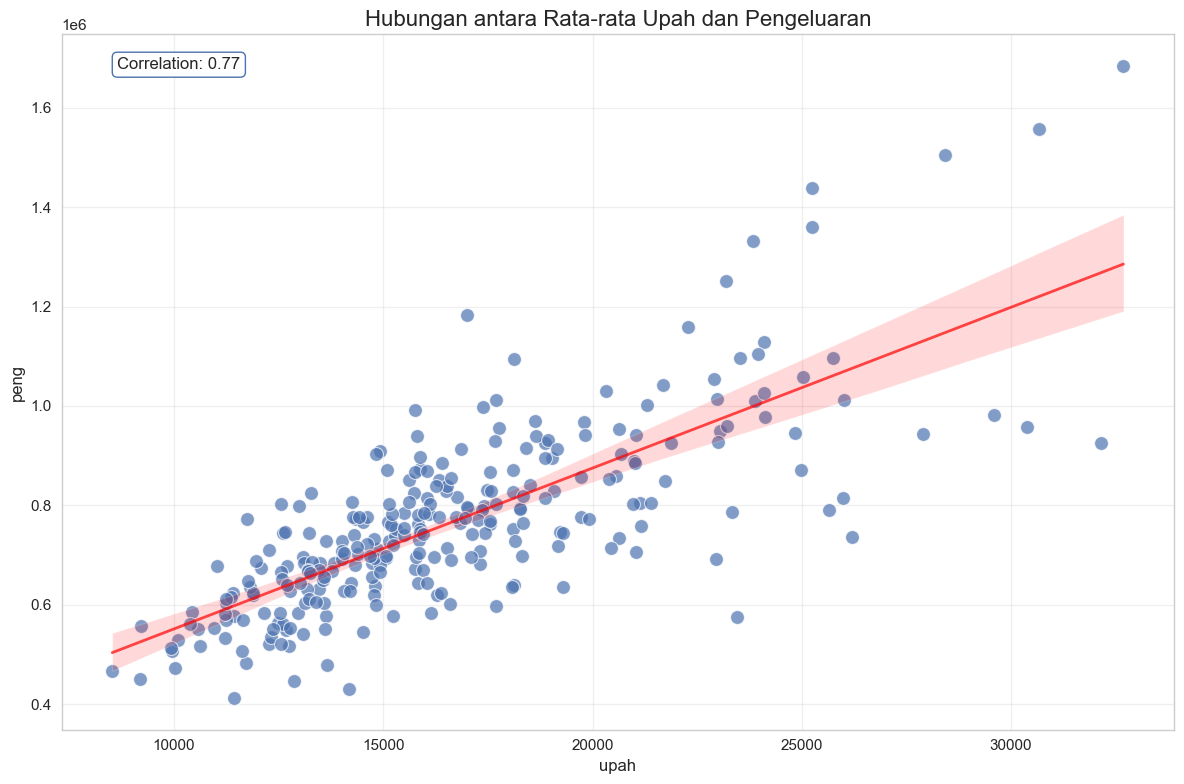

In [31]:
# Rata-rata Upah vs Pengeluaran
plot_scatter_with_regression(scatter_data, 'upah', 'peng', 
                             'Hubungan antara Rata-rata Upah dan Pengeluaran')

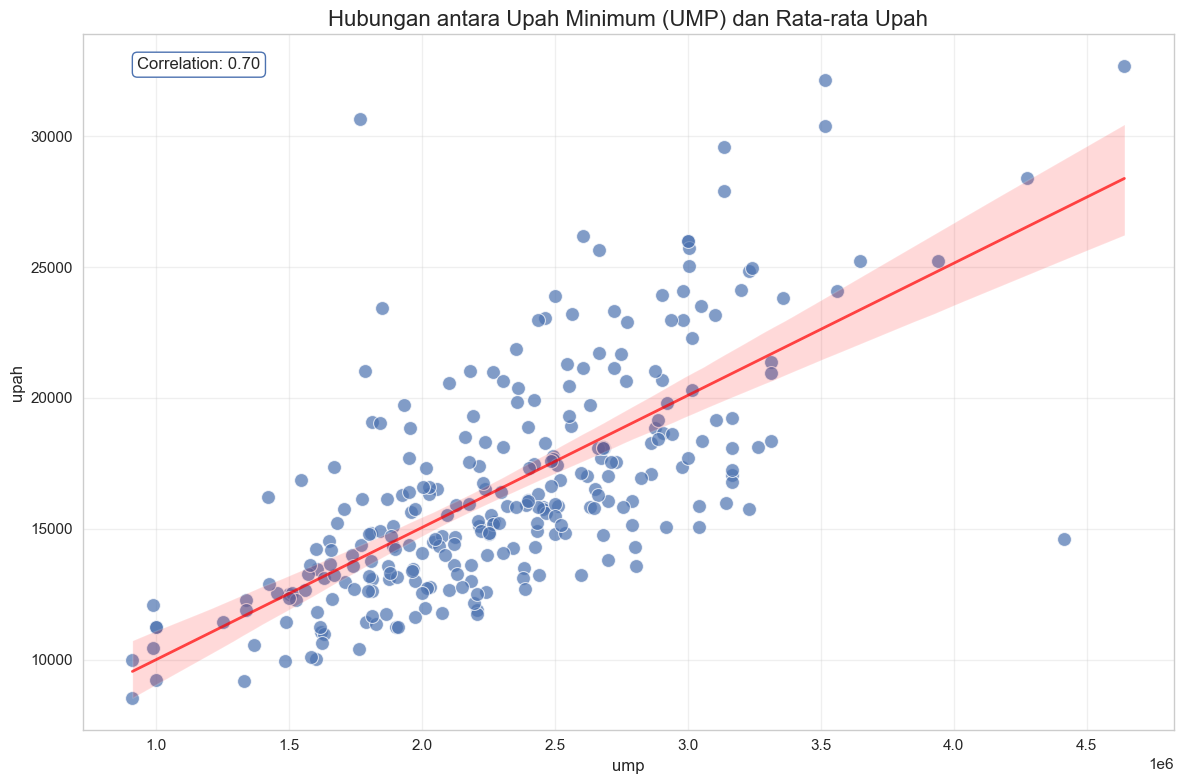

In [32]:
# UMP vs Rata-rata Upah
plot_scatter_with_regression(scatter_data, 'ump', 'upah', 
                             'Hubungan antara Upah Minimum (UMP) dan Rata-rata Upah')

## Analisis berdasarkan Kategori (Daerah dan Jenis)

In [33]:
# Analisis perbedaan antar kategori
def plot_category_comparison(data, y_column, category, title):
    """Plot perbandingan nilai berdasarkan kategori."""
    plt.figure(figsize=(14, 8))
    
    # Box plot berdasarkan kategori
    sns.boxplot(x=category, y=y_column, data=data)
    
    # Tambahkan strip plot untuk melihat distribusi data asli
    sns.stripplot(x=category, y=y_column, data=data, 
                  size=4, color=".3", linewidth=0, alpha=0.6)
    
    plt.title(title, fontsize=16)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Tambahkan analisis statistik
    print(f"Statistik deskriptif {y_column} berdasarkan {category}:")
    stats_table = data.groupby(category)[y_column].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
    print(stats_table)
    
    # Lakukan T-test jika kategori memiliki 2 kelompok
    if data[category].nunique() == 2:
        groups = data[category].unique()
        group1 = data[data[category] == groups[0]][y_column]
        group2 = data[data[category] == groups[1]][y_column]
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        print(f"\nT-test untuk perbedaan rata-rata {y_column} antara {groups[0]} dan {groups[1]}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.4f}")
        if p_val < 0.05:
            print(f"Kesimpulan: Terdapat perbedaan signifikan pada tingkat kepercayaan 95%")
        else:
            print(f"Kesimpulan: Tidak terdapat perbedaan signifikan pada tingkat kepercayaan 95%")

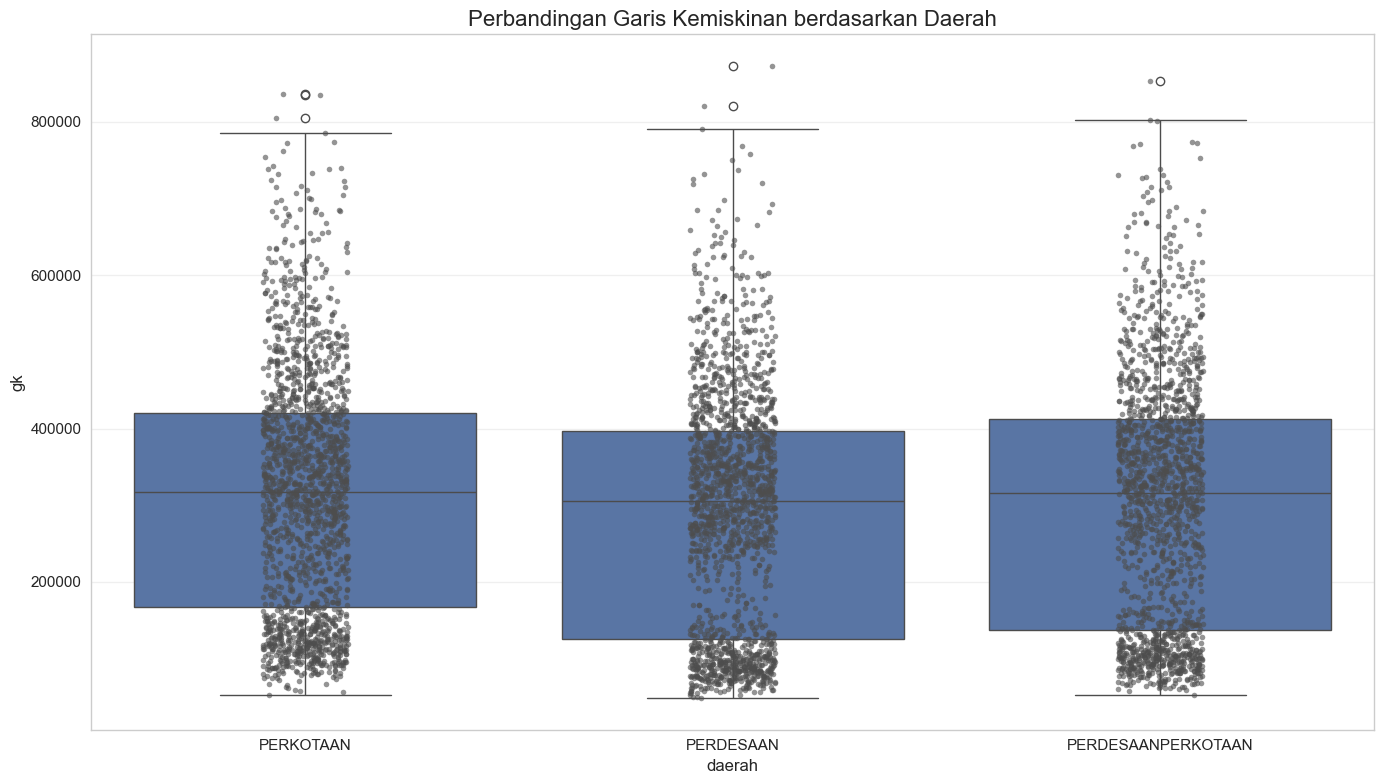

Statistik deskriptif gk berdasarkan daerah:
                    count           mean            std      min    median  \
daerah                                                                       
PERDESAAN            1765  291938.079887  155173.445401  48561.0  305404.0   
PERDESAANPERKOTAAN   1680  303742.157143  161891.116232  53095.0  316213.0   
PERKOTAAN            1816  315684.132709  156791.432921  52529.0  317704.0   

                         max  
daerah                        
PERDESAAN           872843.0  
PERDESAANPERKOTAAN  853226.0  
PERKOTAAN           836425.0  


In [34]:
# Analisis perbedaan garis kemiskinan berdasarkan daerah
plot_category_comparison(df_merged.dropna(subset=['gk', 'daerah']), 
                         'gk', 'daerah', 
                         'Perbandingan Garis Kemiskinan berdasarkan Daerah')

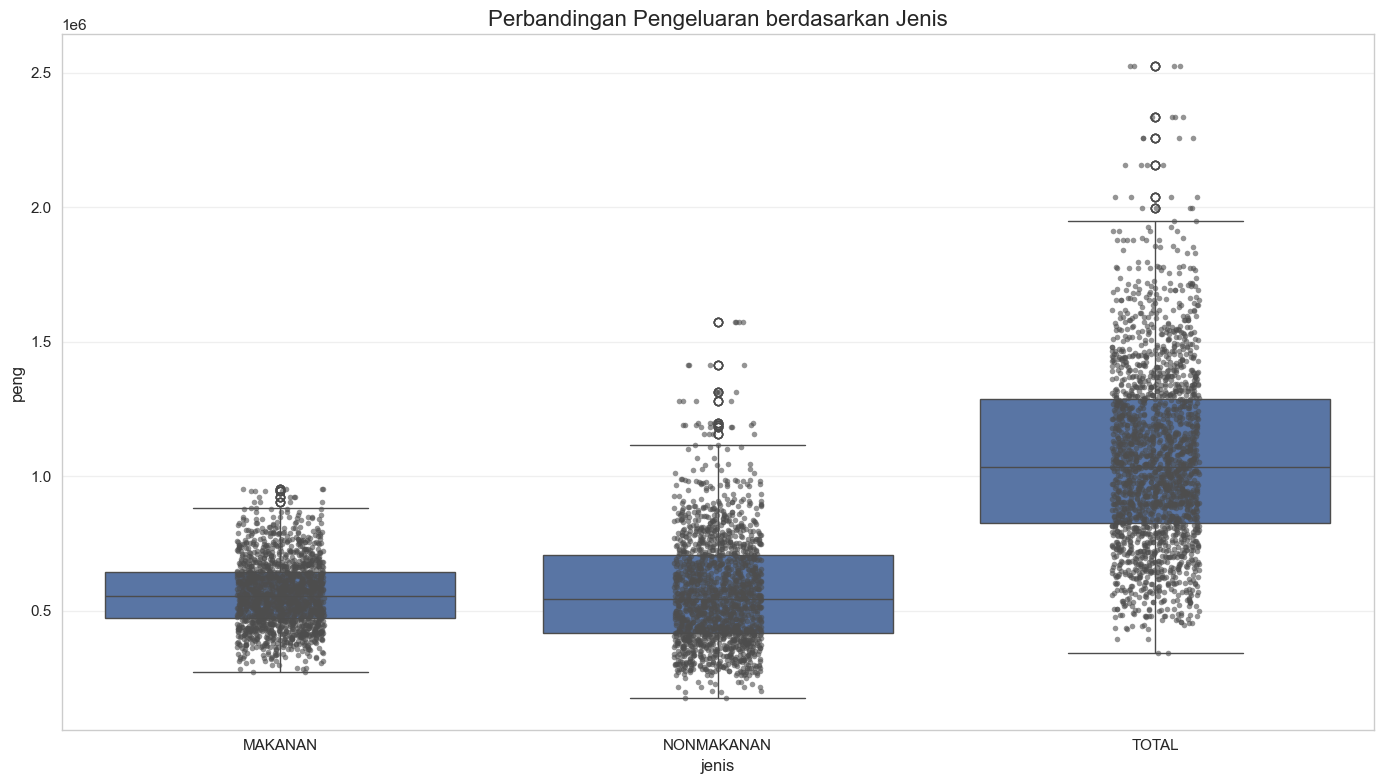

Statistik deskriptif peng berdasarkan jenis:
            count          mean            std       min     median        max
jenis                                                                         
MAKANAN      1664  5.649470e+05  125544.542917  272347.0   556930.5   953320.0
NONMAKANAN   1664  5.744923e+05  209164.115877  176028.0   543113.5  1572026.0
TOTAL        2068  1.069549e+06  337743.691815  343519.0  1035171.0  2525347.0


In [35]:
# Analisis perbedaan pengeluaran berdasarkan jenis
plot_category_comparison(df_merged.dropna(subset=['peng', 'jenis']), 
                         'peng', 'jenis', 
                         'Perbandingan Pengeluaran berdasarkan Jenis')

## Analisis Outlier

In [36]:
# Deteksi dan analisis outlier
def detect_outliers(data, column):
    """Deteksi outlier menggunakan IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def analyze_outliers(data, column, title):
    """Analisis detail outlier untuk suatu variabel."""
    outliers, lower_bound, upper_bound = detect_outliers(data, column)
    
    print(f"\n=== Analisis Outlier untuk {title} ===")
    print(f"Batas bawah: {lower_bound:.2f}")
    print(f"Batas atas: {upper_bound:.2f}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {(len(outliers) / len(data) * 100):.2f}%")
    
    if len(outliers) > 0:
        # Tampilkan top 10 outlier
        print("\nTop 10 outlier:")
        if 'provinsi' in outliers.columns and 'tahun' in outliers.columns:
            print(outliers.sort_values(by=column, ascending=False)
                  .head(10)[['provinsi', 'tahun', column]])
        else:
            print(outliers.sort_values(by=column, ascending=False).head(10))
        
        # Visualisasi outlier
        plt.figure(figsize=(14, 8))
        
        # Scatter plot untuk semua data
        plt.scatter(range(len(data)), data[column], alpha=0.5, color='blue', label='Normal')
        
        # Highlight outlier
        if len(outliers) > 0:
            outlier_indices = outliers.index
            plt.scatter(outlier_indices, outliers[column], color='red', s=100, label='Outlier')
        
        # Tambahkan batas
        plt.axhline(y=upper_bound, color='r', linestyle='-', alpha=0.3, label='Upper Bound')
        plt.axhline(y=lower_bound, color='r', linestyle='-', alpha=0.3, label='Lower Bound')
        
        plt.title(f'Outlier Detection untuk {title}', fontsize=16)
        plt.xlabel('Index', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


=== Analisis Outlier untuk Upah Minimum Provinsi (UMP) ===
Batas bawah: 501312.50
Batas atas: 3966412.50
Jumlah outlier: 54
Persentase outlier: 0.99%

Top 10 outlier:
         provinsi  tahun        ump
1646  DKI JAKARTA   2022  4641854.0
1647  DKI JAKARTA   2022  4641854.0
1714  DKI JAKARTA   2022  4641854.0
1711  DKI JAKARTA   2022  4641854.0
1710  DKI JAKARTA   2022  4641854.0
1707  DKI JAKARTA   2022  4641854.0
1706  DKI JAKARTA   2022  4641854.0
1655  DKI JAKARTA   2022  4641854.0
1654  DKI JAKARTA   2022  4641854.0
1651  DKI JAKARTA   2022  4641854.0


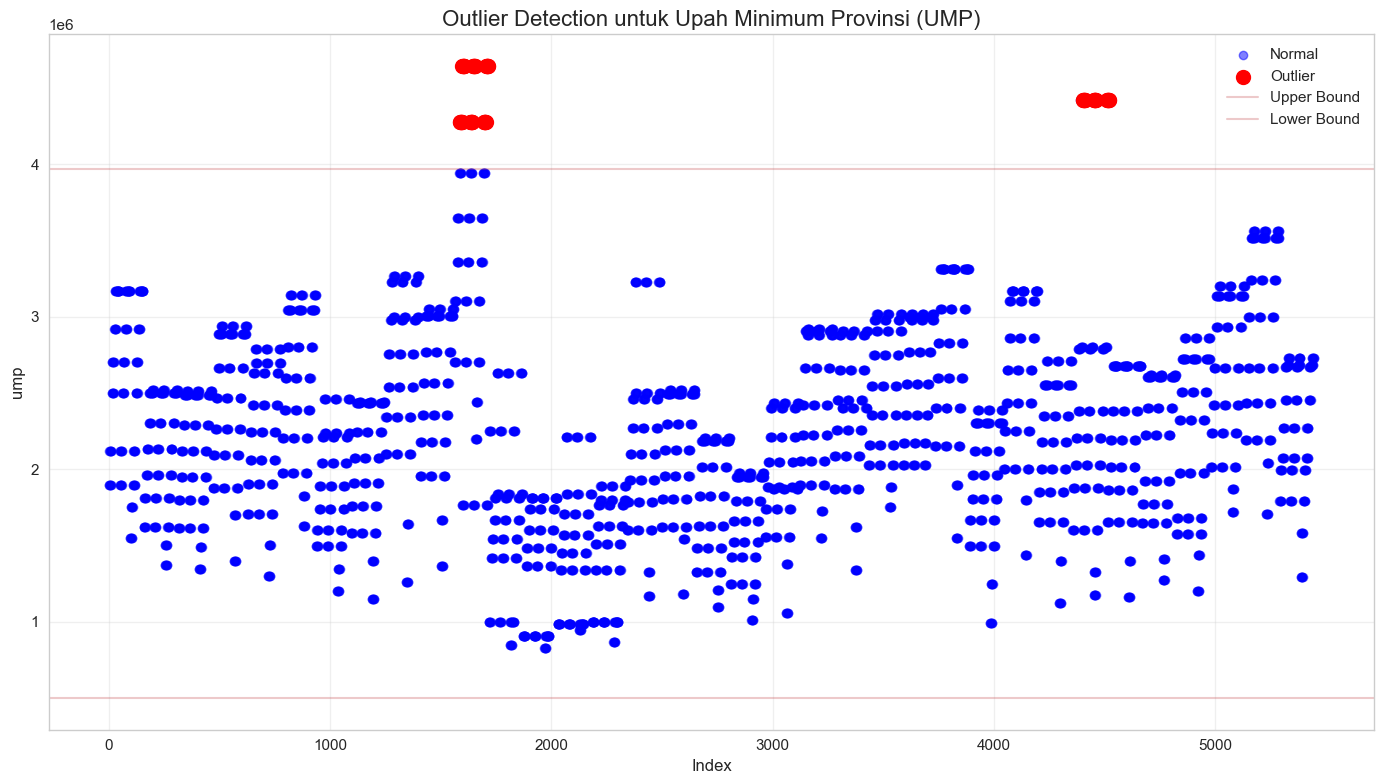

In [37]:
analyze_outliers(df_merged.dropna(subset=['ump']), 'ump', 'Upah Minimum Provinsi (UMP)')


=== Analisis Outlier untuk Garis Kemiskinan ===
Batas bawah: -253597.00
Batas atas: 808459.00
Jumlah outlier: 5
Persentase outlier: 0.10%

Top 10 outlier:
                  provinsi  tahun        gk
1399  KEP. BANGKA BELITUNG   2022  872843.0
1403  KEP. BANGKA BELITUNG   2022  853226.0
1395  KEP. BANGKA BELITUNG   2022  836425.0
3735      KALIMANTAN UTARA   2022  834774.0
1398  KEP. BANGKA BELITUNG   2022  820543.0


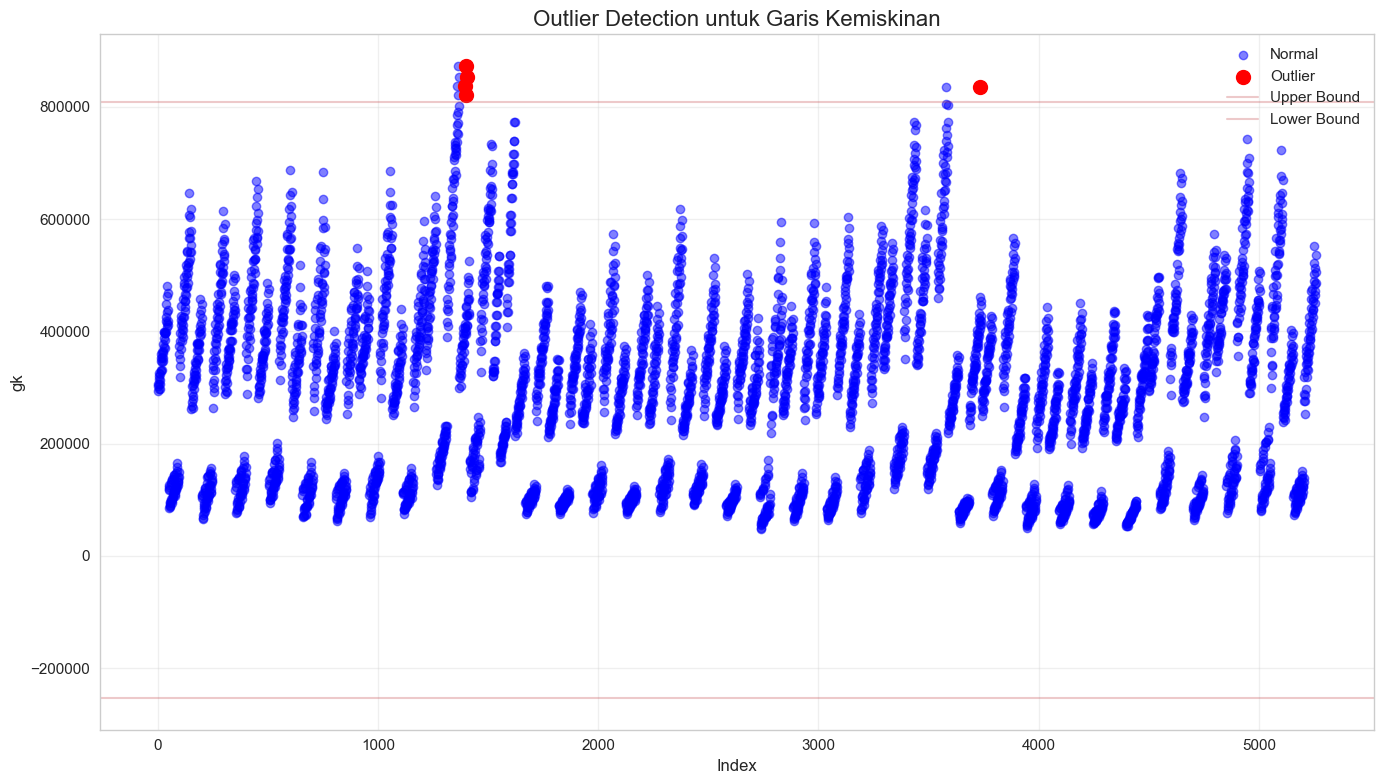

In [38]:
analyze_outliers(df_merged.dropna(subset=['gk']), 'gk', 'Garis Kemiskinan')


=== Analisis Outlier untuk Pengeluaran ===
Batas bawah: -143395.00
Batas atas: 1591573.00
Jumlah outlier: 144
Persentase outlier: 2.67%

Top 10 outlier:
         provinsi  tahun       peng
1707  DKI JAKARTA   2022  2525347.0
1715  DKI JAKARTA   2022  2525347.0
1714  DKI JAKARTA   2022  2525347.0
1706  DKI JAKARTA   2022  2525347.0
1712  DKI JAKARTA   2021  2336429.0
1704  DKI JAKARTA   2021  2336429.0
1705  DKI JAKARTA   2021  2336429.0
1713  DKI JAKARTA   2021  2336429.0
1702  DKI JAKARTA   2020  2257991.0
1703  DKI JAKARTA   2020  2257991.0


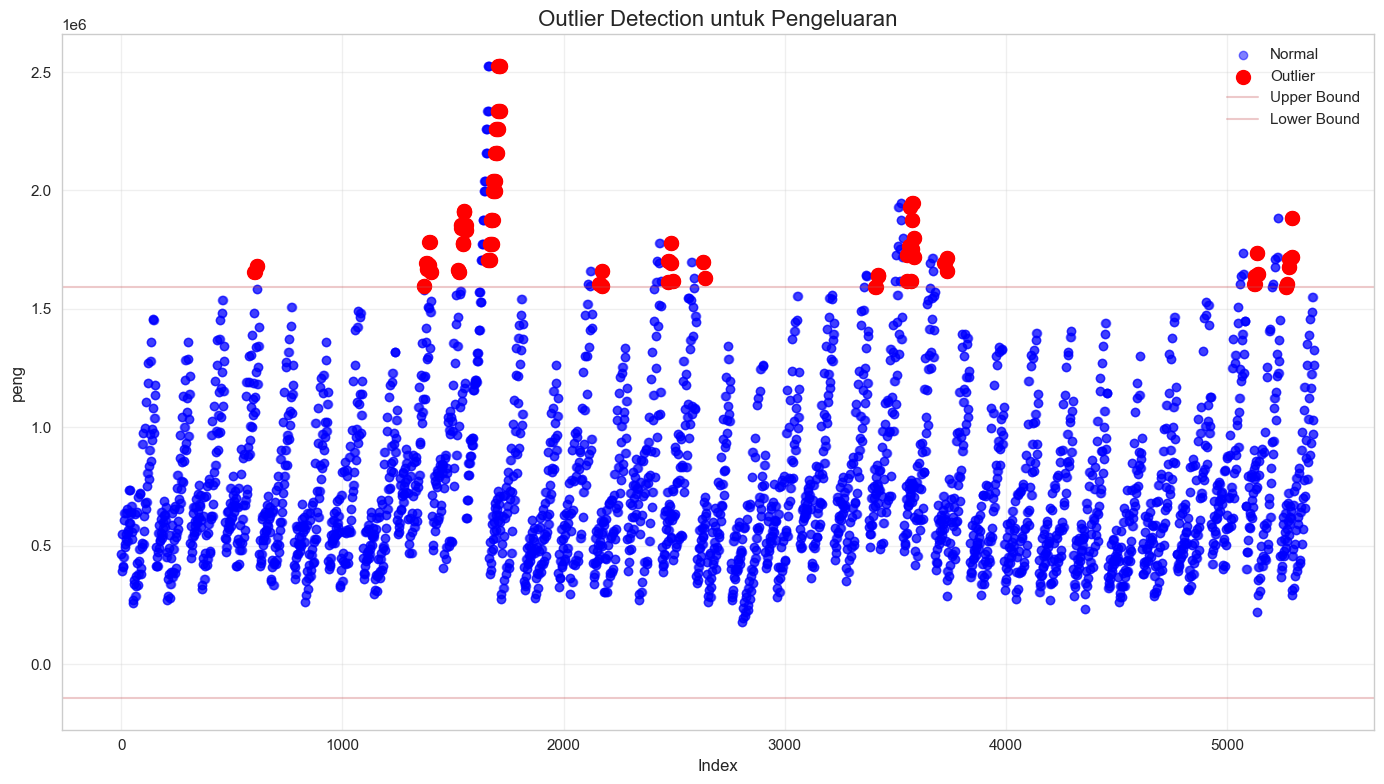

In [39]:
analyze_outliers(df_merged.dropna(subset=['peng']), 'peng', 'Pengeluaran')


=== Analisis Outlier untuk Rata-rata Upah ===
Batas bawah: 5719.75
Batas atas: 26383.75
Jumlah outlier: 126
Persentase outlier: 2.50%

Top 10 outlier:
         provinsi  tahun     upah
1650  DKI JAKARTA   2022  32685.0
1646  DKI JAKARTA   2022  32685.0
1651  DKI JAKARTA   2022  32685.0
1654  DKI JAKARTA   2022  32685.0
1655  DKI JAKARTA   2022  32685.0
1706  DKI JAKARTA   2022  32685.0
1607  DKI JAKARTA   2022  32685.0
1606  DKI JAKARTA   2022  32685.0
1707  DKI JAKARTA   2022  32685.0
1710  DKI JAKARTA   2022  32685.0


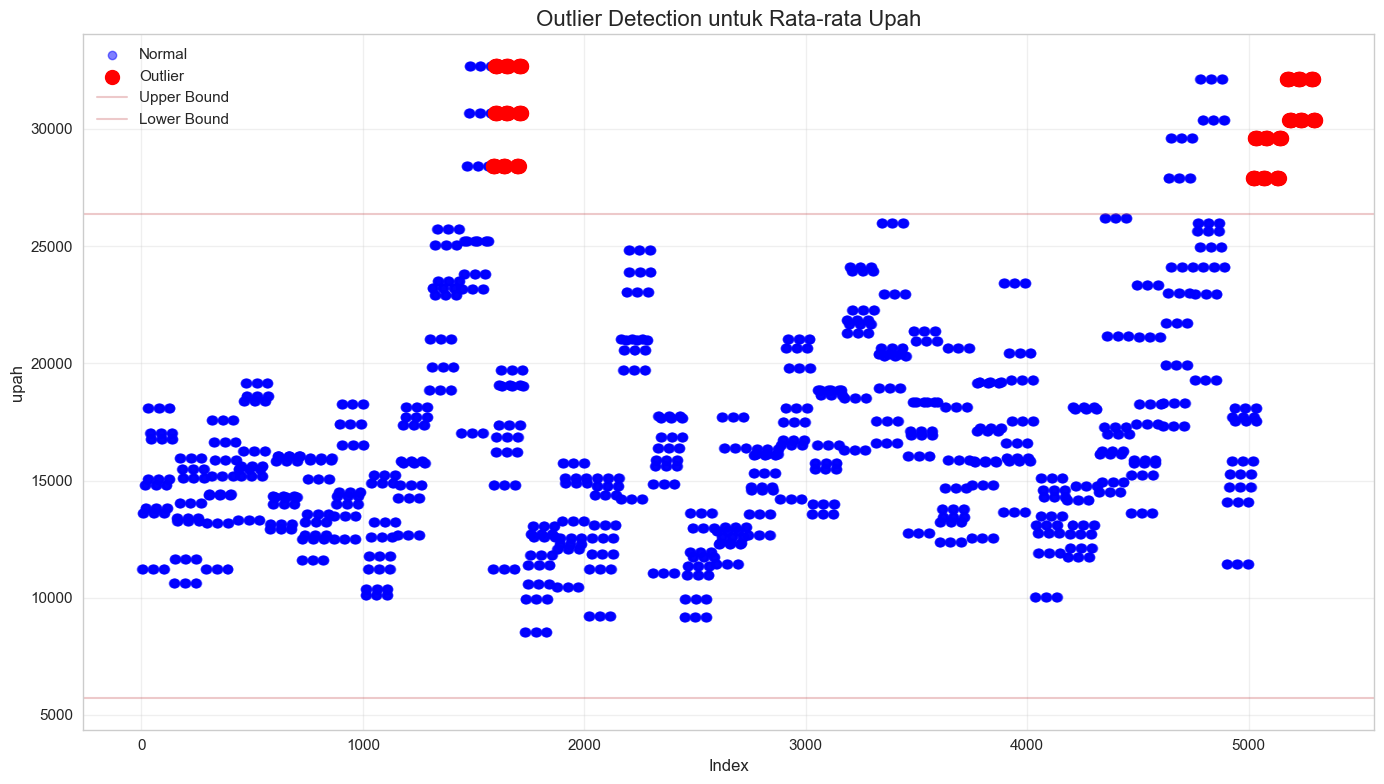

In [40]:
analyze_outliers(df_merged.dropna(subset=['upah']), 'upah', 'Rata-rata Upah')

## Analisis Gap antara UMP dan Garis Kemiskinan

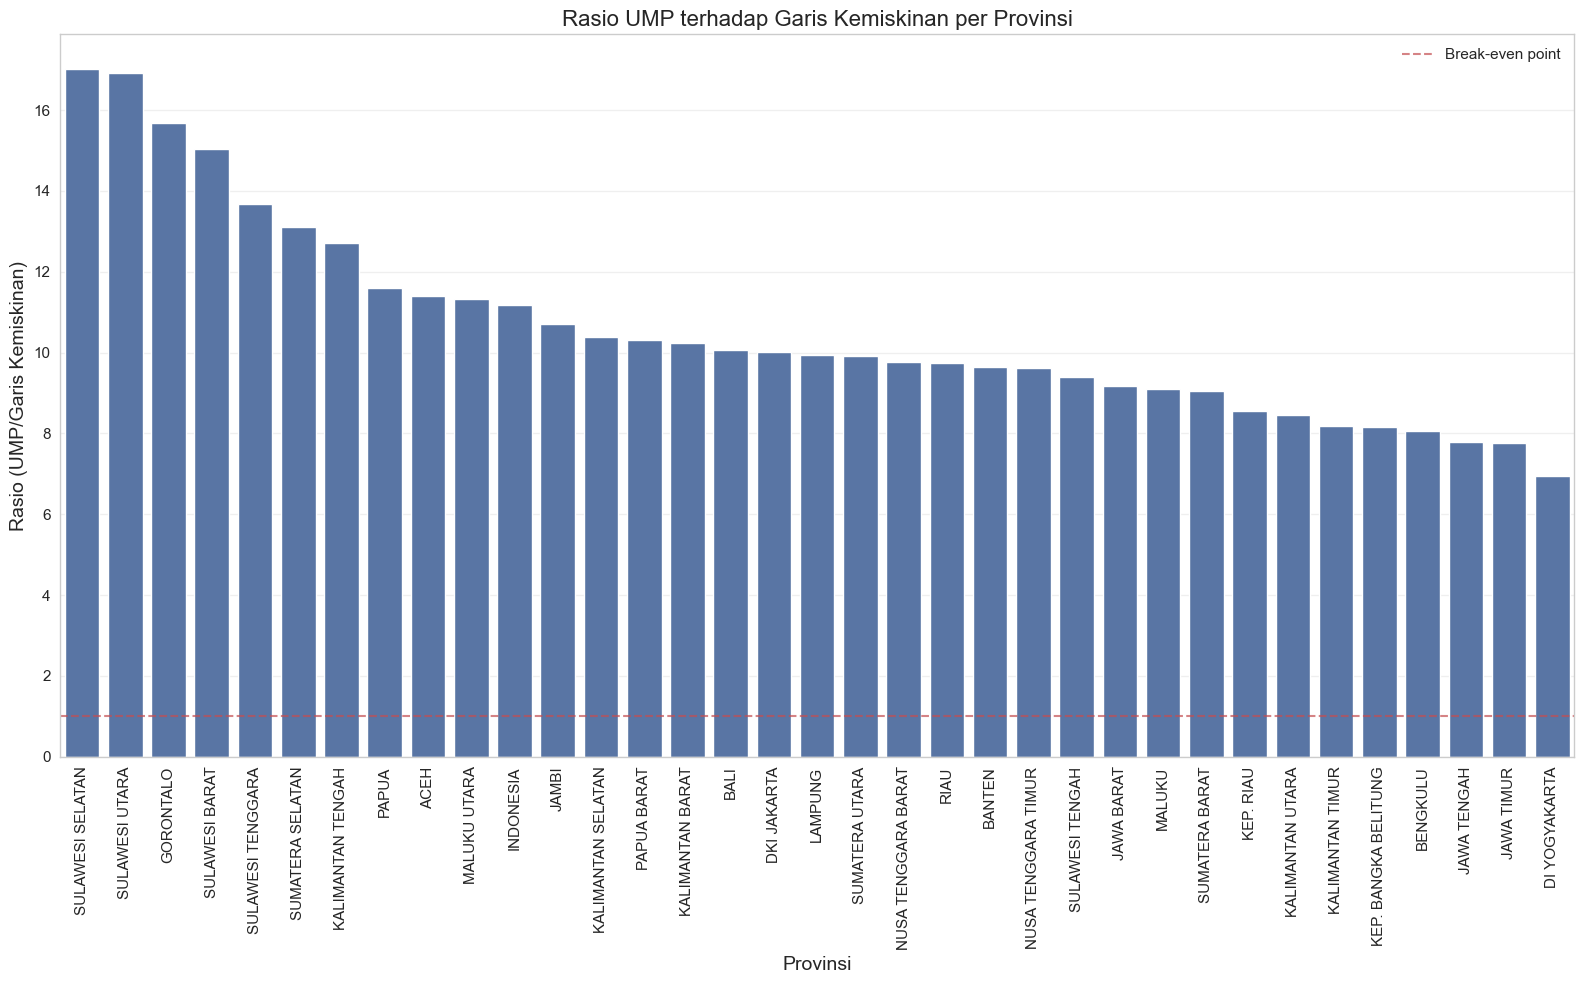

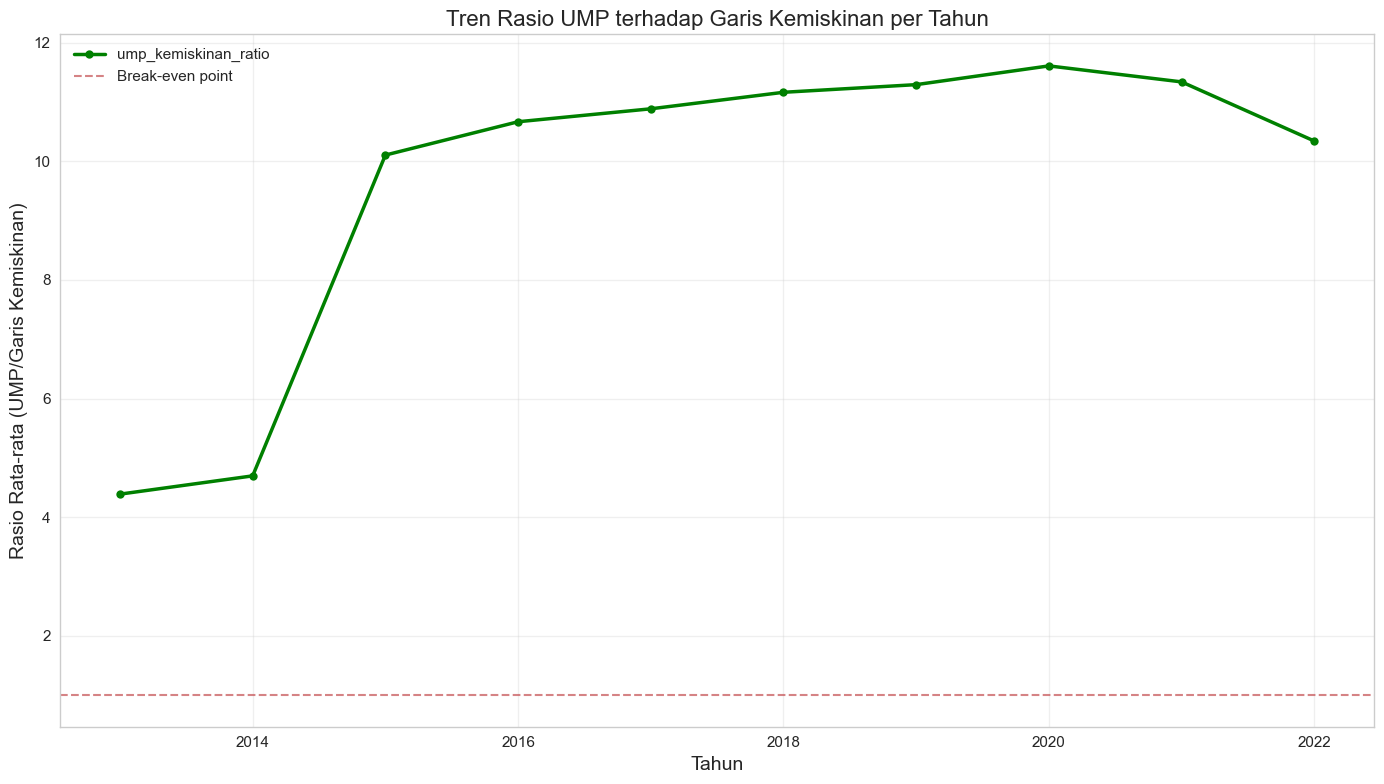

Statistik rasio UMP terhadap Garis Kemiskinan:
count    5261.000000
mean       10.599375
std         7.868942
min         2.468352
25%         5.166724
50%         6.709880
75%        15.641799
max        56.363411
Name: ump_kemiskinan_ratio, dtype: float64

Provinsi dengan rasio tertinggi:
provinsi
SULAWESI SELATAN     17.021772
SULAWESI UTARA       16.920805
GORONTALO            15.684888
SULAWESI BARAT       15.038259
SULAWESI TENGGARA    13.683399
Name: ump_kemiskinan_ratio, dtype: float64

Provinsi dengan rasio terendah:
provinsi
DI YOGYAKARTA           6.956163
JAWA TIMUR              7.757193
JAWA TENGAH             7.799617
BENGKULU                8.063843
KEP. BANGKA BELITUNG    8.154777
Name: ump_kemiskinan_ratio, dtype: float64

Persentase kasus dimana UMP mencukupi garis kemiskinan: 100.00%
Persentase kasus dimana UMP tidak mencukupi garis kemiskinan: 0.00%


In [41]:
# Hitung rasio UMP terhadap garis kemiskinan
def analyze_economic_gap(data):
    """Analisis gap antara UMP dan garis kemiskinan."""
    # Hitung rasio dan gap
    gap_data = data.dropna(subset=['ump', 'gk']).copy()
    gap_data['ump_kemiskinan_ratio'] = gap_data['ump'] / gap_data['gk']
    gap_data['ump_kemiskinan_gap'] = gap_data['ump'] - gap_data['gk']
    
    # Visualisasi rasio per provinsi
    plt.figure(figsize=(16, 10))
    avg_ratio = gap_data.groupby('provinsi')['ump_kemiskinan_ratio'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_ratio.index, y=avg_ratio.values)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Break-even point')
    plt.title('Rasio UMP terhadap Garis Kemiskinan per Provinsi', fontsize=16)
    plt.ylabel('Rasio (UMP/Garis Kemiskinan)', fontsize=14)
    plt.xlabel('Provinsi', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True, alpha=0.3, axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Visualisasi tren rasio berdasarkan tahun
    plt.figure(figsize=(14, 8))
    yearly_ratio = gap_data.groupby('tahun')['ump_kemiskinan_ratio'].mean()
    yearly_ratio.plot(kind='line', marker='o', linewidth=2.5, color='green')
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Break-even point')
    plt.title('Tren Rasio UMP terhadap Garis Kemiskinan per Tahun', fontsize=16)
    plt.ylabel('Rasio Rata-rata (UMP/Garis Kemiskinan)', fontsize=14)
    plt.xlabel('Tahun', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Statistik deskriptif
    print("Statistik rasio UMP terhadap Garis Kemiskinan:")
    print(gap_data['ump_kemiskinan_ratio'].describe())
    
    # Provinsi dengan rasio tertinggi dan terendah
    highest_ratio = gap_data.groupby('provinsi')['ump_kemiskinan_ratio'].mean().sort_values(ascending=False).head(5)
    lowest_ratio = gap_data.groupby('provinsi')['ump_kemiskinan_ratio'].mean().sort_values().head(5)
    
    print("\nProvinsi dengan rasio tertinggi:")
    print(highest_ratio)
    
    print("\nProvinsi dengan rasio terendah:")
    print(lowest_ratio)
    
    # Analisis jika UMP cukup untuk memenuhi kebutuhan dasar
    sufficient = gap_data[gap_data['ump_kemiskinan_ratio'] >= 1]
    insufficient = gap_data[gap_data['ump_kemiskinan_ratio'] < 1]
    
    print(f"\nPersentase kasus dimana UMP mencukupi garis kemiskinan: {len(sufficient) / len(gap_data) * 100:.2f}%")
    print(f"Persentase kasus dimana UMP tidak mencukupi garis kemiskinan: {len(insufficient) / len(gap_data) * 100:.2f}%")

# Analisis gap ekonomi
analyze_economic_gap(df_merged)

## Analisis Kesenjangan Ekonomi per Daerah

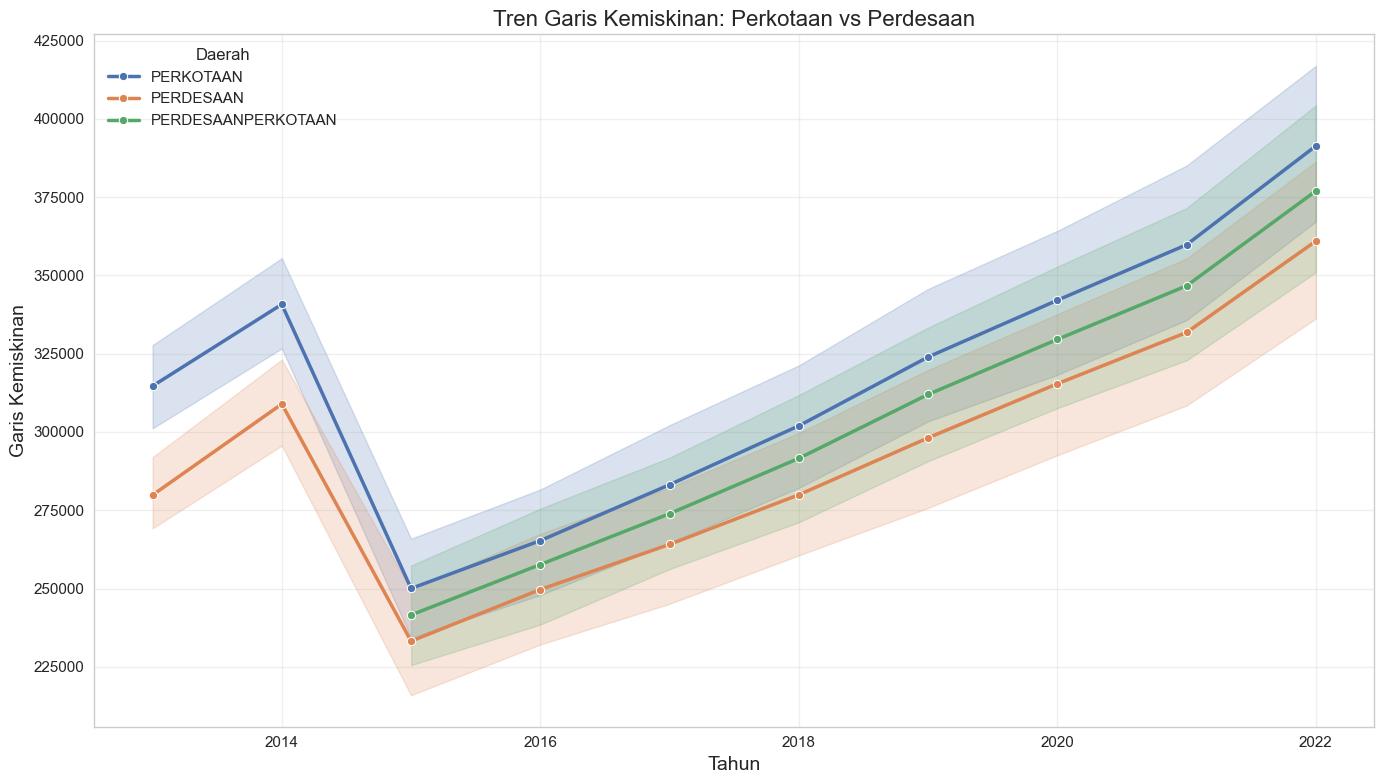

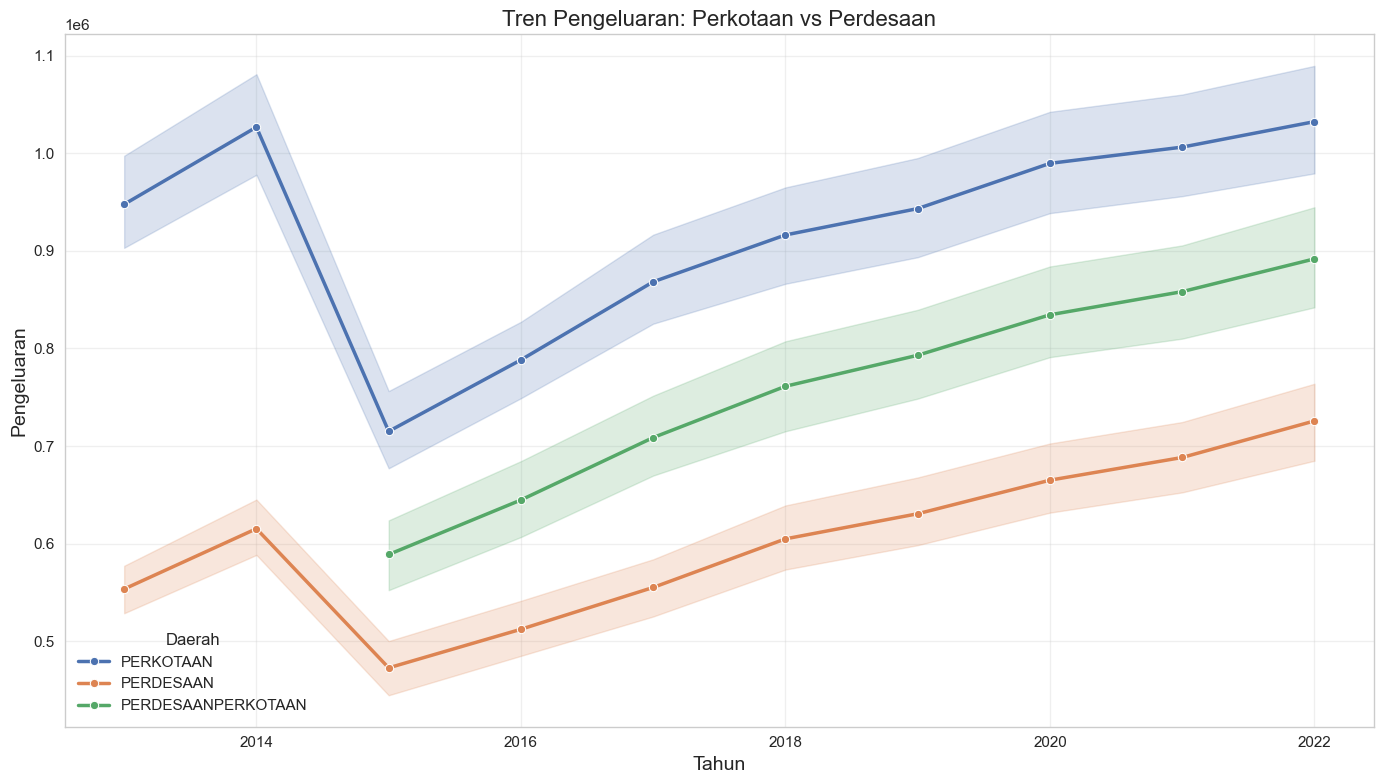

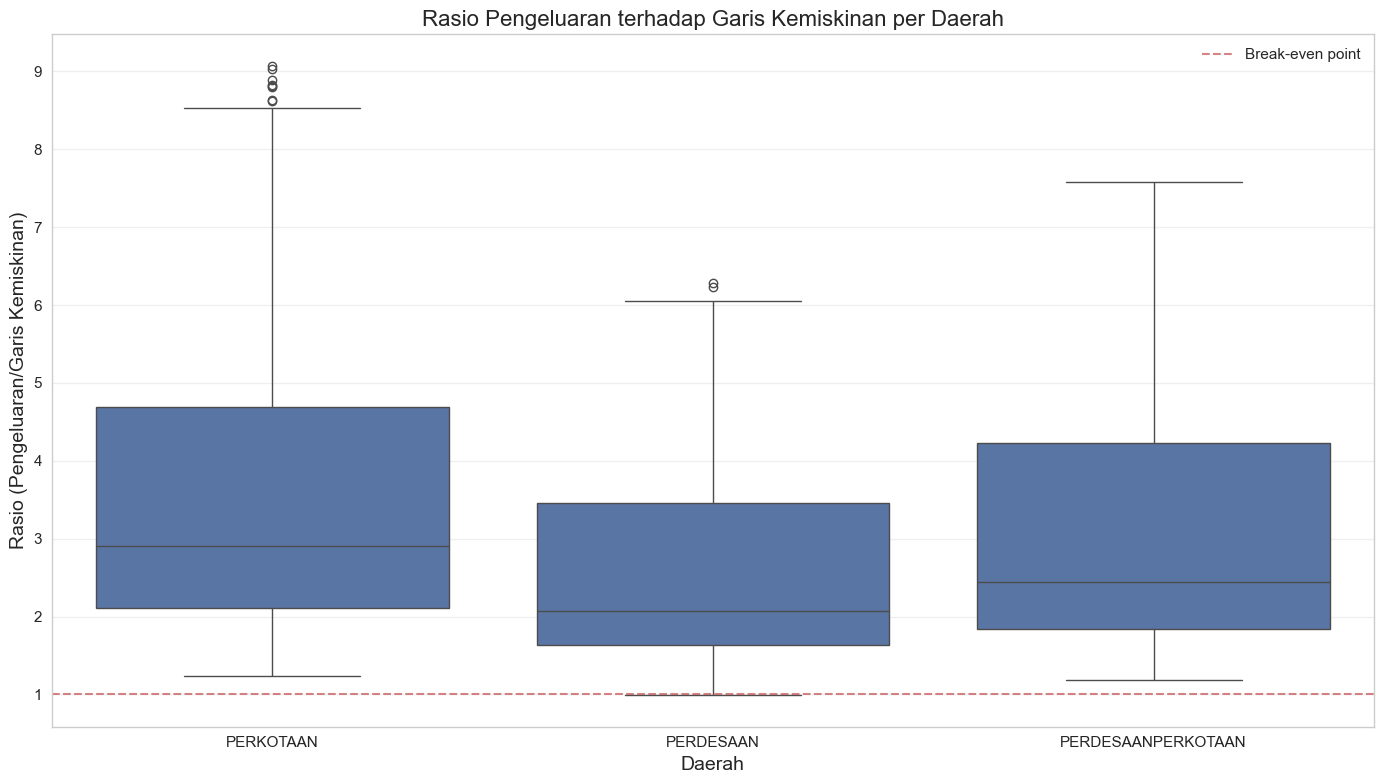

Statistik per daerah:
                               gk                                              \
                             mean            std      min    median       max   
daerah                                                                          
PERDESAAN           291857.363379  155180.379694  48561.0  305362.5  872843.0   
PERDESAANPERKOTAAN  303742.157143  161891.116232  53095.0  316213.0  853226.0   
PERKOTAAN           315684.132709  156791.432921  52529.0  317704.0  836425.0   

                             peng                                     \
                             mean            std       min    median   
daerah                                                                 
PERDESAAN           605148.114512  251082.152479  176028.0  534576.0   
PERDESAANPERKOTAAN  760165.571429  347094.682374  235710.0  637046.5   
PERKOTAAN           913498.198238  369873.910102  350517.0  789557.0   

                              peng_kemiskinan_ratio       

In [42]:
# Analisis per daerah (perkotaan vs perdesaan)
def analyze_urban_rural_gap(data):
    """Analisis kesenjangan ekonomi antara daerah perkotaan dan perdesaan."""
    # Filter data yang memiliki informasi daerah
    urban_rural_data = data.dropna(subset=['daerah', 'gk', 'peng']).copy()
    
    # Tren garis kemiskinan per daerah
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='tahun', y='gk', hue='daerah', 
                 data=urban_rural_data, marker='o', linewidth=2.5)
    plt.title('Tren Garis Kemiskinan: Perkotaan vs Perdesaan', fontsize=16)
    plt.ylabel('Garis Kemiskinan', fontsize=14)
    plt.xlabel('Tahun', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Daerah')
    plt.tight_layout()
    plt.show()
    
    # Tren pengeluaran per daerah
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='tahun', y='peng', hue='daerah', 
                 data=urban_rural_data, marker='o', linewidth=2.5)
    plt.title('Tren Pengeluaran: Perkotaan vs Perdesaan', fontsize=16)
    plt.ylabel('Pengeluaran', fontsize=14)
    plt.xlabel('Tahun', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Daerah')
    plt.tight_layout()
    plt.show()
    
    # Rasio pengeluaran terhadap garis kemiskinan per daerah
    urban_rural_data['peng_kemiskinan_ratio'] = urban_rural_data['peng'] / urban_rural_data['gk']
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='daerah', y='peng_kemiskinan_ratio', data=urban_rural_data)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Break-even point')
    plt.title('Rasio Pengeluaran terhadap Garis Kemiskinan per Daerah', fontsize=16)
    plt.ylabel('Rasio (Pengeluaran/Garis Kemiskinan)', fontsize=14)
    plt.xlabel('Daerah', fontsize=14)
    plt.grid(True, alpha=0.3, axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Statistik deskriptif
    print("Statistik per daerah:")
    stats_df = urban_rural_data.groupby('daerah').agg({
        'gk': ['mean', 'std', 'min', 'median', 'max'],
        'peng': ['mean', 'std', 'min', 'median', 'max'],
        'peng_kemiskinan_ratio': ['mean', 'std', 'min', 'median', 'max']
    })
    print(stats_df)

# Analisis kesenjangan perkotaan vs perdesaan
analyze_urban_rural_gap(df_merged)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Ekstraksi dan Persiapan Fitur

In [43]:
# Pastikan kita menggunakan fitur yang diinginkan
def prepare_features(df):
    """Mempersiapkan dataset dengan fitur yang dibutuhkan"""
    # Pilih fitur yang diinginkan
    selected_features = ['provinsi', 'jenis', 'daerah', 'upah', 'peng', 'ump', 'gk']
    
    # Filter dataset berdasarkan fitur yang dipilih
    if 'tahun' in df.columns:
        selected_features.append('tahun')  # Menyimpan tahun untuk referensi
        
    features_df = df[selected_features].copy()
    
    print(f"Dataset awal: {df.shape}")
    print(f"Dataset setelah seleksi fitur: {features_df.shape}")
    
    return features_df

# Persiapkan fitur
features_df = prepare_features(df_merged)

# Cek missing values
print("\nMissing values di setiap kolom:")
print(features_df.isnull().sum())

Dataset awal: (5460, 9)
Dataset setelah seleksi fitur: (5460, 8)

Missing values di setiap kolom:
provinsi      0
jenis         0
daerah        0
upah        420
peng         64
ump          12
gk          199
tahun         0
dtype: int64


## Penanganan Data Kosong (Missing Values)

In [44]:
def handle_missing_values(df):
    """
    Menangani missing values dengan teknik yang sesuai:
    - KNN Imputation untuk data numerik
    - Mode imputation untuk data kategorikal
    """
    # Buat salinan dataframe
    df_clean = df.copy()
    
    # 1. Tangani missing values untuk kolom kategorikal
    categorical_cols = ['provinsi', 'jenis', 'daerah']
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            # Impute dengan mode (nilai yang paling sering muncul)
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"Missing values di kolom '{col}' diisi dengan mode: {mode_value}")
    
    # 2. Tangani missing values untuk kolom numerik dengan KNN Imputer
    numeric_cols = ['upah', 'peng', 'ump', 'gk']
    numeric_data = df_clean[numeric_cols].copy()
    
    # Cek jika ada missing values di kolom numerik
    if numeric_data.isnull().sum().sum() > 0:
        print("Menggunakan KNN Imputer untuk kolom numerik...")
        
        # Simpan indeks data numerik original
        original_index = numeric_data.index
        
        # Normalisasi data sebelum KNN imputation
        scaler = MinMaxScaler()
        numeric_data_scaled = scaler.fit_transform(numeric_data.fillna(numeric_data.median()))
        
        # Terapkan KNN Imputer
        imputer = KNNImputer(n_neighbors=5, weights='distance')
        numeric_data_imputed = imputer.fit_transform(numeric_data_scaled)
        
        # Kembalikan ke skala asli
        numeric_data_imputed = scaler.inverse_transform(numeric_data_imputed)
        
        # Konversi kembali ke DataFrame dengan indeks asli
        numeric_data_imputed_df = pd.DataFrame(
            numeric_data_imputed, 
            columns=numeric_cols,
            index=original_index
        )
        
        # Update data asli dengan nilai yang sudah diimpute
        df_clean[numeric_cols] = numeric_data_imputed_df
    
    # 3. Alternatif: Imputasi berdasarkan median per provinsi untuk kolom numerik
    # Ini berguna jika KNN imputation tidak memberikan hasil yang baik
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            # Cek proporsi missing values
            missing_pct = df_clean[col].isnull().mean() * 100
            print(f"Kolom {col}: {missing_pct:.2f}% missing")
            
            # Jika KNN imputation tidak berhasil (masih ada missing) atau missing value sangat banyak
            if df_clean[col].isnull().sum() > 0 and missing_pct > 30:
                print(f"Menggunakan median per provinsi untuk {col}...")
                
                # Hitung median per provinsi
                median_by_province = df_clean.groupby('provinsi')[col].median()
                
                # Imputasi berdasarkan provinsi
                for province in df_clean['provinsi'].unique():
                    province_median = median_by_province.get(province)
                    if not pd.isna(province_median):
                        province_mask = (df_clean['provinsi'] == province) & (df_clean[col].isnull())
                        df_clean.loc[province_mask, col] = province_median
                
                # Jika masih ada missing, gunakan median keseluruhan
                if df_clean[col].isnull().sum() > 0:
                    overall_median = df_clean[col].median()
                    df_clean[col].fillna(overall_median, inplace=True)
                    print(f"  - Menggunakan median keseluruhan ({overall_median}) untuk nilai yang masih missing")
    
    # Cek hasil imputasi
    print("\nCek missing values setelah imputasi:")
    print(df_clean.isnull().sum())
    
    return df_clean

# Tangani missing values
df_clean = handle_missing_values(features_df)

Menggunakan KNN Imputer untuk kolom numerik...

Cek missing values setelah imputasi:
provinsi    0
jenis       0
daerah      0
upah        0
peng        0
ump         0
gk          0
tahun       0
dtype: int64


## Menghapus Data Duplikat

In [45]:
def remove_duplicates(df):
    """Menghapus data duplikat dari dataset"""
    # Hitung jumlah duplikat
    n_duplicates = df.duplicated().sum()
    print(f"Jumlah data duplikat: {n_duplicates}")
    
    # Jika ada duplikat, hapus
    if n_duplicates > 0:
        df_no_duplicates = df.drop_duplicates().reset_index(drop=True)
        print(f"Menghapus {n_duplicates} data duplikat")
        print(f"Ukuran dataset: {df.shape} -> {df_no_duplicates.shape}")
        return df_no_duplicates
    else:
        print("Tidak ada data duplikat")
        return df

# Hapus data duplikat
df_clean = remove_duplicates(df_clean)

Jumlah data duplikat: 99
Menghapus 99 data duplikat
Ukuran dataset: (5460, 8) -> (5361, 8)


## Encoding Data Kategorikal

In [46]:
def encode_categorical_features(df):
    """
    Encode fitur kategorikal menggunakan:
    - One-Hot Encoding untuk kolom dengan sedikit kategori
    - Target encoding untuk provinsi (jika dibutuhkan)
    """
    df_encoded = df.copy()
    
    # 1. One-Hot Encoding untuk kolom jenis dan daerah
    categorical_cols = ['jenis', 'daerah']
    
    print("\nMelakukan one-hot encoding untuk kolom kategorikal...")
    for col in categorical_cols:
        if col in df_encoded.columns:
            # One-hot encoding
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
            
            # Gabungkan dengan dataframe utama
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            
            # Hapus kolom original
            df_encoded.drop(columns=[col], inplace=True)
            
            print(f"  - Kolom {col} diubah menjadi: {', '.join(dummies.columns)}")
    
    # 2. Encoding untuk provinsi
    # Provinsi memiliki banyak kategori, target encoding bisa lebih efektif
    # tapi karena kita akan melakukan clustering, kita gunakan one-hot encoding
    if 'provinsi' in df_encoded.columns:
        # Hitung jumlah kategori di kolom provinsi
        n_provinces = df_encoded['provinsi'].nunique()
        print(f"\nJumlah provinsi unik: {n_provinces}")
        
        # Opsi 1: One-hot encoding (jika jumlah provinsi tidak terlalu banyak)
        if n_provinces <= 15:  # Batasan subjektif
            print("Menggunakan one-hot encoding untuk provinsi...")
            province_dummies = pd.get_dummies(df_encoded['provinsi'], prefix='provinsi')
            df_encoded = pd.concat([df_encoded, province_dummies], axis=1)
            df_encoded.drop(columns=['provinsi'], inplace=True)
        
        # Opsi 2: Frequency encoding (untuk jumlah provinsi yang banyak)
        else:
            print("Menggunakan frequency encoding untuk provinsi...")
            # Hitung frekuensi setiap nilai provinsi
            province_counts = df_encoded['provinsi'].value_counts()
            province_freq = province_counts / len(df_encoded)
            
            # Map frekuensi ke nilai provinsi
            df_encoded['provinsi_freq'] = df_encoded['provinsi'].map(province_freq)
            
            # Menyimpan kolom provinsi asli untuk referensi
            df_encoded.rename(columns={'provinsi': 'provinsi_original'}, inplace=True)
    
    # Tampilkan hasil encoding
    print(f"\nUkuran dataframe setelah encoding: {df_encoded.shape}")
    print(f"Kolom setelah encoding: {', '.join(df_encoded.columns)}")
    
    return df_encoded

# Lakukan encoding untuk fitur kategorikal
df_encoded = encode_categorical_features(df_clean)


Melakukan one-hot encoding untuk kolom kategorikal...
  - Kolom jenis diubah menjadi: jenis_MAKANAN, jenis_NONMAKANAN, jenis_TOTAL
  - Kolom daerah diubah menjadi: daerah_PERDESAAN, daerah_PERDESAANPERKOTAAN, daerah_PERKOTAAN

Jumlah provinsi unik: 35
Menggunakan frequency encoding untuk provinsi...

Ukuran dataframe setelah encoding: (5361, 13)
Kolom setelah encoding: provinsi_original, upah, peng, ump, gk, tahun, jenis_MAKANAN, jenis_NONMAKANAN, jenis_TOTAL, daerah_PERDESAAN, daerah_PERDESAANPERKOTAAN, daerah_PERKOTAAN, provinsi_freq


## Normalisasi atau Standarisasi Fitur


Kolom yang akan dinormalisasi: upah, peng, ump, gk, provinsi_freq
Menggunakan MinMaxScaler (nilai antara 0 dan 1)


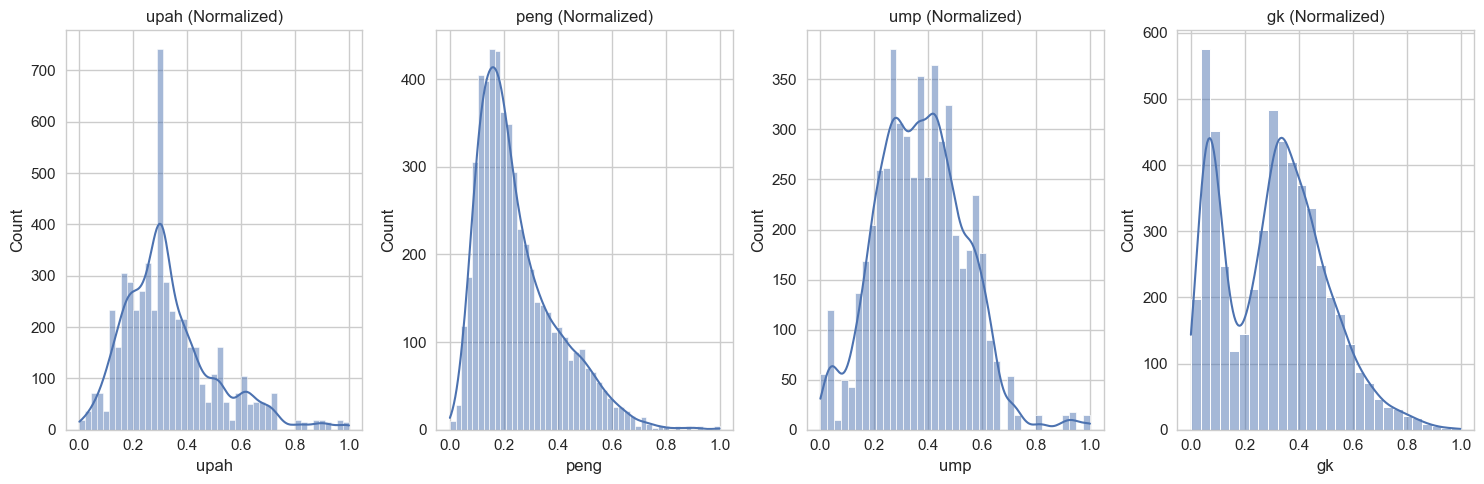

In [47]:
def normalize_features(df, method='standard'):
    """
    Normalisasi atau standarisasi fitur numerik untuk clustering
    """
    # Identifikasi kolom numerik yang perlu dinormalisasi
    # Kolom tahun tidak perlu dinormalisasi karena akan digunakan sebagai referensi
    exclude_cols = ['provinsi_original', 'tahun',]
    numeric_cols = [col for col in df.columns if col not in exclude_cols and 
                    df[col].dtype in ['int64', 'float64']]
    
    print(f"\nKolom yang akan dinormalisasi: {', '.join(numeric_cols)}")
    
    # Simpan data non-numerik
    non_numeric_cols = [col for col in df.columns if col not in numeric_cols]
    df_non_numeric = df[non_numeric_cols].copy() if non_numeric_cols else pd.DataFrame(index=df.index)
    
    # Ekstrak data numerik untuk normalisasi
    df_numeric = df[numeric_cols].copy()
    
    # Pilih metode normalisasi
    if method == 'standard':
        # Standarisasi (z-score normalization)
        scaler = StandardScaler()
        print("Menggunakan StandardScaler (z-score normalization)")
    elif method == 'minmax':
        # Min-Max Scaling
        scaler = MinMaxScaler()
        print("Menggunakan MinMaxScaler (nilai antara 0 dan 1)")
    elif method == 'robust':
        # Robust Scaling (tahan terhadap outlier)
        scaler = RobustScaler()
        print("Menggunakan RobustScaler (tahan terhadap outlier)")
    else:
        raise ValueError("Metode yang didukung: 'standard', 'minmax', 'robust'")
    
    # Terapkan normalisasi
    df_numeric_scaled = pd.DataFrame(
        scaler.fit_transform(df_numeric),
        columns=numeric_cols,
        index=df.index
    )
    
    # Gabungkan kembali dengan data non-numerik
    df_normalized = pd.concat([df_non_numeric, df_numeric_scaled], axis=1)
    
    # Visualisasikan hasil normalisasi untuk beberapa kolom
    sample_cols = numeric_cols[:min(4, len(numeric_cols))]
    
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(sample_cols):
        plt.subplot(1, len(sample_cols), i+1)
        sns.histplot(df_numeric_scaled[col], kde=True)
        plt.title(f'{col} (Normalized)')
        plt.tight_layout()
    plt.show()
    
    return df_normalized, scaler

# Standarisasi fitur numerik
df_normalized, scaler = normalize_features(df_encoded, method='minmax')

## Analisis Korelasi untuk Seleksi Fitur

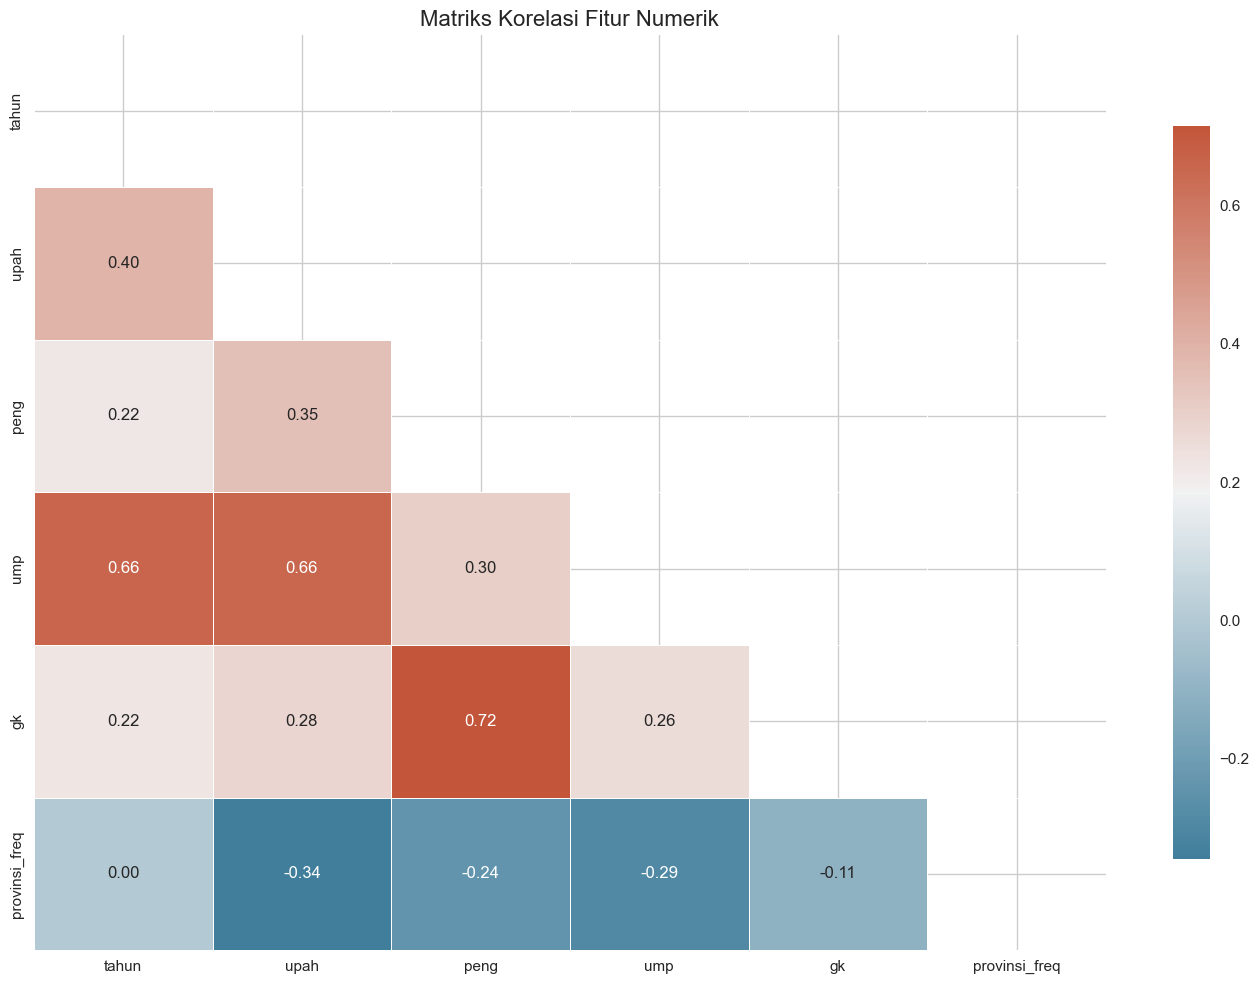


Pasangan fitur dengan korelasi tinggi (>0.8 atau <-0.8):
  - Tidak ditemukan pasangan fitur dengan korelasi tinggi


In [48]:
def analyze_feature_correlation(df):
    """
    Analisis korelasi antar fitur untuk mendeteksi multicollinearity
    """
    # Identifikasi kolom numerik
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Ambil subset kolom numerik untuk analisis korelasi
    correlation_data = df[numeric_cols].copy()
    
    # Hitung matriks korelasi
    correlation_matrix = correlation_data.corr()
    
    # Visualisasikan matriks korelasi
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask,
                linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Deteksi fitur yang sangat berkorelasi
    print("\nPasangan fitur dengan korelasi tinggi (>0.8 atau <-0.8):")
    high_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        for pair in high_corr_pairs:
            print(f"  - {pair[0]} dan {pair[1]}: {pair[2]:.3f}")
        print("\nPertimbangkan untuk menghapus salah satu dari setiap pasangan fitur yang berkorelasi tinggi")
    else:
        print("  - Tidak ditemukan pasangan fitur dengan korelasi tinggi")
    
    return correlation_matrix, high_corr_pairs

# Analisis korelasi antar fitur
correlation_matrix, high_corr_pairs = analyze_feature_correlation(df_normalized)

## Menyiapkan dataset final untuk clustering

In [49]:
def prepare_final_dataset(df, include_bins=False, include_target=False):
    """
    Menyiapkan dataset final untuk clustering
    """
    # Pilih kolom untuk clustering
    # Hilangkan kolom non-fitur seperti tahun dan provinsi asli
    exclude_cols = ['provinsi_original', 'tahun', 'provinsi_freq']
    
    # Filter kolom binning jika tidak diinginkan
    if not include_bins:
        exclude_cols.extend([col for col in df.columns if col.endswith('_bin')])
    
    # Siapkan kolom untuk clustering
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Jika dataset cukup besar, pertimbangkan untuk mengambil sampel
    if len(df) > 10000:
        print(f"\nDataset terlalu besar ({len(df)} baris), mengambil sampel 10000 baris")
        df_sampled = df.sample(10000, random_state=42)
    else:
        df_sampled = df.copy()
    
    # Dataset final untuk clustering
    df_for_clustering = df_sampled[feature_cols].copy()
    
    print("\nMenyiapkan dataset final untuk clustering:")
    print(f"   - Jumlah fitur: {len(feature_cols)}")
    print(f"   - Jumlah sampel: {len(df_for_clustering)}")
    print(f"   - Fitur yang digunakan: {', '.join(feature_cols[:5])}{'...' if len(feature_cols) > 5 else ''}")
    
    # Handle missing values jika ada
    if df_for_clustering.isnull().sum().sum() > 0:
        print("\nMemproses missing values...")
        # Impute missing values dengan mean untuk kolom numerik  
        numeric_cols = df_for_clustering.select_dtypes(include=['number']).columns
        for col in numeric_cols:
            if df_for_clustering[col].isnull().sum() > 0:
                mean_val = df_for_clustering[col].mean()
                df_for_clustering[col].fillna(mean_val, inplace=True)
                print(f"   - Imputasi missing values pada kolom '{col}'")
    
    # Pastikan tidak ada fitur dengan skala yang sangat berbeda
    print("\nMemastikan fitur memiliki skala yang sesuai...")
    numeric_cols = df_for_clustering.select_dtypes(include=['number']).columns
    scale_issues = []
    
    for col in numeric_cols:
        if df_for_clustering[col].std() > 100:  # Ambang batas arbitrer
            scale_issues.append((col, df_for_clustering[col].std()))
    
    if scale_issues:
        print("   - Warning: Beberapa fitur memiliki standar deviasi yang besar:")
        for col, std in scale_issues:
            print(f"    * {col}: std = {std:.2f}")
        print("   - Pertimbangkan untuk melakukan standardisasi tambahan")
    else:
        print("   - Semua fitur memiliki skala yang sesuai")
    
    return df_for_clustering, feature_cols

# Siapkan dataset final untuk clustering
df_final, feature_cols = prepare_final_dataset(df_normalized)

# Tampilkan informasi dataset final
print("\nDataset final siap untuk clustering!")
print(f"Dimensi dataset: {df_final.shape}")


Menyiapkan dataset final untuk clustering:
   - Jumlah fitur: 10
   - Jumlah sampel: 5361
   - Fitur yang digunakan: jenis_MAKANAN, jenis_NONMAKANAN, jenis_TOTAL, daerah_PERDESAAN, daerah_PERDESAANPERKOTAAN...

Memastikan fitur memiliki skala yang sesuai...
   - Semua fitur memiliki skala yang sesuai

Dataset final siap untuk clustering!
Dimensi dataset: (5361, 10)


In [50]:
print(df_final[:2])

   jenis_MAKANAN  jenis_NONMAKANAN  jenis_TOTAL  daerah_PERDESAAN  \
0           True             False        False             False   
1           True             False        False             False   

   daerah_PERDESAANPERKOTAAN  daerah_PERKOTAAN      upah      peng       ump  \
0                      False              True  0.111796  0.123579  0.280703   
1                      False              True  0.111796  0.123579  0.280703   

         gk  
0  0.297393  
1  0.307622  


In [51]:
# # hapus kolom selain upah, peng, ump, gk
# df_final = df_final[['upah', 'peng', 'ump', 'gk', 'daerah_PERDESAAN', 'jenis_MAKANAN']]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### KMeans Clustering

In [52]:
# Fungsi untuk menerapkan KMeans dengan berbagai jumlah cluster
def apply_kmeans(data, max_clusters=15):
    """
    Menerapkan algoritma KMeans dengan berbagai jumlah cluster
    dan mengembalikan model dengan jumlah cluster optimal
    """
    print("\n=== MEMBANGUN MODEL KMEANS CLUSTERING ===")
    
    # Visualisasi metode Elbow untuk menentukan jumlah cluster optimal
    plt.figure(figsize=(12, 6))
    visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, max_clusters), timings=False)
    visualizer.fit(data)
    optimal_k = visualizer.elbow_value_
    
    if optimal_k is None:
        print("   - Tidak dapat menentukan jumlah cluster optimal secara otomatis, menggunakan default k=3")
        optimal_k = 3
    
    # Latih model KMeans dengan jumlah cluster optimal
    print(f"\n   - Melatih model KMeans dengan {optimal_k} cluster...")
    model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    model_kmeans.fit(data)
    
    # Evaluasi model dengan Silhouette Score
    silhouette_avg = silhouette_score(data, model_kmeans.labels_)
    print(f"   - Silhouette Score: {silhouette_avg:.4f}")
    
    return model_kmeans, optimal_k


=== MEMBANGUN MODEL KMEANS CLUSTERING ===

   - Melatih model KMeans dengan 9 cluster...
   - Silhouette Score: 0.7750


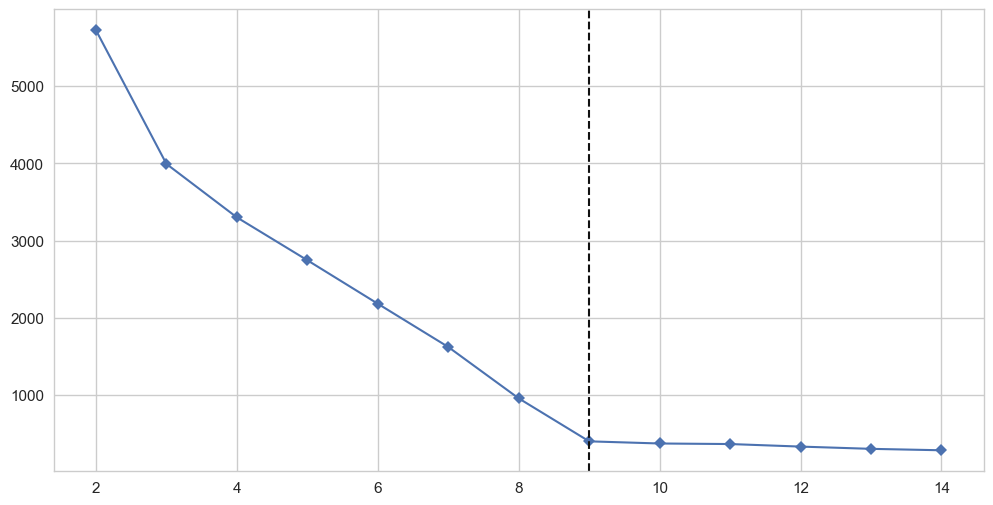

In [53]:
model_kmeans, k_kmeans = apply_kmeans(df_final)

### Hierachical Clustering

In [54]:
# Fungsi untuk menerapkan Hierarchical Clustering
def apply_hierarchical(data, max_clusters=10):
    """
    Menerapkan algoritma Hierarchical Clustering
    """
    print("\n=== MEMBANGUN MODEL HIERARCHICAL CLUSTERING ===")
    
    # Tentukan jumlah cluster optimal dengan silhouette score
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        # Latih model hierarchical clustering
        model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = model.fit_predict(data)
        
        # Hitung silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"   - {n_clusters} clusters: Silhouette Score = {silhouette_avg:.4f}")
    
    # Tentukan jumlah cluster optimal
    optimal_k = np.argmax(silhouette_scores) + 2  # +2 karena dimulai dari 2 cluster
    print(f"\n   - Jumlah cluster optimal untuk Hierarchical: {optimal_k}")
    
    # Latih model final
    model_hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
    model_hierarchical.fit(data)
    
    return model_hierarchical, optimal_k

In [55]:
model_hierarchical, k_hierarchical = apply_hierarchical(df_final)


=== MEMBANGUN MODEL HIERARCHICAL CLUSTERING ===
   - 2 clusters: Silhouette Score = 0.2919
   - 3 clusters: Silhouette Score = 0.4149
   - 4 clusters: Silhouette Score = 0.4162
   - 5 clusters: Silhouette Score = 0.4614
   - 6 clusters: Silhouette Score = 0.5330
   - 7 clusters: Silhouette Score = 0.6116
   - 8 clusters: Silhouette Score = 0.6937
   - 9 clusters: Silhouette Score = 0.7750
   - 10 clusters: Silhouette Score = 0.7262

   - Jumlah cluster optimal untuk Hierarchical: 9


### DBSCAN Clustering

In [56]:
# Fungsi untuk menerapkan DBSCAN clustering
def apply_dbscan(data, eps_range=np.arange(0.1, 3, 0.1), min_samples_range=range(3, 21, 3)):
    """
    Menerapkan algoritma DBSCAN dengan berbagai parameter
    """
    print("\n=== MEMBANGUN MODEL DBSCAN CLUSTERING ===")
    
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    best_model = None
    
    # Coba berbagai kombinasi parameter
    for eps in eps_range:
        for min_samples in min_samples_range:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(data)
            
            # Hitung silhouette score hanya jika ada lebih dari 1 cluster
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                try:
                    score = silhouette_score(data, labels)
                    print(f"   - eps={eps:.2f}, min_samples={min_samples}: {n_clusters} clusters, Silhouette={score:.4f}")
                    
                    if score > best_silhouette:
                        best_silhouette = score
                        best_eps = eps
                        best_min_samples = min_samples
                        best_model = model
                except:
                    continue
    
    if best_model is None:
        print("   - DBSCAN tidak berhasil menemukan cluster yang valid, coba parameter lain")
        return None, 0
    else:
        print(f"\n   - Parameter DBSCAN terbaik: eps={best_eps:.2f}, min_samples={best_min_samples}")
        print(f"   - Silhouette Score: {best_silhouette:.4f}")
        return best_model, len(set(best_model.labels_)) - (1 if -1 in best_model.labels_ else 0)

In [57]:
model_dbscan, k_dbscan = apply_dbscan(df_final)


=== MEMBANGUN MODEL DBSCAN CLUSTERING ===
   - eps=0.10, min_samples=3: 33 clusters, Silhouette=0.3669
   - eps=0.10, min_samples=6: 15 clusters, Silhouette=0.5448
   - eps=0.10, min_samples=9: 12 clusters, Silhouette=0.5831
   - eps=0.10, min_samples=12: 13 clusters, Silhouette=0.5031
   - eps=0.10, min_samples=15: 10 clusters, Silhouette=0.5798
   - eps=0.10, min_samples=18: 11 clusters, Silhouette=0.4982
   - eps=0.20, min_samples=3: 9 clusters, Silhouette=0.7674
   - eps=0.20, min_samples=6: 9 clusters, Silhouette=0.7670
   - eps=0.20, min_samples=9: 9 clusters, Silhouette=0.7661
   - eps=0.20, min_samples=12: 9 clusters, Silhouette=0.7649
   - eps=0.20, min_samples=15: 9 clusters, Silhouette=0.7632
   - eps=0.20, min_samples=18: 9 clusters, Silhouette=0.7620
   - eps=0.30, min_samples=3: 9 clusters, Silhouette=0.7690
   - eps=0.30, min_samples=6: 9 clusters, Silhouette=0.7689
   - eps=0.30, min_samples=9: 9 clusters, Silhouette=0.7684
   - eps=0.30, min_samples=12: 9 clusters, Si

In [58]:
# Bandingkan hasil ketiga model
print("\n=== PERBANDINGAN MODEL CLUSTERING ===")
print(f"1. KMeans: {k_kmeans} cluster dengan Silhouette Score {silhouette_score(df_final, model_kmeans.labels_):.4f}")

if model_hierarchical is not None:
    hier_labels = model_hierarchical.labels_
    print(f"2. Hierarchical: {k_hierarchical} cluster dengan Silhouette Score {silhouette_score(df_final, hier_labels):.4f}")

if model_dbscan is not None and k_dbscan > 1:
    dbscan_labels = model_dbscan.labels_
    print(f"3. DBSCAN: {k_dbscan} cluster dengan Silhouette Score {silhouette_score(df_final, dbscan_labels):.4f}")

# Pilih model terbaik berdasarkan Silhouette Score
scores = []
if model_kmeans is not None:
    scores.append(("KMeans", silhouette_score(df_final, model_kmeans.labels_)))
if model_hierarchical is not None:
    scores.append(("Hierarchical", silhouette_score(df_final, model_hierarchical.labels_)))
if model_dbscan is not None and k_dbscan > 1:
    scores.append(("DBSCAN", silhouette_score(df_final, model_dbscan.labels_)))

if scores:
    best_model_name = max(scores, key=lambda x: x[1])[0]
    print(f"\nModel terbaik berdasarkan Silhouette Score: {best_model_name}")
    
    if best_model_name == "KMeans":
        final_model = model_kmeans
        final_labels = model_kmeans.labels_
    elif best_model_name == "Hierarchical":
        final_model = model_hierarchical
        final_labels = model_hierarchical.labels_
    else:
        final_model = model_dbscan
        final_labels = model_dbscan.labels_
else:
    print("Tidak ada model yang berhasil membentuk cluster valid")


=== PERBANDINGAN MODEL CLUSTERING ===
1. KMeans: 9 cluster dengan Silhouette Score 0.7750
2. Hierarchical: 9 cluster dengan Silhouette Score 0.7750
3. DBSCAN: 9 cluster dengan Silhouette Score 0.7750

Model terbaik berdasarkan Silhouette Score: KMeans


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

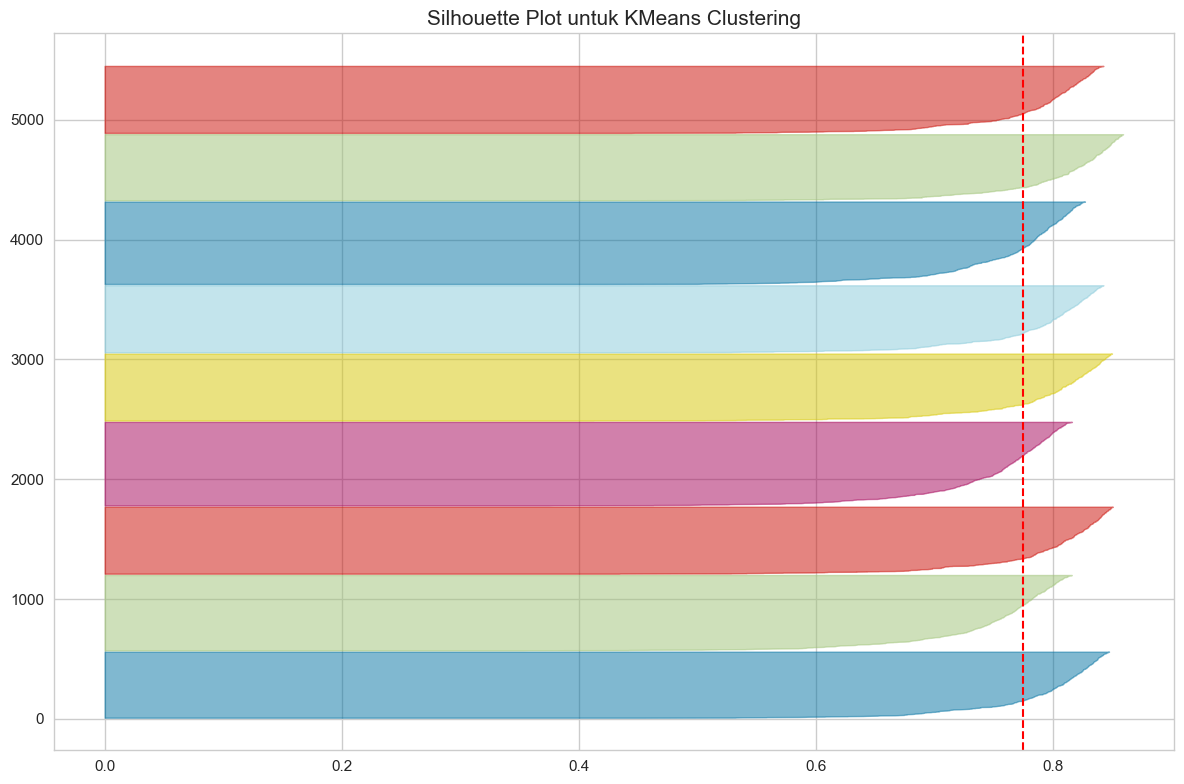

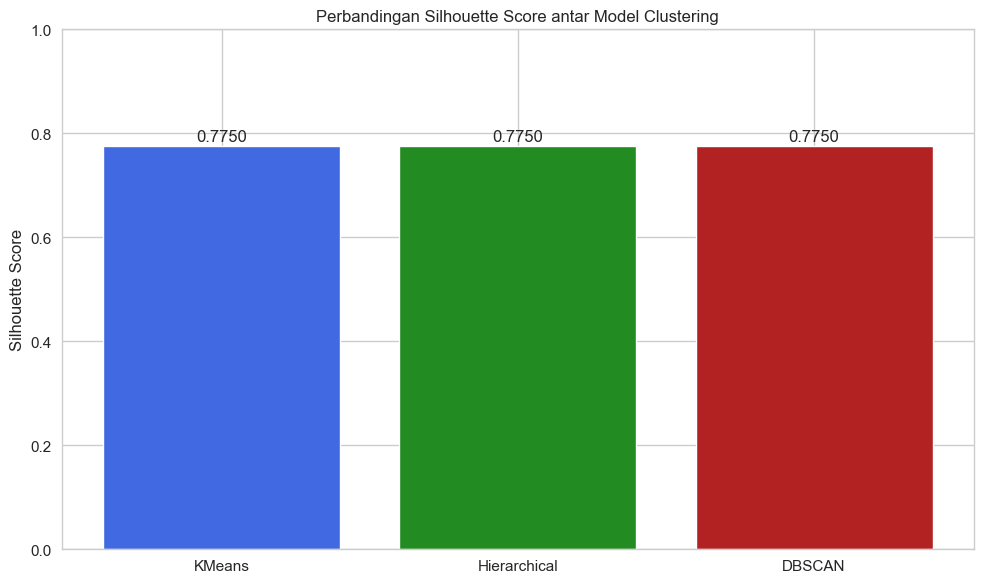

In [59]:
# Evaluasi model clustering dengan visualisasi silhouette
def visualize_silhouette(data, model, name):
    """
    Visualisasi Silhouette untuk model clustering
    """
    plt.figure(figsize=(12, 8))
    
    if name == "KMeans":
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    elif name == "Hierarchical":
        # Untuk hierarchical kita perlu membuat objek baru karena tidak memiliki predict method
        visualizer = SilhouetteVisualizer(
            KMeans(n_clusters=len(np.unique(model.labels_)), random_state=42).fit(data), 
            colors='yellowbrick'
        )
    elif name == "DBSCAN":
        # Untuk DBSCAN kita perlu menangani outliers (-1)
        unique_labels = np.unique(model.labels_)
        if -1 in unique_labels:
            n_clusters = len(unique_labels) - 1
        else:
            n_clusters = len(unique_labels)
            
        visualizer = SilhouetteVisualizer(
            KMeans(n_clusters=max(n_clusters, 2), random_state=42).fit(data), 
            colors='yellowbrick'
        )
    
    visualizer.fit(data)
    plt.title(f'Silhouette Plot untuk {name} Clustering', size=15)
    plt.tight_layout()
    plt.show()

# Visualisasi silhouette untuk model terbaik
if 'final_model' in locals():
    visualize_silhouette(df_final, final_model, best_model_name)

# Visualisasi perbandingan Silhouette Score
if scores:
    plt.figure(figsize=(10, 6))
    models, sil_scores = zip(*scores)
    plt.bar(models, sil_scores, color=['royalblue', 'forestgreen', 'firebrick'])
    plt.ylabel('Silhouette Score')
    plt.title('Perbandingan Silhouette Score antar Model Clustering')
    plt.ylim(0, 1)
    for i, v in enumerate(sil_scores):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.tight_layout()
    plt.show()

In [60]:
# Perhitungan detail metrik evaluasi untuk model terbaik
print(f"\n=== DETAIL EVALUASI MODEL {best_model_name.upper()} ===")

# Evaluasi umum untuk semua model
print(f"Jumlah cluster: {len(np.unique(final_labels))}")
if -1 in final_labels:  # Jika ada outliers (untuk DBSCAN)
    print(f"Jumlah data outlier (noise): {np.sum(final_labels == -1)}")
    print(f"Persentase outlier: {np.sum(final_labels == -1) / len(final_labels) * 100:.2f}%")

# Hitung distribusi ukuran cluster
unique_labels = np.unique(final_labels)
if -1 in unique_labels:
    unique_labels = unique_labels[unique_labels != -1]  # Exclude outliers from size calculation

print("\nDistribusi ukuran cluster:")
for label in unique_labels:
    cluster_size = np.sum(final_labels == label)
    print(f"   - Cluster {label}: {cluster_size} data ({cluster_size / len(final_labels) * 100:.2f}%)")

# Evaluasi spesifik untuk setiap model
if best_model_name == "KMeans":
    print(f"\nInertia: {final_model.inertia_:.4f}")
    
    # Hitung jarak antar cluster
    cluster_centers = final_model.cluster_centers_
    print("\nJarak antar Cluster Centers:")
    for i in range(len(cluster_centers)):
        for j in range(i+1, len(cluster_centers)):
            dist = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
            print(f"   - Cluster {i} dan Cluster {j}: {dist:.4f}")
    
    # Hitung kompaktness setiap cluster (rata-rata jarak ke centroid)
    print("\nKompaktness cluster (rata-rata jarak ke centroid):")
    for i in range(len(cluster_centers)):
        # Get points in this cluster
        cluster_mask = final_labels == i
        if np.sum(cluster_mask) > 0:
            # Convert to numpy array explicitly
            points = df_final.loc[cluster_mask].values
            
            # Calculate distances using sklearn for reliability
            center = cluster_centers[i].reshape(1, -1)
            distances = euclidean_distances(points, center).flatten()
            
            print(f"   - Cluster {i}: {np.mean(distances):.4f}")

elif best_model_name == "Hierarchical":
    # Untuk Hierarchical, kita bisa menghitung intra-cluster distance
    print("\nIntra-cluster distances:")
    for label in unique_labels:
        cluster_points = df_final[final_labels == label].values
        if len(cluster_points) > 1:
            # Hitung centroid cluster
            centroid = np.mean(cluster_points, axis=0)
            # Hitung rata-rata jarak ke centroid
            distances = np.linalg.norm(cluster_points - centroid, axis=1)
            print(f"   - Cluster {label}: {np.mean(distances):.4f}")
    
    # Hitung inter-cluster distances (jarak antar centroid)
    print("\nInter-cluster distances:")
    centroids = []
    for label in unique_labels:
        cluster_points = df_final[final_labels == label].values
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            print(f"   - Cluster {unique_labels[i]} dan Cluster {unique_labels[j]}: {dist:.4f}")

elif best_model_name == "DBSCAN":
    # Untuk DBSCAN, kita fokus pada parameter model dan karakteristik cluster
    print(f"\nParameter model:")
    print(f"   - Epsilon (eps): {final_model.eps}")
    print(f"   - Min samples: {final_model.min_samples}")
    
    # Hitung densitas cluster
    print("\nDensitas cluster:")
    for label in unique_labels:
        if label != -1:  # Abaikan outliers
            cluster_points = df_final[final_labels == label].values
            # Hitung centroid
            centroid = np.mean(cluster_points, axis=0)
            # Hitung jarak ke centroid
            centroid_reshaped = centroid.reshape(1, -1)  # Make centroid 2D
            distances = euclidean_distances(cluster_points, centroid_reshaped).flatten()

            print(f"   - Cluster {label}: {len(cluster_points)} points, avg distance to center: {np.mean(distances):.4f}")
    
    # Hitung jarak antar cluster core points
    if len(unique_labels) > 1 and -1 not in unique_labels:
        core_samples_mask = np.zeros_like(final_model.labels_, dtype=bool)
        core_samples_mask[final_model.core_sample_indices_] = True
        
        print("\nJarak antar cluster core points:")
        for label in unique_labels:
            if label != -1:
                core_points = df_final.values[core_samples_mask & (final_labels == label)]
                if len(core_points) > 0:
                    core_centroid = np.mean(core_points, axis=0)
                    for other_label in unique_labels:
                        if other_label != -1 and other_label > label:
                            other_core_points = df_final.values[core_samples_mask & (final_labels == other_label)]
                            if len(other_core_points) > 0:
                                other_core_centroid = np.mean(other_core_points, axis=0)
                                dist = np.linalg.norm(core_centroid - other_core_centroid)
                                print(f"   - Cluster {label} dan Cluster {other_label}: {dist:.4f}")


=== DETAIL EVALUASI MODEL KMEANS ===
Jumlah cluster: 9

Distribusi ukuran cluster:
   - Cluster 0: 552 data (10.30%)
   - Cluster 1: 630 data (11.75%)
   - Cluster 2: 560 data (10.45%)
   - Cluster 3: 698 data (13.02%)
   - Cluster 4: 560 data (10.45%)
   - Cluster 5: 560 data (10.45%)
   - Cluster 6: 689 data (12.85%)
   - Cluster 7: 552 data (10.30%)
   - Cluster 8: 560 data (10.45%)

Inertia: 399.6683

Jarak antar Cluster Centers:
   - Cluster 0 dan Cluster 1: 2.0198
   - Cluster 0 dan Cluster 2: 2.0174
   - Cluster 0 dan Cluster 3: 2.0319
   - Cluster 0 dan Cluster 4: 2.0176
   - Cluster 0 dan Cluster 5: 1.4144
   - Cluster 0 dan Cluster 6: 1.4248
   - Cluster 0 dan Cluster 7: 1.4424
   - Cluster 0 dan Cluster 8: 1.4150
   - Cluster 1 dan Cluster 2: 2.0401
   - Cluster 1 dan Cluster 3: 1.4166
   - Cluster 1 dan Cluster 4: 1.4843
   - Cluster 1 dan Cluster 5: 1.4379
   - Cluster 1 dan Cluster 6: 1.4191
   - Cluster 1 dan Cluster 7: 2.0621
   - Cluster 1 dan Cluster 8: 2.0142
   - C

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### Membandingkan Feature Importance dengan RandomForest dan Permutation


=== FEATURE SELECTION UNTUK OPTIMASI MODEL ===

1. Feature Importance dengan RandomForest:


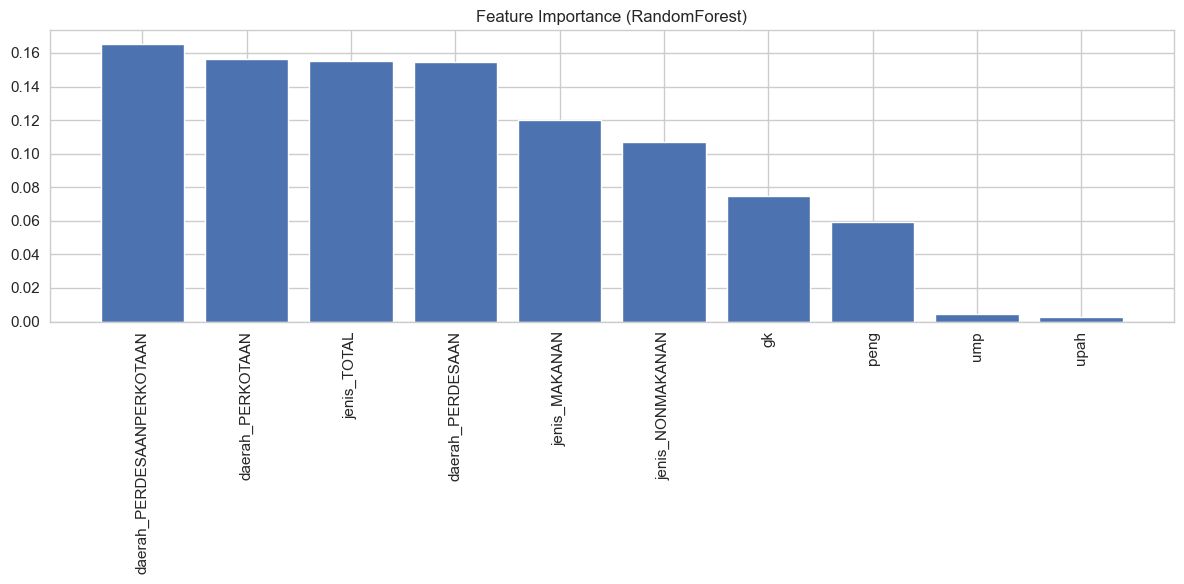

   Top 10 fitur berdasarkan RandomForest: daerah_PERDESAANPERKOTAAN, daerah_PERKOTAAN, jenis_TOTAL, daerah_PERDESAAN, jenis_MAKANAN, jenis_NONMAKANAN, gk, peng, ump, upah

2. Permutation Importance:


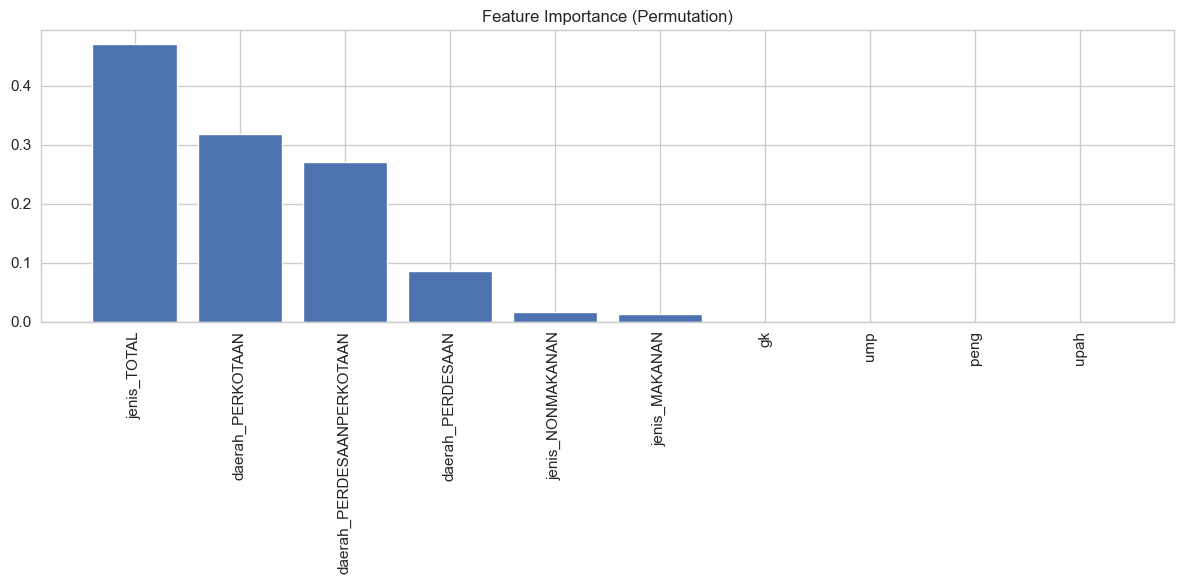

   Top 10 fitur berdasarkan Permutation Importance: jenis_TOTAL, daerah_PERKOTAAN, daerah_PERDESAANPERKOTAAN, daerah_PERDESAAN, jenis_NONMAKANAN, jenis_MAKANAN, gk, ump, peng, upah

Fitur final yang dipilih (10): daerah_PERDESAANPERKOTAAN, daerah_PERKOTAAN, gk, ump, peng, jenis_NONMAKANAN, jenis_TOTAL, daerah_PERDESAAN, upah, jenis_MAKANAN

=== MELATIH ULANG MODEL DENGAN FITUR TERPILIH ===

Perbandingan performa:
   - Silhouette Score (semua fitur): 0.7750
   - Silhouette Score (fitur terpilih): 0.7750

Model dengan semua fitur tetap memiliki performa lebih baik.


In [61]:
#Type your code herefrom sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

def perform_feature_selection(data, labels, n_features=5):
    """
    Melakukan feature selection dengan beberapa metode dan membandingkan hasilnya
    """
    print("\n=== FEATURE SELECTION UNTUK OPTIMASI MODEL ===")
    features = data.columns.tolist()
    
    # Metode 1: Feature Importance dengan RandomForest
    print("\n1. Feature Importance dengan RandomForest:")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(data, labels)
    
    # Ambil feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importance (RandomForest)')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Top features berdasarkan RandomForest
    top_rf_features = [features[i] for i in indices[:n_features]]
    print(f"   Top {n_features} fitur berdasarkan RandomForest: {', '.join(top_rf_features)}")
    
    # Metode 2: Permutation Importance
    print("\n2. Permutation Importance:")
    result = permutation_importance(rf, data, labels, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importance (Permutation)')
    plt.bar(range(len(result.importances_mean)), result.importances_mean[sorted_idx], align='center')
    plt.xticks(range(len(result.importances_mean)), [features[i] for i in sorted_idx], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Top features berdasarkan Permutation Importance
    top_perm_features = [features[i] for i in sorted_idx[:n_features]]
    print(f"   Top {n_features} fitur berdasarkan Permutation Importance: {', '.join(top_perm_features)}")
    
    # Menentukan fitur final berdasarkan gabungan metode
    final_features = list(set(top_rf_features + top_perm_features))
    print(f"\nFitur final yang dipilih ({len(final_features)}): {', '.join(final_features)}")
    
    return final_features

# Lakukan feature selection jika dataset memiliki banyak fitur
if df_final.shape[1] > 5:  # Jika ada lebih dari 5 fitur
    selected_features = perform_feature_selection(df_final, final_labels, n_features=10)
    
    # Buat dataset baru dengan fitur terpilih
    df_selected = df_final[selected_features].copy()
    
    # Latih ulang model dengan fitur terpilih
    print("\n=== MELATIH ULANG MODEL DENGAN FITUR TERPILIH ===")
    if best_model_name == "KMeans":
        model_selected = KMeans(n_clusters=k_kmeans, random_state=42, n_init=10)
        model_selected.fit(df_selected)
        selected_labels = model_selected.labels_
        
    elif best_model_name == "Hierarchical":
        model_selected = AgglomerativeClustering(n_clusters=k_hierarchical)
        model_selected.fit(df_selected)
        selected_labels = model_selected.labels_
        
    elif best_model_name == "DBSCAN":
        model_selected = DBSCAN(eps=model_dbscan.eps, min_samples=model_dbscan.min_samples)
        model_selected.fit(df_selected)
        selected_labels = model_selected.labels_
    
    # Evaluasi model dengan fitur terpilih
    try:
        silhouette_original = silhouette_score(df_final, final_labels)
        silhouette_selected = silhouette_score(df_selected, selected_labels)
        
        print(f"\nPerbandingan performa:")
        print(f"   - Silhouette Score (semua fitur): {silhouette_original:.4f}")
        print(f"   - Silhouette Score (fitur terpilih): {silhouette_selected:.4f}")
        
        # Update model final jika performa lebih baik
        if silhouette_selected > silhouette_original:
            print("\nModel dengan fitur terpilih memiliki performa lebih baik!")
            final_model = model_selected
            final_labels = selected_labels
            df_final = df_selected
        else:
            print("\nModel dengan semua fitur tetap memiliki performa lebih baik.")
    except:
        print("Tidak bisa mengevaluasi model dengan fitur terpilih.")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

### Visualisasi dengan PCA


=== VISUALISASI HASIL CLUSTERING DENGAN PCA ===


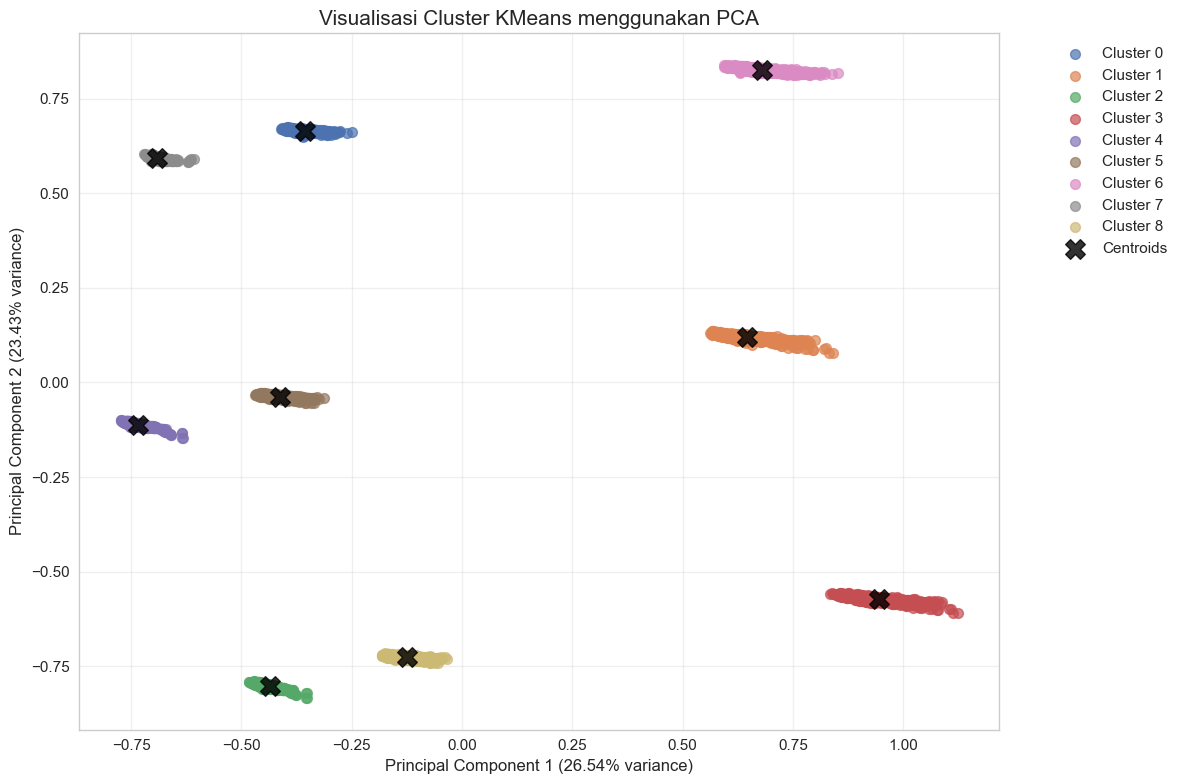

Komponen PCA menjelaskan 49.98% dari total variance


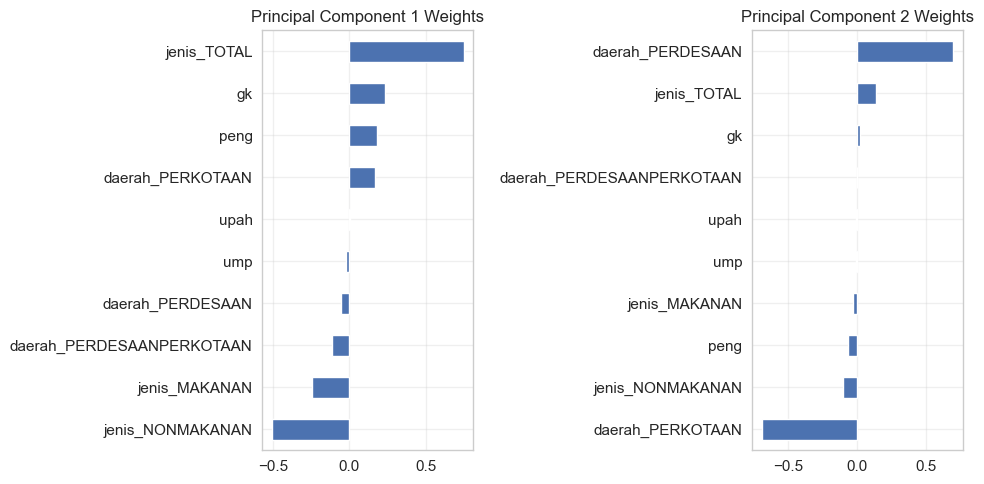

In [62]:
# Visualisasi hasil clustering dengan PCA
def visualize_clusters_pca(data, labels, model_name):
    """
    Visualisasi hasil clustering menggunakan PCA untuk 2D plot
    """
    print("\n=== VISUALISASI HASIL CLUSTERING DENGAN PCA ===")
    
    # Terapkan PCA untuk mengurangi dimensi ke 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    # Plot hasil
    plt.figure(figsize=(12, 8))
    
    # Jika DBSCAN, tangani outliers (-1)
    if model_name == "DBSCAN" and -1 in np.unique(labels):
        # Plot points yang terdeteksi sebagai outliers
        outliers = pca_result[labels == -1]
        plt.scatter(outliers[:, 0], outliers[:, 1], s=50, c='black', marker='x', alpha=0.5, label='Outliers')
        
        # Plot points untuk setiap cluster
        for i in range(max(labels) + 1):
            cluster_points = pca_result[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, alpha=0.7, label=f'Cluster {i}')
    else:
        # Untuk KMeans dan Hierarchical
        for i in range(max(labels) + 1):
            cluster_points = pca_result[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, alpha=0.7, label=f'Cluster {i}')
        
        # Plot cluster centers untuk KMeans
        if model_name == "KMeans" and hasattr(final_model, 'cluster_centers_'):
            centers_pca = pca.transform(final_model.cluster_centers_)
            plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='black', marker='X', alpha=0.8, label='Centroids')
    
    # Tambahkan informasi komponen PCA
    variance_ratio = pca.explained_variance_ratio_
    plt.xlabel(f'Principal Component 1 ({variance_ratio[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({variance_ratio[1]:.2%} variance)')
    
    plt.title(f'Visualisasi Cluster {model_name} menggunakan PCA', size=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()
    
    # Print komponen PCA
    print(f"Komponen PCA menjelaskan {sum(variance_ratio):.2%} dari total variance")
    
    # Tampilkan kontribusi fitur terhadap komponen PCA
    if data.shape[1] > 2:  # Jika jumlah fitur > 2
        plt.figure(figsize=(14, 6))
        
        # Component 1
        plt.subplot(1, 2, 1)
        weights = pd.Series(pca.components_[0], index=data.columns)
        weights.sort_values().plot.barh(figsize=(10, 5))
        plt.title('Principal Component 1 Weights')
        plt.grid(alpha=0.3)
        
        # Component 2
        plt.subplot(1, 2, 2)
        weights = pd.Series(pca.components_[1], index=data.columns)
        weights.sort_values().plot.barh(figsize=(10, 5))
        plt.title('Principal Component 2 Weights')
        plt.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()

visualize_clusters_pca(df_final, final_labels, best_model_name)

### Visualisasi Distribusi Fitur


=== DISTRIBUSI FITUR PADA SETIAP CLUSTER ===


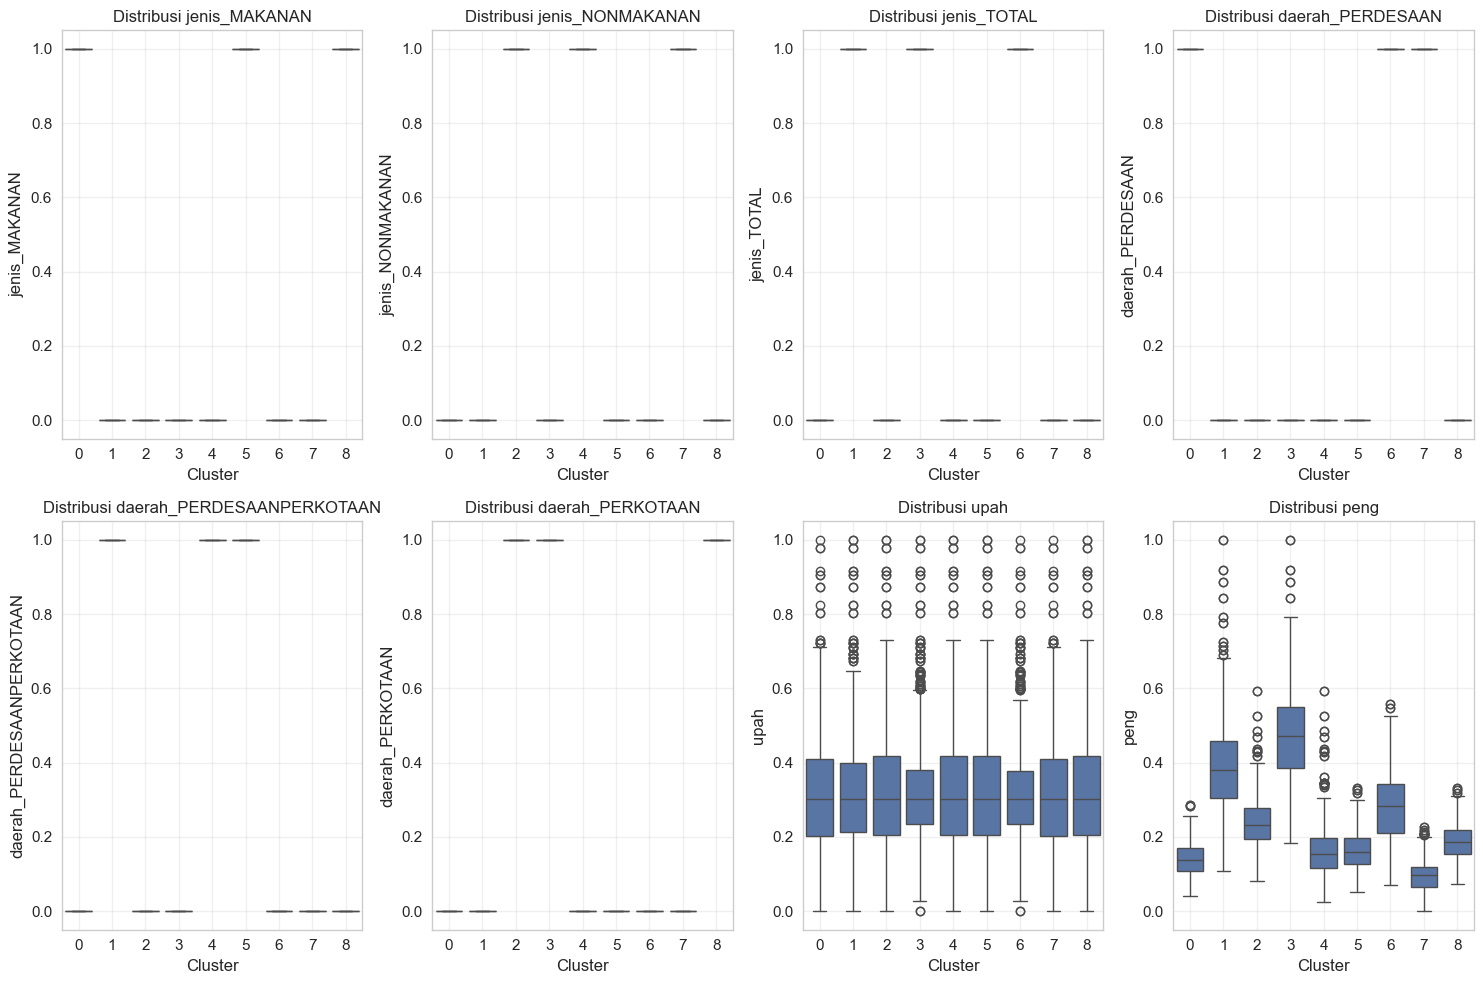

<Figure size 1200x1000 with 0 Axes>

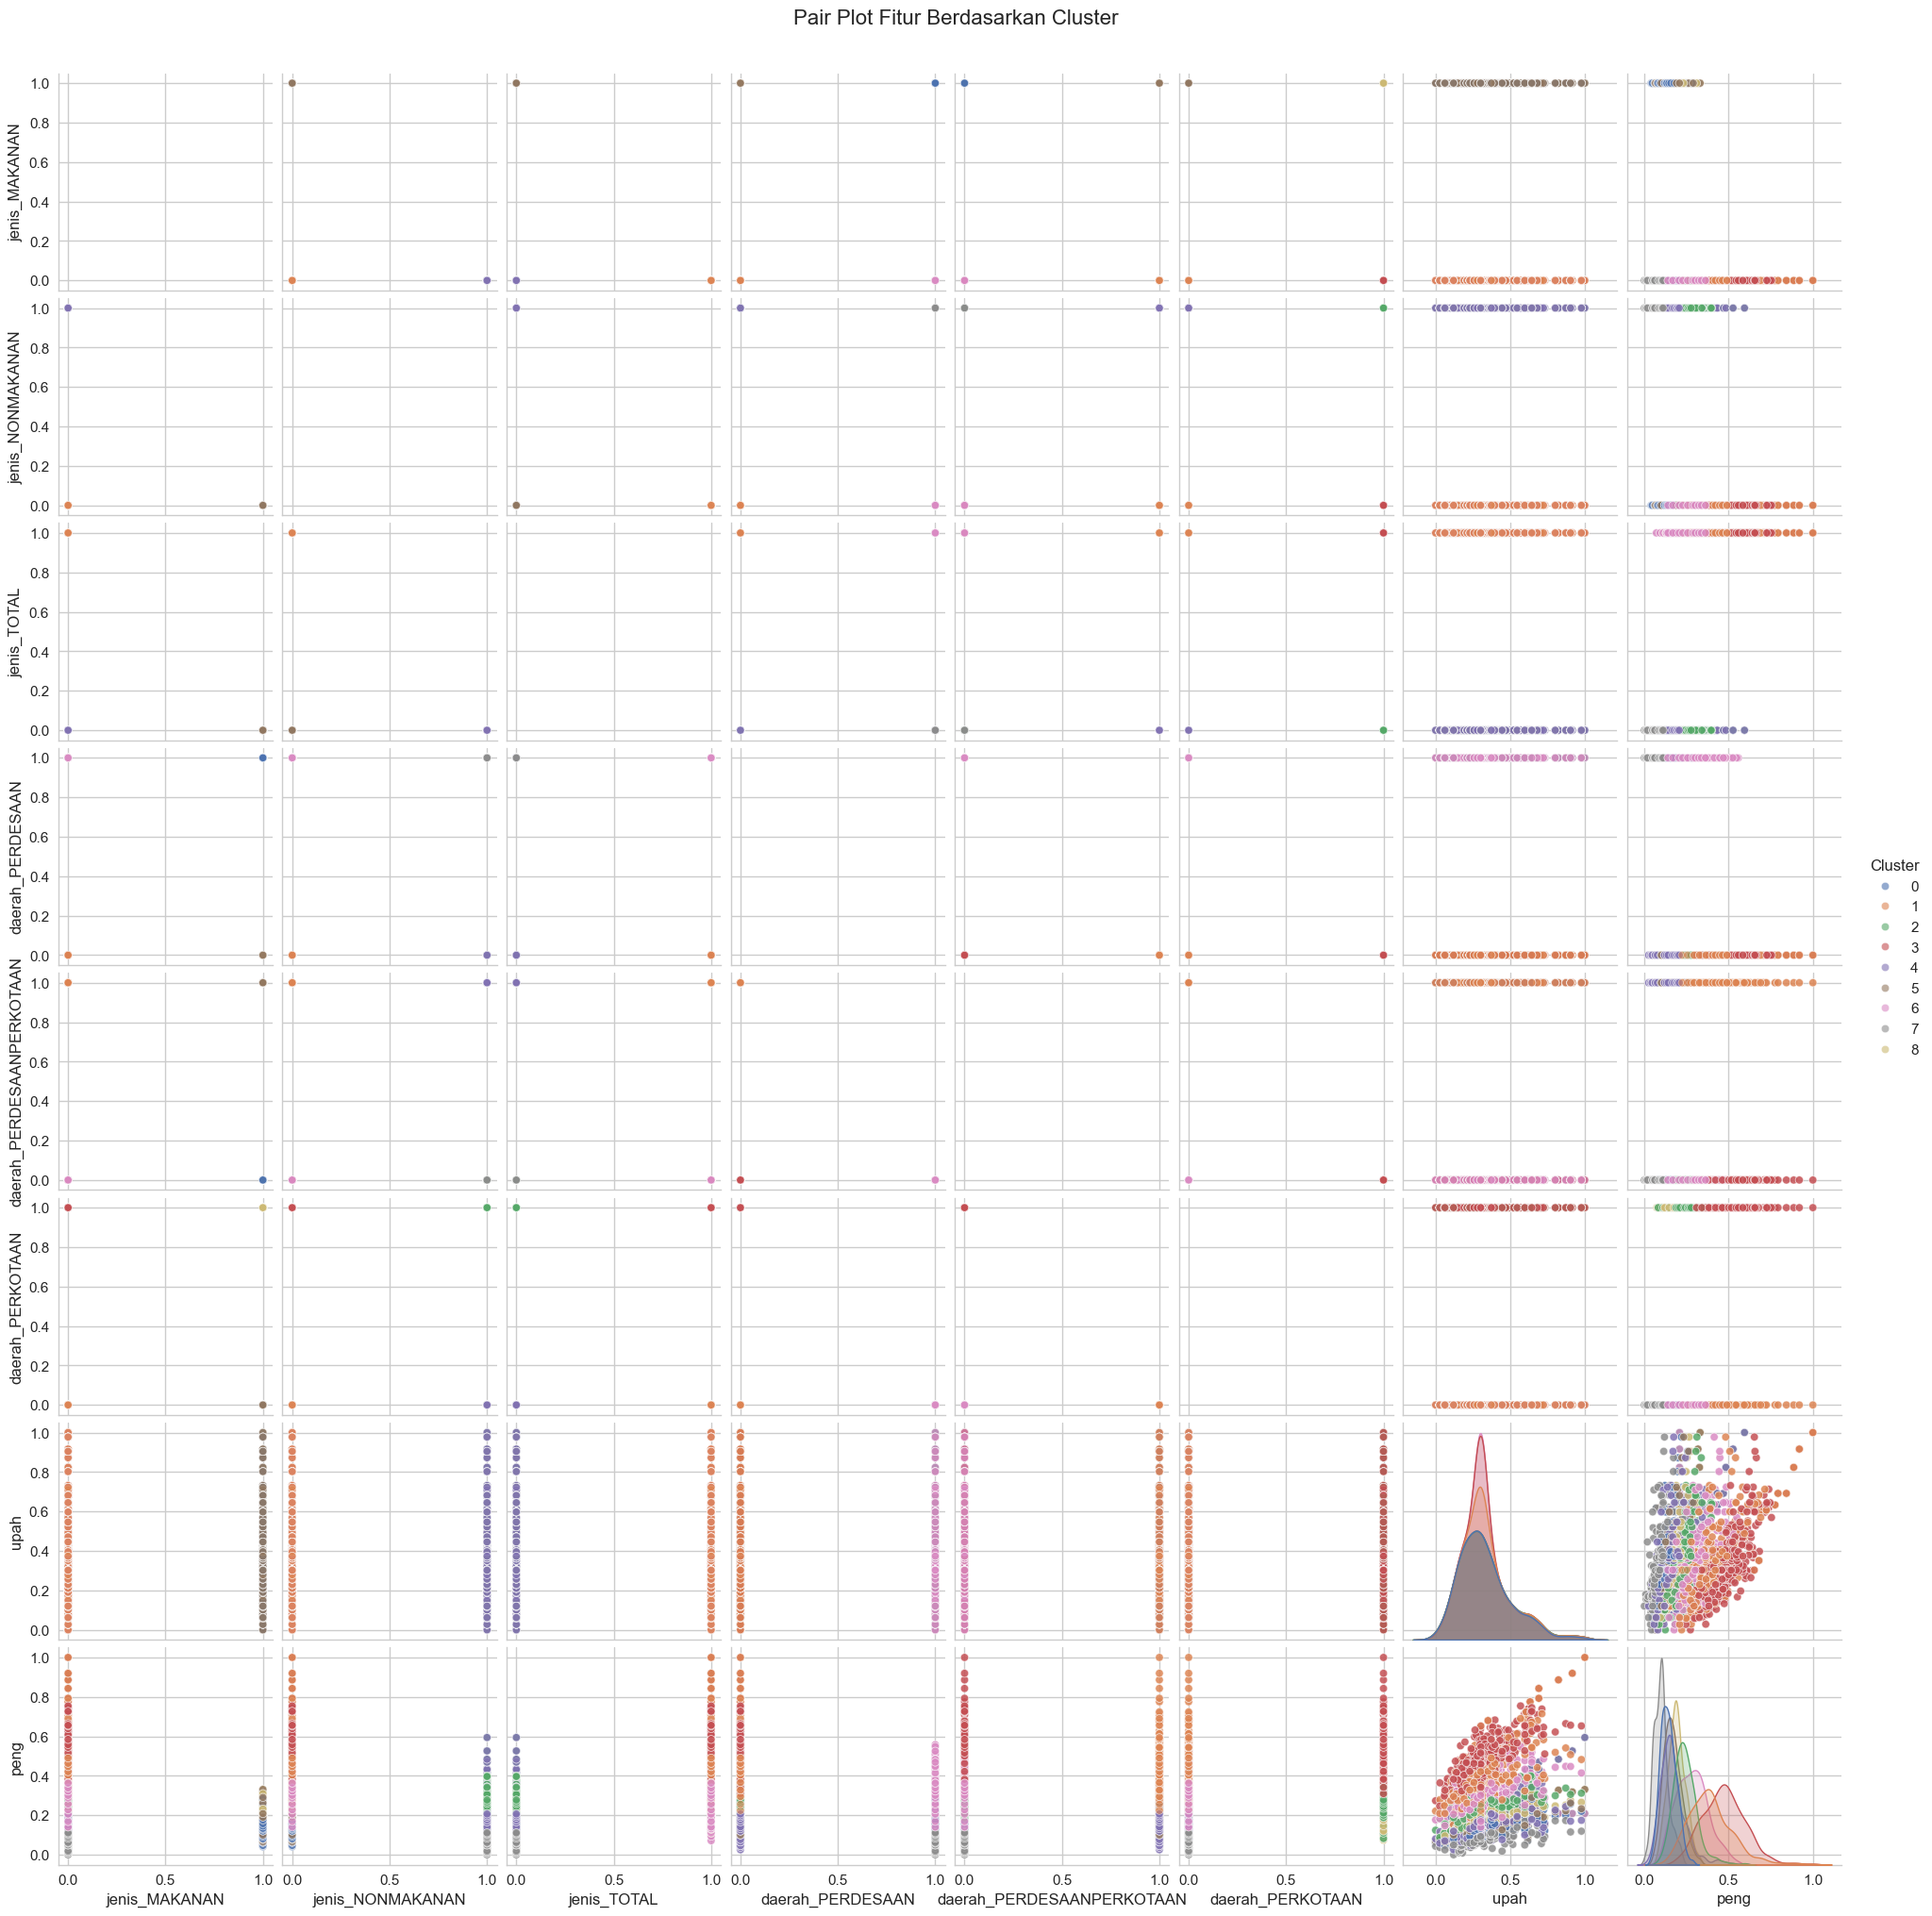

In [63]:
# Visualisasi distribusi fitur di setiap cluster
def visualize_cluster_distributions(data, labels):
    """
    Visualisasi distribusi fitur untuk setiap cluster
    """
    print("\n=== DISTRIBUSI FITUR PADA SETIAP CLUSTER ===")
    
    # Tambahkan label cluster ke data
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = labels
    
    # Pilih jumlah fitur untuk divisualisasikan (maksimal 8)
    num_features = min(8, data.shape[1])
    selected_features = data.columns[:num_features]
    
    # Buat boxplot untuk setiap fitur berdasarkan cluster
    plt.figure(figsize=(15, 10))
    
    for i, feature in enumerate(selected_features):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x='Cluster', y=feature, data=data_with_clusters)
        plt.title(f'Distribusi {feature}')
        plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tampilkan pair plot untuk beberapa fitur teratas (maksimal 8)
    top_features = selected_features[:min(8, len(selected_features))]
    plot_data = data_with_clusters[list(top_features) + ['Cluster']].copy()
    plot_data['Cluster'] = plot_data['Cluster'].astype('category')
    
    plt.figure(figsize=(12, 10))
    sns.pairplot(plot_data, hue='Cluster', diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pair Plot Fitur Berdasarkan Cluster', y=1.02, size=16)
    plt.show()

visualize_cluster_distributions(df_final, final_labels)

## **e. Analisis dan Interpretasi Hasil Cluster**

### Rata-rata Upah dan Pengeluaran per Cluster

In [64]:
df_result = df_clean.copy()  # Copy dari dataset yang tidak ada data duplikat tetapi belum dilakukan encoding
df_result['cluster'] = final_labels  # Tambahkan kolom cluster
df_result['cluster'] = df_result['cluster'].astype(str) # Ubah tipe data cluster menjadi string

In [65]:
cluster_summary = df_result.groupby('cluster')[['upah', 'peng']].mean()
cluster_summary

upah          peng
cluster                            
0        16488.235507  5.088923e+05
1        16534.787302  1.098513e+06
2        16621.010714  7.399502e+05
3        16467.587393  1.286430e+06
4        16621.010714  5.749824e+05
5        16621.010714  5.652658e+05
6        16360.335269  8.432133e+05
7        16488.235507  4.074711e+05
8        16621.010714  6.213313e+05

### Distribusi Upah per Cluster

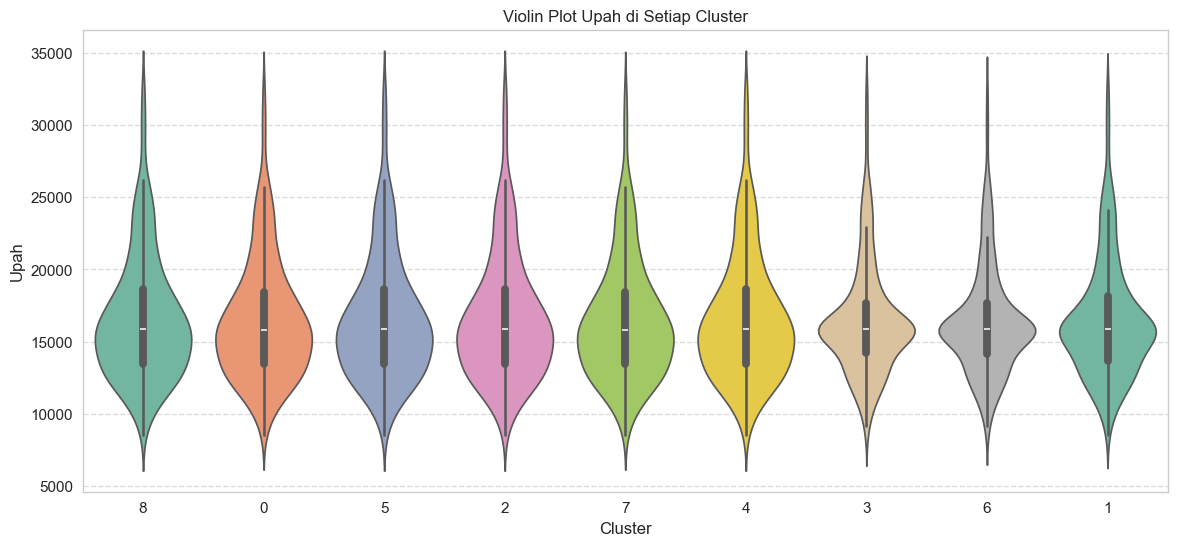

In [66]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='cluster', y='upah', data=df_result, palette='Set2')
plt.title("Violin Plot Upah di Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Upah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribusi Pengeluaran per Cluster

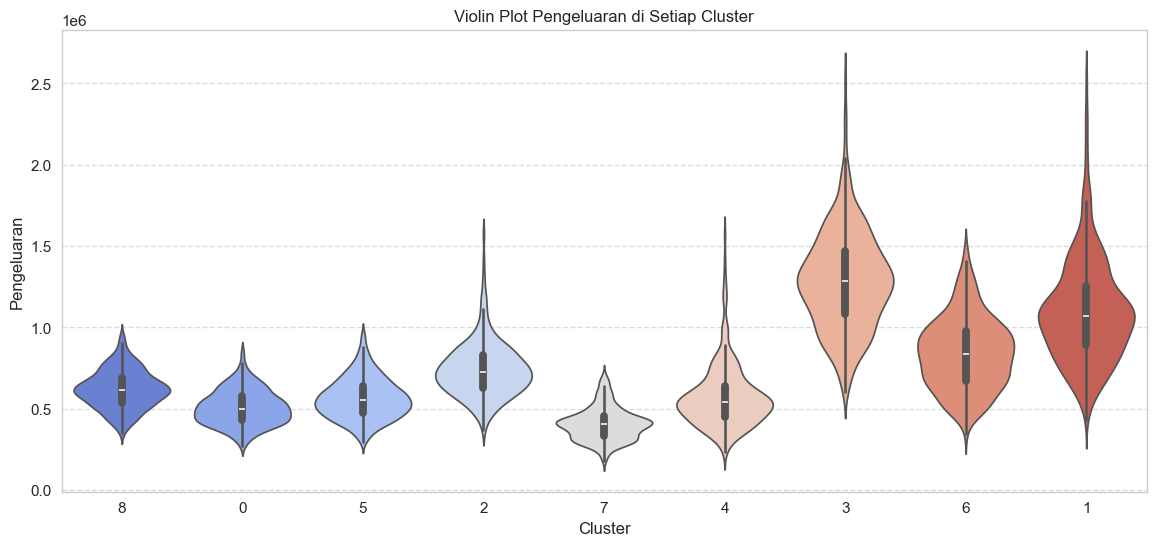

In [67]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='cluster', y='peng', data=df_result, palette='coolwarm')
plt.title("Violin Plot Pengeluaran di Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Pengeluaran")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analisis Hubungan Upah dan Pengeluaran per Cluster

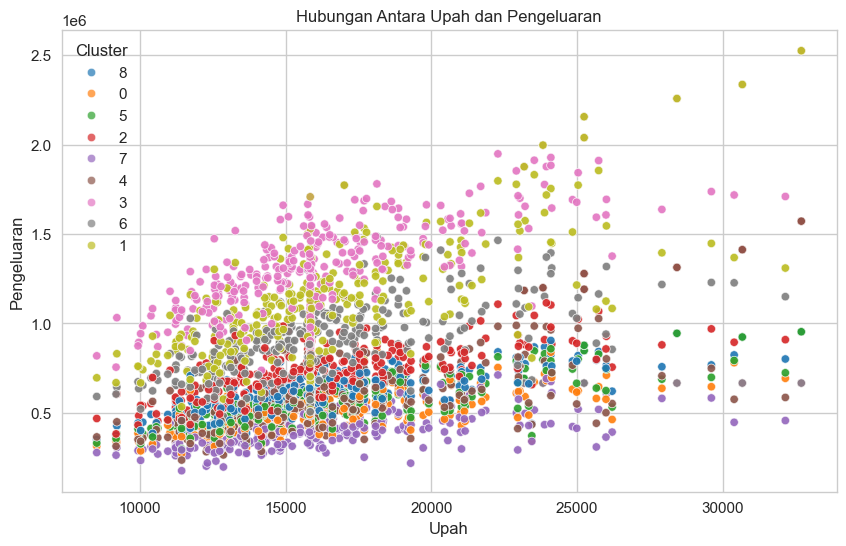

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='upah', y='peng', hue='cluster', data=df_result, palette='tab10', alpha=0.7)
plt.title("Hubungan Antara Upah dan Pengeluaran")
plt.xlabel("Upah")
plt.ylabel("Pengeluaran")
plt.legend(title="Cluster")
plt.show()

### Rata-rata Pengeluaran Berdasarkan Jenis Daerah

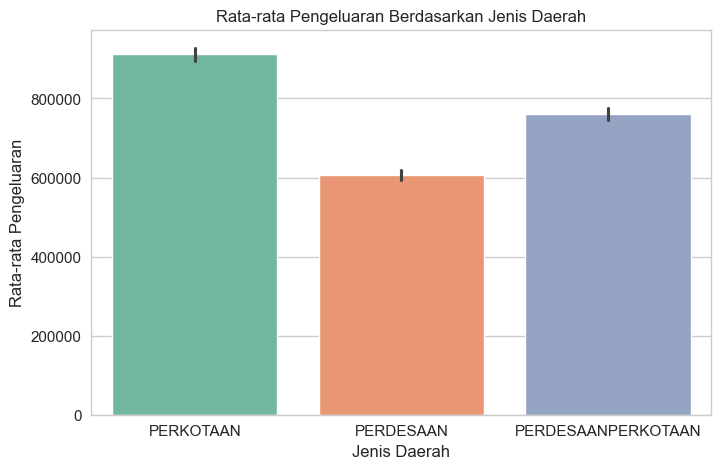

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(x='daerah', y='peng', data=df_result, estimator=lambda x: x.mean(), palette='Set2')
plt.title("Rata-rata Pengeluaran Berdasarkan Jenis Daerah")
plt.xlabel("Jenis Daerah")
plt.ylabel("Rata-rata Pengeluaran")
plt.show()

### Distribusi Cluster berdasarkan Jenis Daerah

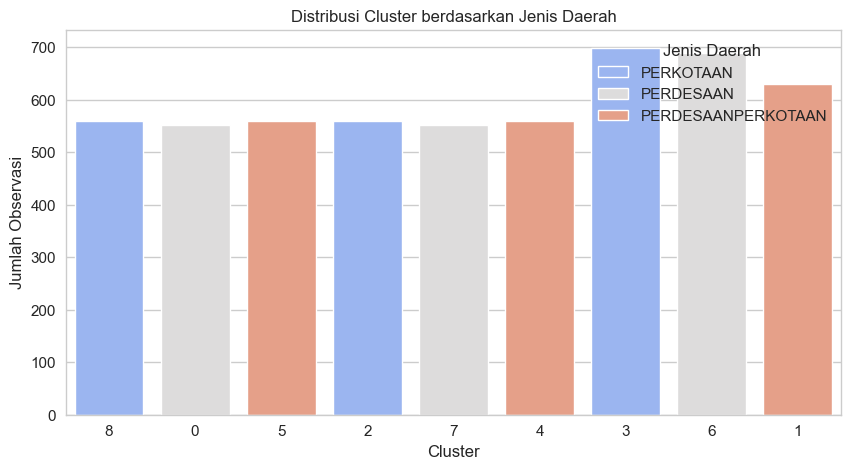

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='cluster', hue='daerah', data=df_result, palette='coolwarm')
plt.title("Distribusi Cluster berdasarkan Jenis Daerah")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Observasi")
plt.legend(title="Jenis Daerah")
plt.show()

### **Analisis Awal Dataset**
Dataset ini memiliki **5.361 entri** dengan **13 kolom**, yang mencakup informasi tentang:
- **Jenis pengeluaran** (Makanan, Non-Makanan, Total).
- **Jenis daerah** (Perdesaan, Perkotaan, Campuran).
- **Variabel ekonomi** seperti **upah**, **pengeluaran (peng)**, **UMP (upah minimum provinsi)**, dan **GK (kemungkinan besar Gross Konsumsi atau indikator ekonomi lainnya)**.

### **Analisis Karakteristik Cluster dari Model Terbaik**
Berdasarkan hasil clustering menggunakan **KMeans dengan 9 cluster**, berikut adalah analisis karakteristik masing-masing cluster:

---

## **Cluster 0:**
- **Karakteristik Utama:** Dominan di **perdesaan** dengan pengeluaran yang **rendah**.
- **Rata-rata Pengeluaran:** **508.892** (Rendah)
- **Rata-rata Upah per Jam:** **16.488** (Sedang)
- **Analisis:**  
  Cluster ini menggambarkan kelompok dengan daya beli rendah. Meskipun upah berada di tingkat menengah, pengeluaran mereka tetap kecil. Ini mungkin disebabkan oleh pola konsumsi yang hemat atau akses terbatas ke fasilitas ekonomi.

---

## **Cluster 1:**
- **Karakteristik Utama:** Dominan di **daerah campuran**, dengan pengeluaran **tinggi**.
- **Rata-rata Pengeluaran:** **1.098.513** (Tinggi)
- **Rata-rata Upah per Jam:** **16.534** (Sedang)
- **Analisis:**  
  Cluster ini menunjukkan kelompok ekonomi menengah ke atas di daerah campuran. Pola konsumsi yang tinggi dapat disebabkan oleh akses ke fasilitas perkotaan yang lebih mudah, tetapi masih memiliki pengaruh gaya hidup dari daerah perdesaan.

---

## **Cluster 2:**
- **Karakteristik Utama:** Mayoritas dari **perkotaaan**, dengan pengeluaran **sedang**.
- **Rata-rata Pengeluaran:** **739.950** (Sedang)
- **Rata-rata Upah per Jam:** **16.621** (Sedang)
- **Analisis:**  
  Cluster ini mencerminkan kelas menengah perkotaan yang memiliki pola konsumsi yang stabil. Pengeluaran mereka tidak setinggi cluster yang lebih konsumtif, tetapi tetap lebih tinggi dibandingkan dengan perdesaan.

---

## **Cluster 3:**
- **Karakteristik Utama:** Dominan di **perkotaaan**, dengan pengeluaran **sangat tinggi**.
- **Rata-rata Pengeluaran:** **1.286.430** (Sangat Tinggi)
- **Rata-rata Upah per Jam:** **16.467** (Sedang)
- **Analisis:**  
  Cluster ini memiliki pola konsumsi yang sangat besar, kemungkinan berasal dari kelompok ekonomi atas di perkotaan dengan daya beli tinggi. Faktor gaya hidup dan akses terhadap berbagai fasilitas konsumsi dapat menjadi alasan utama.

---

## **Cluster 4:**
- **Karakteristik Utama:** Mayoritas dari **daerah campuran**, dengan pengeluaran **rendah**.
- **Rata-rata Pengeluaran:** **574.982** (Rendah)
- **Rata-rata Upah per Jam:** **16.621** (Sedang)
- **Analisis:**  
  Cluster ini menunjukkan kelompok masyarakat di daerah campuran yang memiliki daya beli terbatas. Walaupun memiliki akses ke wilayah perkotaan, pengeluaran mereka masih cukup rendah, yang bisa disebabkan oleh gaya hidup lebih hemat atau keterbatasan ekonomi.

---

## **Cluster 5:**
- **Karakteristik Utama:** Mayoritas dari **daerah campuran**, dengan pengeluaran **rendah**.
- **Rata-rata Pengeluaran:** **565.265** (Rendah)
- **Rata-rata Upah per Jam:** **16.621** (Sedang)
- **Analisis:**  
  Cluster ini mirip dengan Cluster 4, dengan pola konsumsi yang masih cenderung rendah meskipun akses ke daerah perkotaan lebih dekat. Kemungkinan, faktor sosial ekonomi berpengaruh dalam pola konsumsi yang terbatas.

---

## **Cluster 6:**
- **Karakteristik Utama:** Mayoritas dari **perdesaan**, dengan pengeluaran **sedang**.
- **Rata-rata Pengeluaran:** **843.213** (Sedang)
- **Rata-rata Upah per Jam:** **16.360** (Sedang)
- **Analisis:**  
  Cluster ini terdiri dari kelompok yang lebih stabil secara ekonomi di perdesaan dengan daya beli lebih baik dibandingkan Cluster 0 dan 4. Bisa jadi mereka memiliki sumber pendapatan tambahan selain upah utama.

---

## **Cluster 7:**
- **Karakteristik Utama:** Mayoritas dari **perdesaan**, dengan pengeluaran **sangat rendah**.
- **Rata-rata Pengeluaran:** **407.471** (Sangat Rendah)
- **Rata-rata Upah per Jam:** **16.488** (Sedang)
- **Analisis:**  
  Cluster ini menggambarkan kelompok dengan keterbatasan daya beli yang lebih besar dibandingkan cluster lainnya. Pengeluaran mereka sangat kecil, kemungkinan besar karena akses ekonomi yang terbatas atau faktor sosial lainnya.

---

## **Cluster 8:**
- **Karakteristik Utama:** Mayoritas dari **perkotaaan**, dengan pengeluaran **rendah**.
- **Rata-rata Pengeluaran:** **621.331** (Rendah)
- **Rata-rata Upah per Jam:** **16.621** (Sedang)
- **Analisis:**  
  Cluster ini menarik karena meskipun berada di perkotaan, pengeluaran mereka tetap rendah. Hal ini dapat mencerminkan kelompok yang lebih hemat dalam gaya hidup atau berada dalam transisi ekonomi yang menuntut pengeluaran lebih terkontrol.

---

### **Kesimpulan & Insight dari Data Aktual:**
1. **Daerah Campuran Menunjukkan Pola Konsumsi yang Beragam**  
   - Beberapa cluster di daerah campuran memiliki pengeluaran tinggi (Cluster 1).  
   - Sebaliknya, ada juga daerah campuran dengan pengeluaran rendah (Cluster 4, 5).  
   - Ini menunjukkan bahwa di daerah campuran, tingkat kesejahteraan ekonomi sangat bervariasi.

2. **Perkotaan Tidak Selalu Konsumtif**  
   - Meskipun beberapa cluster perkotaan memiliki pengeluaran sangat tinggi (Cluster 3), ada juga yang pengeluarannya rendah (Cluster 8).  
   - Ini menunjukkan adanya kelompok masyarakat perkotaan yang lebih hemat atau menghadapi kendala ekonomi tertentu.

3. **Upah Tidak Berbanding Lurus dengan Pengeluaran**  
   - Upah di setiap cluster relatif mirip (rata-rata sekitar 16.000).  
   - Namun, pengeluaran sangat bervariasi (dari 407.000 hingga 1.286.000).  
   - Faktor lain seperti budaya konsumsi, harga barang, dan kebiasaan menabung turut memengaruhi pola pengeluaran.

4. **Daya Beli & Pola Konsumsi Berbeda-beda Berdasarkan Lokasi**  
   - Ada kelompok yang lebih konsumtif di daerah campuran dan perkotaan (Cluster 1, 3).  
   - Ada yang lebih hemat meskipun memiliki akses ke ekonomi perkotaan (Cluster 8).  
   - Pola pengeluaran di perdesaan juga sangat beragam, dari sangat rendah (Cluster 7) hingga menengah (Cluster 6).

5. **Implikasi untuk Kebijakan Ekonomi**  
   - **Perkotaan** memerlukan strategi keseimbangan ekonomi agar tidak terlalu konsumtif dan dapat meningkatkan kesejahteraan bagi kelompok berpengeluaran rendah.  
   - **Perdesaan** memerlukan kebijakan untuk meningkatkan daya beli masyarakat, baik dengan akses ekonomi yang lebih baik atau program bantuan.  
   - **Daerah campuran** membutuhkan strategi yang lebih fleksibel, karena memiliki variasi konsumsi dan daya beli yang lebih besar dibandingkan daerah lain.  

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [71]:
# Eksport hasil ke file CSV
df_result = df_clean.copy()  # Copy dari dataset yang tidak ada data duplikat tetapi belum dilakukan encoding
df_result['Cluster'] = final_labels  # Tambahkan kolom cluster

# Simpan ke CSV
output_file = 'data/hasil_clustering_final.csv'
df_result.to_csv(output_file, index=False)
print(f"\nHasil clustering telah berhasil diekspor ke file '{output_file}'")


Hasil clustering telah berhasil diekspor ke file 'data/hasil_clustering_final.csv'


In [72]:
# Eksport hasil ke file CSV
df_result = df_final.copy()  # Copy dari dataset yang tidak ada data duplikat tetapi belum dilakukan encoding
df_result['Cluster'] = final_labels  # Tambahkan kolom cluster

# Simpan ke CSV
output_file = 'data/train.csv'
df_result.to_csv(output_file, index=False)
print(f"\nHasil clustering telah berhasil diekspor ke file '{output_file}'")


Hasil clustering telah berhasil diekspor ke file 'data/train.csv'
